# “Predicting Coupon Acceptance On E-Commerce Platforms”

###  Problem Statement


• The goal of this project is to leverage machine learning techniques to analyze driving scenarios  
and user attributes collected from an e-commerce website or not.

• By accurately predicting whether users will accept coupons during their journey  s,
the aim is to optimize coupon distribution strategies and enhance user engagement with   the
platform’s offerings.

• The survey describes different driving scenarios including the user’s destination, current   time,
weather, passenger, coupon attributes, user attributes, and contextual attributes, an  d then
asks the user whether he/she will accept the coupon or not.

In [320]:
## libraries.
import numpy as np # numerical operations
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # visualization
import seaborn as sns # advanced visualization
import warnings as w # ignoring the unwanted warnings
from tabulate import tabulate as tb # tabular output
from scipy.stats import zscore # for outliers
from sklearn import set_config # setting diagram configuration
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer # handling null values
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder # featureenccoding
from imblearn.over_sampling import SMOTE # data imbalanced
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold, KFold, RandomizedSearchCV # data splitting.
from sklearn.preprocessing import StandardScaler # scaling
from sklearn.feature_selection import mutual_info_classif, RFE, SelectKBest #feature importance
# model & metrics
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier # ensemble models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier # tree based model
from sklearn.linear_model import LogisticRegression # baseline model
from sklearn.naive_bayes import GaussianNB # model
from sklearn.svm import SVC # model
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score, classification_report, ConfusionMatrixDisplay,confusion_matrix, roc_curve, auc # metrics
from xgboost import XGBClassifier # model
import pickle # for models exporting

In [318]:
from xgboost import XGBClassifier

In [312]:
!pip install xgboost

In [5]:
!pip install lightgbm 


In [7]:
## settings.

pd.set_option('display.max_columns', None)
set_config(display = 'diagram')
w.filterwarnings('ignore')
%matplotlib inline
sns.set()
sns.set_style(style = 'whitegrid')

In [9]:
pd.set_option('display.max_columns',None)

## Importing Dataset

In [12]:
##import and read the data in dataframe

df = pd.read_csv("C:/Users/noorh/Downloads/Ds_Data.csv")
df = df.copy(deep = True)

In [14]:
## bottom 5 rows.
df.head()

destination  passanger weather  temperature                 coupon  \
0  No Urgent Place      Alone   Sunny           55        Restaurant(<20)   
1  No Urgent Place  Friend(s)   Sunny           80           Coffee House   
2  No Urgent Place  Friend(s)   Sunny           80  Carry out & Take away   
3  No Urgent Place  Friend(s)   Sunny           80           Coffee House   
4  No Urgent Place  Friend(s)   Sunny           80           Coffee House   

  expiration  gender age      maritalStatus  has_children  \
0         1d  Female  21  Unmarried partner             1   
1         2h  Female  21  Unmarried partner             1   
2         2h  Female  21  Unmarried partner             1   
3         2h  Female  21  Unmarried partner             1   
4         1d  Female  21  Unmarried partner             1   

                  education  occupation           income  car    Bar  \
0  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   
1  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   
2  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   
3  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   
4  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   

  CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0       never       NaN                  4~8              1~3   
1       never       NaN                  4~8              1~3   
2       never       NaN                  4~8              1~3   
3       never       NaN                  4~8              1~3   
4       never       NaN                  4~8              1~3   

   toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  \
0                 1                  0                  0               0   
1                 1                  0                  0               0   
2                 1                  1                  0               0   
3                 1                  1                  0               0   
4                 1                  1                  0               0   

   direction_opp  Accept(Y/N?)  
0              1             1  
1              1             0  
2              1             1  
3              1             0  
4              1             0

In [16]:
## bottom 5 rows.
df.tail()


destination passanger weather  temperature                 coupon  \
12679        Home   Partner   Rainy           55  Carry out & Take away   
12680        Work     Alone   Rainy           55  Carry out & Take away   
12681        Work     Alone   Snowy           30           Coffee House   
12682        Work     Alone   Snowy           30                    Bar   
12683        Work     Alone   Sunny           80      Restaurant(20-50)   

      expiration gender age maritalStatus  has_children         education  \
12679         1d   Male  26        Single             0  Bachelors degree   
12680         1d   Male  26        Single             0  Bachelors degree   
12681         1d   Male  26        Single             0  Bachelors degree   
12682         1d   Male  26        Single             0  Bachelors degree   
12683         2h   Male  26        Single             0  Bachelors degree   

            occupation           income  car    Bar CoffeeHouse CarryAway  \
12679  Sales & Related  $75000 - $87499  NaN  never       never       1~3   
12680  Sales & Related  $75000 - $87499  NaN  never       never       1~3   
12681  Sales & Related  $75000 - $87499  NaN  never       never       1~3   
12682  Sales & Related  $75000 - $87499  NaN  never       never       1~3   
12683  Sales & Related  $75000 - $87499  NaN  never       never       1~3   

      RestaurantLessThan20 Restaurant20To50  toCoupon_GEQ5min  \
12679                  4~8              1~3                 1   
12680                  4~8              1~3                 1   
12681                  4~8              1~3                 1   
12682                  4~8              1~3                 1   
12683                  4~8              1~3                 1   

       toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  direction_opp  \
12679                  0                  0               1              0   
12680                  0                  0               0              1   
12681                  0                  0               1              0   
12682                  1                  1               0              1   
12683                  0                  0               1              0   

       Accept(Y/N?)  
12679             1  
12680             1  
12681             0  
12682             0  
12683             0

In [18]:
## shape.
df.shape

(12684, 25)

## Understanding The Data

In [21]:
df.head(10)

destination  passanger weather  temperature                 coupon  \
0  No Urgent Place      Alone   Sunny           55        Restaurant(<20)   
1  No Urgent Place  Friend(s)   Sunny           80           Coffee House   
2  No Urgent Place  Friend(s)   Sunny           80  Carry out & Take away   
3  No Urgent Place  Friend(s)   Sunny           80           Coffee House   
4  No Urgent Place  Friend(s)   Sunny           80           Coffee House   
5  No Urgent Place  Friend(s)   Sunny           80        Restaurant(<20)   
6  No Urgent Place  Friend(s)   Sunny           55  Carry out & Take away   
7  No Urgent Place     Kid(s)   Sunny           80        Restaurant(<20)   
8  No Urgent Place     Kid(s)   Sunny           80  Carry out & Take away   
9  No Urgent Place     Kid(s)   Sunny           80                    Bar   

  expiration  gender age      maritalStatus  has_children  \
0         1d  Female  21  Unmarried partner             1   
1         2h  Female  21  Unmarried partner             1   
2         2h  Female  21  Unmarried partner             1   
3         2h  Female  21  Unmarried partner             1   
4         1d  Female  21  Unmarried partner             1   
5         2h  Female  21  Unmarried partner             1   
6         1d  Female  21  Unmarried partner             1   
7         2h  Female  21  Unmarried partner             1   
8         2h  Female  21  Unmarried partner             1   
9         1d  Female  21  Unmarried partner             1   

                  education  occupation           income  car    Bar  \
0  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   
1  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   
2  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   
3  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   
4  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   
5  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   
6  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   
7  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   
8  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   
9  Some college - no degree  Unemployed  $37500 - $49999  NaN  never   

  CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0       never       NaN                  4~8              1~3   
1       never       NaN                  4~8              1~3   
2       never       NaN                  4~8              1~3   
3       never       NaN                  4~8              1~3   
4       never       NaN                  4~8              1~3   
5       never       NaN                  4~8              1~3   
6       never       NaN                  4~8              1~3   
7       never       NaN                  4~8              1~3   
8       never       NaN                  4~8              1~3   
9       never       NaN                  4~8              1~3   

   toCoupon_GEQ5min  toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  \
0                 1                  0                  0               0   
1                 1                  0                  0               0   
2                 1                  1                  0               0   
3                 1                  1                  0               0   
4                 1                  1                  0               0   
5                 1                  1                  0               0   
6                 1                  1                  0               0   
7                 1                  1                  0               0   
8                 1                  1                  0               0   
9                 1                  1                  0               0   

   direction_opp  Accept(Y/N?)  
0              1             1  
1              1             0  
2              1             1 

In [23]:
df.info

<bound method DataFrame.info of            destination  passanger weather  temperature                 coupon  \
0      No Urgent Place      Alone   Sunny           55        Restaurant(<20)   
1      No Urgent Place  Friend(s)   Sunny           80           Coffee House   
2      No Urgent Place  Friend(s)   Sunny           80  Carry out & Take away   
3      No Urgent Place  Friend(s)   Sunny           80           Coffee House   
4      No Urgent Place  Friend(s)   Sunny           80           Coffee House   
...                ...        ...     ...          ...                    ...   
12679             Home    Partner   Rainy           55  Carry out & Take away   
12680             Work      Alone   Rainy           55  Carry out & Take away   
12681             Work      Alone   Snowy           30           Coffee House   
12682             Work      Alone   Snowy           30                    Bar   
12683             Work      Alone   Sunny           80      Restaurant(20-50)

In [25]:
## statistical summary of numerical data.
df.describe().round(3)

temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count    12684.000     12684.000           12684.0          12684.000   
mean        63.302         0.414               1.0              0.561   
std         19.154         0.493               0.0              0.496   
min         30.000         0.000               1.0              0.000   
25%         55.000         0.000               1.0              0.000   
50%         80.000         0.000               1.0              1.000   
75%         80.000         1.000               1.0              1.000   
max         80.000         1.000               1.0              1.000   

       toCoupon_GEQ25min  direction_same  direction_opp  Accept(Y/N?)  
count          12684.000       12684.000      12684.000     12684.000  
mean               0.119           0.215          0.785         0.568  
std                0.324           0.411          0.411         0.495  
min                0.000           0.000          0.000         0.000  
25%                0.000           0.000          1.000         0.000  
50%                0.000           0.000          1.000         1.000  
75%                0.000           0.000          1.000         1.000  
max                1.000           1.000          1.000         1.000

In [27]:
## summary of categorical data.
df.describe(include = 'O').round(3)

destination passanger weather        coupon expiration  gender  \
count             12684     12684   12684         12684      12684   12684   
unique                3         4       3             5          2       2   
top     No Urgent Place     Alone   Sunny  Coffee House         1d  Female   
freq               6283      7305   10069          3996       7091    6511   

          age    maritalStatus                 education  occupation  \
count   12684            12684                     12684       12684   
unique      8                5                         6          25   
top        21  Married partner  Some college - no degree  Unemployed   
freq     2653             5100                      4351        1870   

                 income                     car    Bar CoffeeHouse CarryAway  \
count             12684                     108  12577       12467     12533   
unique                9                       5      5           5         5   
top     $25000 - $37499  Scooter and motorcycle  never       less1       1~3   
freq               2013                      22   5197        3385      4672   

       RestaurantLessThan20 Restaurant20To50  
count                 12554            12495  
unique                    5                5  
top                     1~3            less1  
freq                   5376             6077

In [29]:
## columns.
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Accept(Y/N?)'],
      dtype='object')

In [31]:
## get distribution of target variable.
print(df['Accept(Y/N?)'].value_counts(normalize = True))
print(df['Accept(Y/N?)'].unique())

Accept(Y/N?)
1    0.568433
0    0.431567
Name: proportion, dtype: float64
[1 0]


# Observation

##### Data has (12684 rows, 25 columns).
##### Target Variable shows 57.8%(7210) - 43.2%(5474) Distribution, which can indicating slightly data imblanced.
##### There are 8 numerical features & 17 categorical features.
##### Also some of the columns like (car, Bar, CoffeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50) are containing missing values, further          need to be impute or drop.
##### As per the observation most of the features consisting inconsistancy which further need to be correct in preprocessing.
##### According to Statistical summary there are not extreme outliers in the dataset, as most of the features having binary values strictly between (0, 1) .
##### The Temperature variable ranges between (30 to 80), with mean of 63.302%, median of
##### **__80%** & standard deviation of 19.154% suggesting potential outliers.
##### Based on this observation we do further process.


## Data Preprocessing/Cleaning/Analysis

In [35]:
## column names.

mapped = {
    'maritalStatus': 'Marital_Status',
    'has_children': 'Has_Children',
    'CoffeeHouse': 'Coffee_House',
    'CarryAway': 'Carry_Away',
    'RestaurantLessThan20': 'Restaurant_Less_Than_20',
    'Restaurant20To50': 'Restaurant_20_To_50',
    'toCoupon_GEQ5min': 'To_Coupon_GEQ_5_min',
    'toCoupon_GEQ15min': 'To_Coupon_GEQ_15_min',
    'toCoupon_GEQ25min': 'To_Coupon_GEQ_25_min',
    'Accept(Y/N?)': 'Accept_Y_N'
}

df = df.rename(columns = mapped)
df.columns = df.columns.str.title()

## Duplicates

In [38]:
## checking missing values.
missing_values = df.isna().sum().to_frame(name = 'Missing_Values')\
.sort_values(by = 'Missing_Values', ascending = False)
missing_values["Missing_Values_%"] = (missing_values["Missing_Values"] /len(df)) * 100
missing_values = missing_values[missing_values["Missing_Values"] > 0]
print(tb(missing_values, headers = ['Features', 'Missing_Values','Missing_Values_%'], tablefmt = 'grid'))

+-------------------------+------------------+--------------------+
| Features                |   Missing_Values |   Missing_Values_% |
+=========================+==================+====================+
| Car                     |            12576 |          99.1485   |
+-------------------------+------------------+--------------------+
| Coffee_House            |              217 |           1.71082  |
+-------------------------+------------------+--------------------+
| Restaurant_20_To_50     |              189 |           1.49007  |
+-------------------------+------------------+--------------------+
| Carry_Away              |              151 |           1.19048  |
+-------------------------+------------------+--------------------+
| Restaurant_Less_Than_20 |              130 |           1.02491  |
+-------------------------+------------------+--------------------+
| Bar                     |              107 |           0.843582 |
+-------------------------+------------------+--

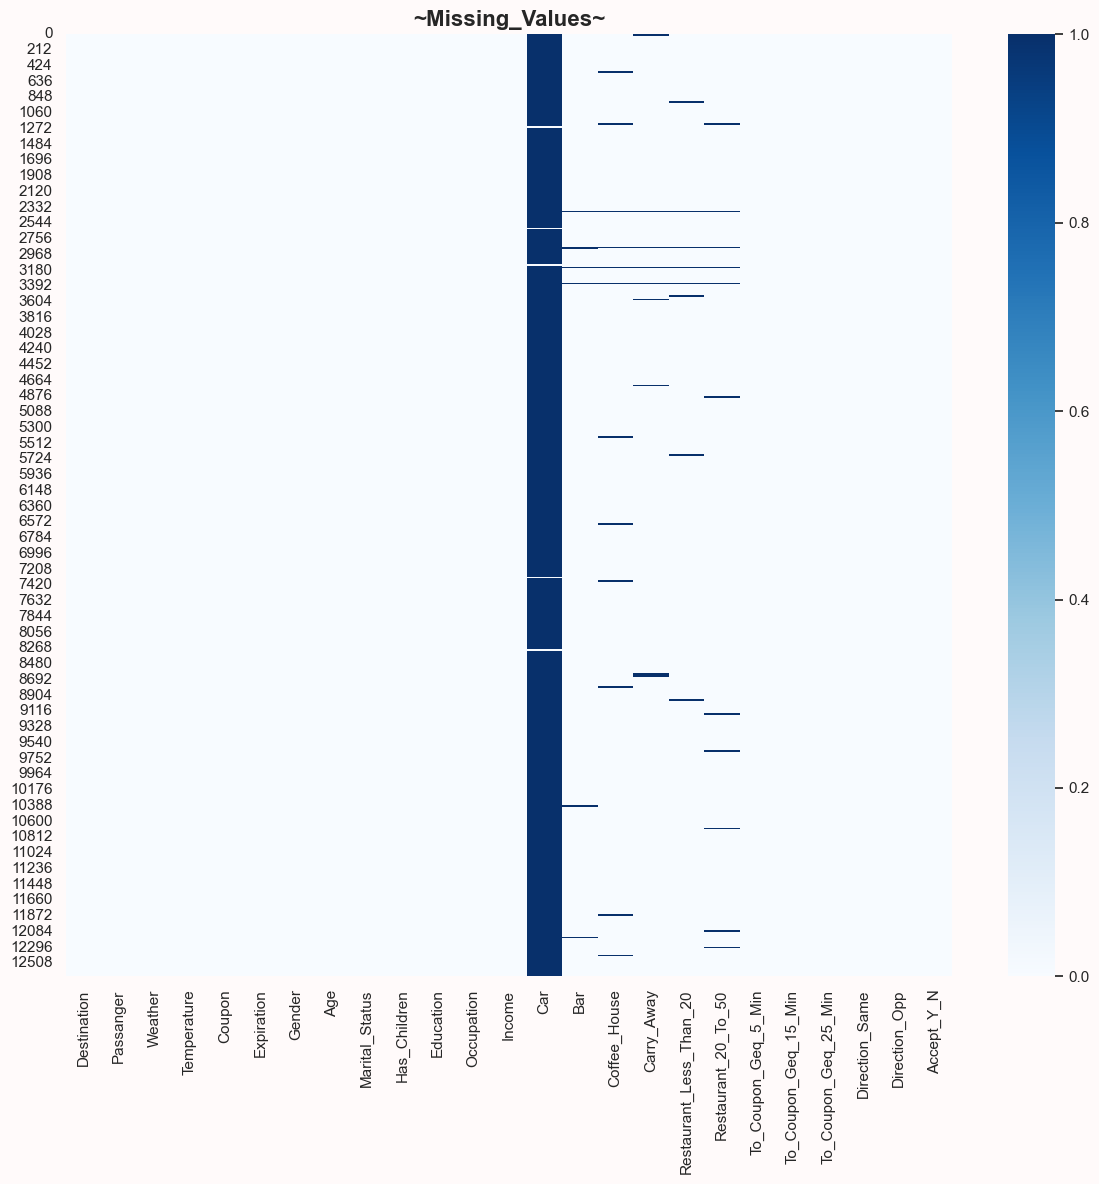

In [40]:
## plot missing values.
plt.figure(figsize = (12, 12),
facecolor = 'snow')
sns.heatmap(df.isna(),\
cmap = 'Blues')
plt.title('~Missing_Values~',\
fontweight = 'bold',\
fontsize = 16)
plt.tight_layout()
plt.show()

In [44]:
## handling duplicates.

print(f'Before Dropping Duplicates: {df.duplicated().sum()}, Shape: {df.shape}')
df.drop_duplicates(ignore_index = True, inplace = True)
print(f'After Dropping Duplicates: {df.duplicated().sum()}, Shape: {df.shape}')

Before Dropping Duplicates: 291, Shape: (12684, 25)
After Dropping Duplicates: 0, Shape: (12393, 25)


In [46]:
#null values
df.isna().sum() / df.shape[0]

Destination                0.000000
Passanger                  0.000000
Weather                    0.000000
Temperature                0.000000
Coupon                     0.000000
Expiration                 0.000000
Gender                     0.000000
Age                        0.000000
Marital_Status             0.000000
Has_Children               0.000000
Education                  0.000000
Occupation                 0.000000
Income                     0.000000
Car                        0.991447
Bar                        0.008553
Coffee_House               0.017349
Carry_Away                 0.011942
Restaurant_Less_Than_20    0.010328
Restaurant_20_To_50        0.015170
To_Coupon_Geq_5_Min        0.000000
To_Coupon_Geq_15_Min       0.000000
To_Coupon_Geq_25_Min       0.000000
Direction_Same             0.000000
Direction_Opp              0.000000
Accept_Y_N                 0.000000
dtype: float64

In [48]:
## impute/drop the missing values

df = df.drop('Car', axis = 1)

impute = SimpleImputer(strategy = 'most_frequent')
df[:] = impute.fit_transform(df)

if df.isna().sum().sum() > 0:
    print('There are still missing values!')
else:
    print('No missing values left. Imputation successful!')

No missing values left. Imputation successful!


## Columns Manipulation

In [51]:
## destination
df['Destination'] = df['Destination'].replace('No Urgent Place','No_Urgent_Place')

In [53]:
## passanger.
df['Passanger'] = df['Passanger'].replace({'Friend(s)': 'Friends', 'Kid(s)':'Kids'})

In [55]:
## marital status.
df['Marital_Status'] = df['Marital_Status'].replace({'Unmarried partner':'Unmarried', 'Married partner': 'Married'})

In [57]:
#education

df['Education'] = df['Education'].replace({'some college - no degree': 'No_Degree', 'Bachelors degree': 'Bachelor_degree',\
                                          'Associates degree': 'Associates_degree', 'High school graduate': 'High_school_graduate',\
                                           'Graduate degree (Masters or Doctorate)': 'Graduate_degree(Ms_or_Doc)',\
                                           'Some High School': 'High_School'})

In [59]:
## temperature.
bins = [0, 40, 70, 100]
labels = ['Cold', 'Moderate', 'Hot']
df['Temperature_Bin'] = pd.cut(df['Temperature'], bins = bins, labels = labels)
df['Temperature_Bin'].unique()

['Moderate', 'Hot', 'Cold']
Categories (3, object): ['Cold' < 'Moderate' < 'Hot']

In [61]:
df.columns

Index(['Destination', 'Passanger', 'Weather', 'Temperature', 'Coupon',
       'Expiration', 'Gender', 'Age', 'Marital_Status', 'Has_Children',
       'Education', 'Occupation', 'Income', 'Bar', 'Coffee_House',
       'Carry_Away', 'Restaurant_Less_Than_20', 'Restaurant_20_To_50',
       'To_Coupon_Geq_5_Min', 'To_Coupon_Geq_15_Min', 'To_Coupon_Geq_25_Min',
       'Direction_Same', 'Direction_Opp', 'Accept_Y_N', 'Temperature_Bin'],
      dtype='object')

In [63]:
## income.

def midpoint(income):
    if 'Less than' in income:
        return 12500
    if 'or More' in income:
        return 100000
    nums = list(map(int, income.replace('$', '').replace(',', '').split('-')))
    return np.mean(nums)

df['Income_Numeric'] = df['Income'].apply(midpoint)
df['Income_Bin'] = pd.qcut(df['Income_Numeric'], q = 4, labels = ['Low_Income', 'Mid_Income', 'High_Income', 'Very_High_Income'])
df['Income_Bin'].unique()

['Mid_Income', 'High_Income', 'Low_Income', 'Very_High_Income']
Categories (4, object): ['Low_Income' < 'Mid_Income' < 'High_Income' < 'Very_High_Income']

In [65]:
## Replacing.
mapp = {
    'never': 'Never',
    'less1': '0-1',
    '1~3': '1-3',
    '4~8': '4-8 ',
    'gt8': '8+'
}
cols = ['Bar', 'Coffee_House', 'Carry_Away', 'Restaurant_Less_Than_20','Restaurant_20_To_50']
for i in cols:
    df[i] = df[i].map(mapp)    


In [67]:
## expiration.
df['Expiration_Hours'] = df['Expiration'].map({'1d': 24, '2h': 2})
df['Expiration_Hours'].unique()

array([24,  2], dtype=int64)

In [69]:
## age.

mapp = {
    'below21': '<21',
    '21': '21-30',
    '26': '21-30',
    '31': '31-40',
    '36': '31-40',
    '41': '41-50',
    '46': '41-50',
    '50plus': '50+'
}

df['Age_Group'] = df['Age'].map(mapp)
df['Age_Group'].unique()

array(['21-30', '41-50', '31-40', '50+', '<21'], dtype=object)

4.0.3 Outliers

In [72]:
## checking outliers using zscore method.
df_zscore = df[df.select_dtypes(include = np.number).columns].apply(zscore)
zscore_outliers = df[(df_zscore.abs() > 3).any(axis = 1)]\
.reset_index()\
.drop('index', axis = 1)
if zscore_outliers.shape[0] > 0:
    print(f'Number of outliers: {zscore_outliers[0]}')
else:
    print('No outliers detected based on Z-score threshold of 3.')

No outliers detected based on Z-score threshold of 3.


In [74]:
## checking outliers using iqr method.
num_col = df.select_dtypes(include = np.number).columns

continuous_col = [i for i in num_col if df[i].nunique() > 2]

q1 = df[continuous_col].quantile(0.25)
q3 = df[continuous_col].quantile(0.75)
iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

((df[continuous_col] > upper_bound) | (df[continuous_col] < lower_bound)).sum()

Temperature       0
Income_Numeric    0
dtype: int64

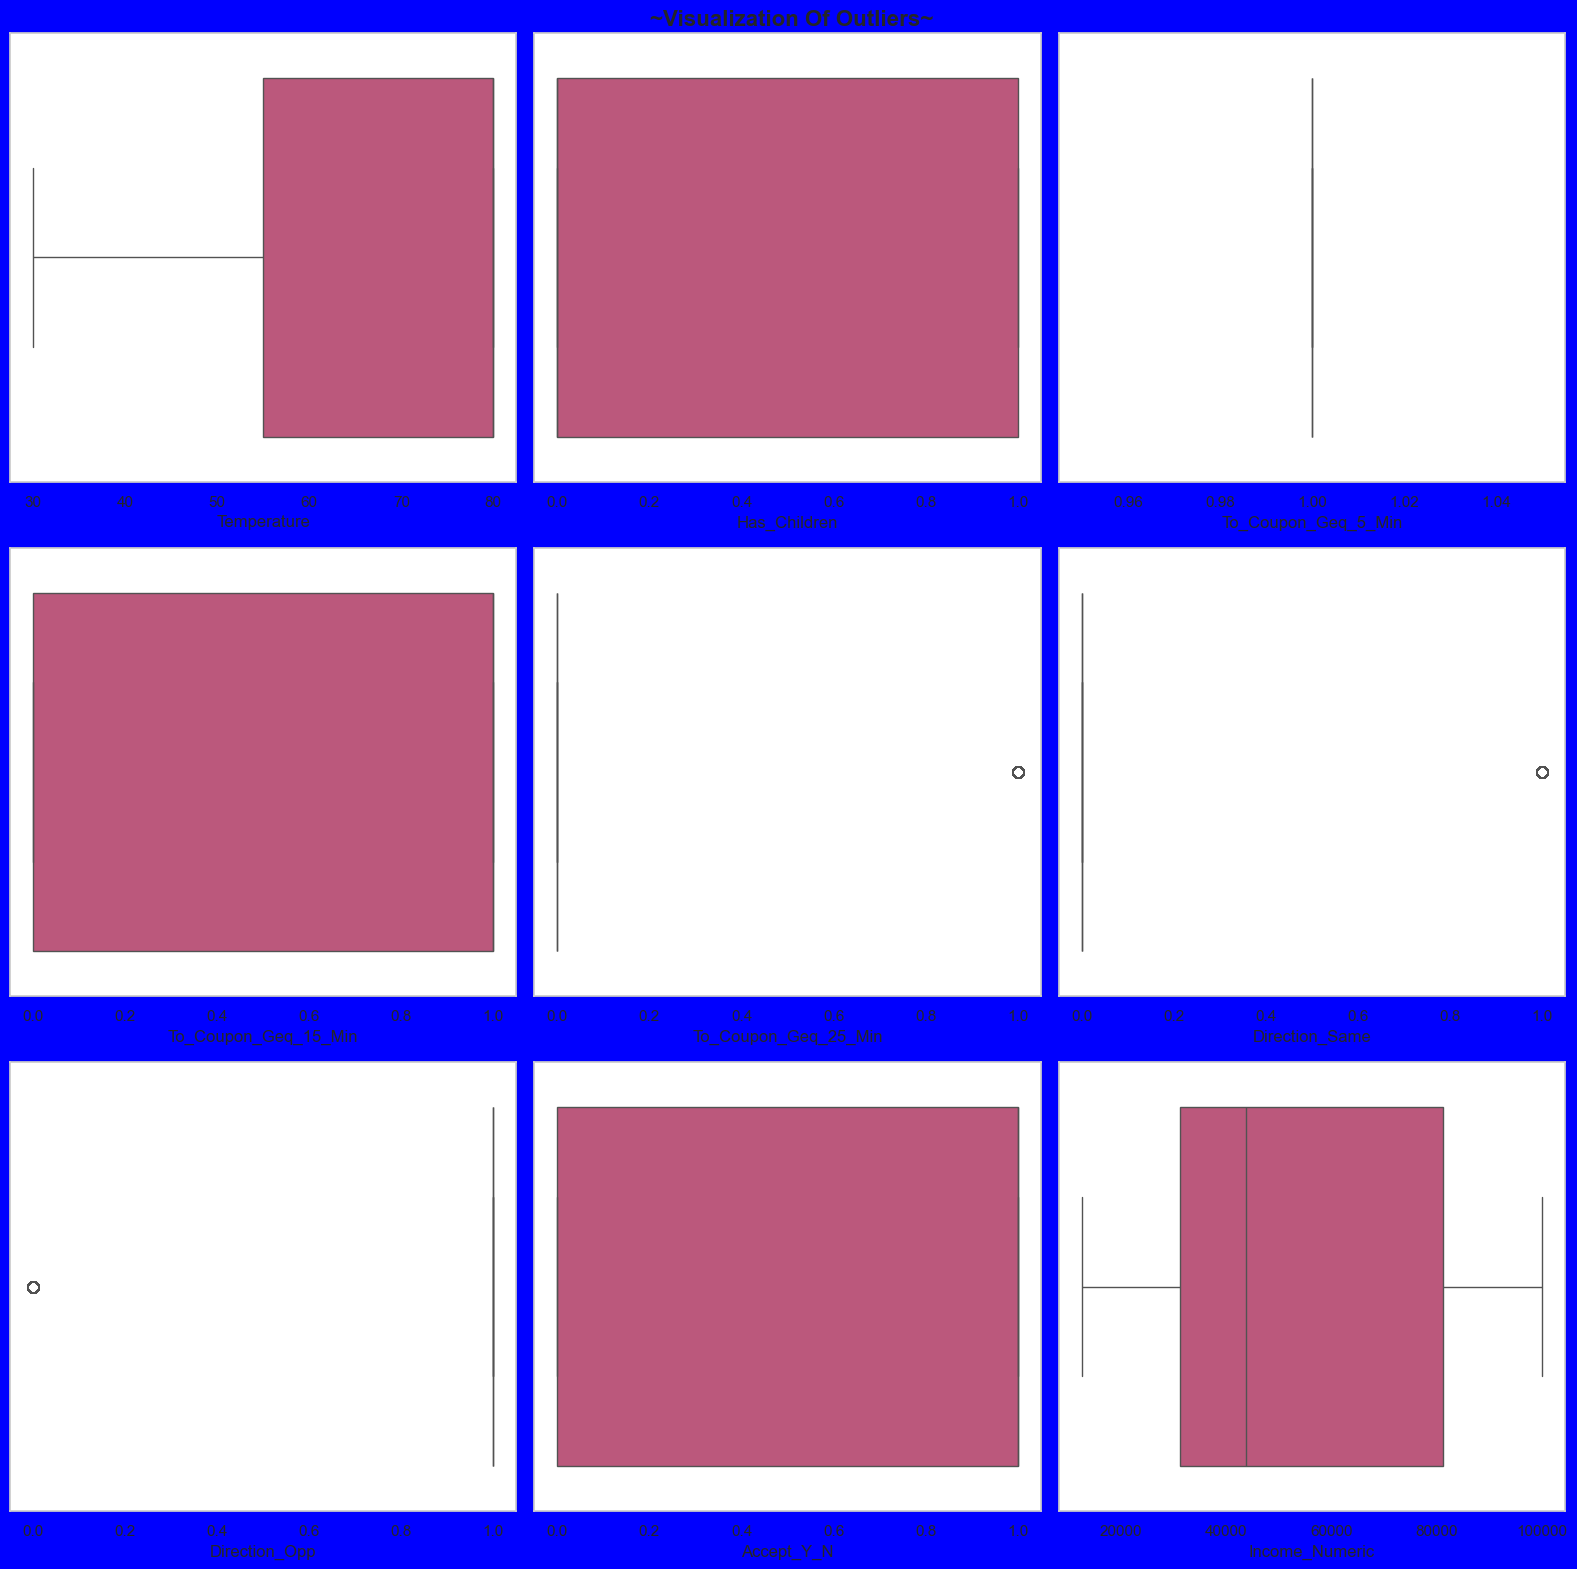

In [76]:
## plotting outliers.

fig, axes = plt.subplots(3, 3, figsize = (16, 16),facecolor = 'blue')

axes = axes.flatten()

for ax, i in zip(axes, num_col):
    ax = sns.boxplot(data = df,\
                x = i,\
                ax = ax,\
                palette = 'plasma',\
                whis = 1.5,\
                fliersize = 8,\
                showfliers = True
               )
    ax.grid(False)
    
for j in range(len(num_col), len(axes)):
    axes[j].axis('off')
    
plt.suptitle(f'~Visualization Of Outliers~',\
          fontweight = 'bold',\
          fontsize = 16)
plt.tight_layout()
plt.show()

# Observation

### Upto now, we remove the duplicates values from the dataset.

### We impute the null values using SimpleImputer technique, as we see only categorical

### columns has null values so we used most_frequent(mode) argument.

### Dropping the Car column it has contains more than 99% missing values.

### Checking the outliers & plot them using (zscore, iqr, boxplot), as we see no ou lier detect.

# Exploratory Data Analysis


In [83]:
df.columns

Index(['Destination', 'Passanger', 'Weather', 'Temperature', 'Coupon',
       'Expiration', 'Gender', 'Age', 'Marital_Status', 'Has_Children',
       'Education', 'Occupation', 'Income', 'Bar', 'Coffee_House',
       'Carry_Away', 'Restaurant_Less_Than_20', 'Restaurant_20_To_50',
       'To_Coupon_Geq_5_Min', 'To_Coupon_Geq_15_Min', 'To_Coupon_Geq_25_Min',
       'Direction_Same', 'Direction_Opp', 'Accept_Y_N', 'Temperature_Bin',
       'Income_Numeric', 'Income_Bin', 'Expiration_Hours', 'Age_Group'],
      dtype='object')

In [85]:
## drop old columns & separeting.
df.drop(['Income', 'Expiration', 'Age', 'Temperature', 'Income_Numeric'],axis = 1, inplace = True)

numerical_cols = df.select_dtypes(include = np.number).drop('Accept_Y_N',axis = 1)
categorical_cols = df.select_dtypes(include = ['O', 'category'])
target_col = df[['Accept_Y_N']]

print('Numerical Columns: ', numerical_cols.columns)
print('Categorical Columns: ', categorical_cols.columns)
print('Target Variable: ', target_col.columns)

Numerical Columns:  Index(['Has_Children', 'To_Coupon_Geq_5_Min', 'To_Coupon_Geq_15_Min',
       'To_Coupon_Geq_25_Min', 'Direction_Same', 'Direction_Opp',
       'Expiration_Hours'],
      dtype='object')
Categorical Columns:  Index(['Destination', 'Passanger', 'Weather', 'Coupon', 'Gender',
       'Marital_Status', 'Education', 'Occupation', 'Bar', 'Coffee_House',
       'Carry_Away', 'Restaurant_Less_Than_20', 'Restaurant_20_To_50',
       'Temperature_Bin', 'Income_Bin', 'Age_Group'],
      dtype='object')
Target Variable:  Index(['Accept_Y_N'], dtype='object')


# Univariate Analysis

### Numerical Columns                           

In [89]:
df.columns

Index(['Destination', 'Passanger', 'Weather', 'Coupon', 'Gender',
       'Marital_Status', 'Has_Children', 'Education', 'Occupation', 'Bar',
       'Coffee_House', 'Carry_Away', 'Restaurant_Less_Than_20',
       'Restaurant_20_To_50', 'To_Coupon_Geq_5_Min', 'To_Coupon_Geq_15_Min',
       'To_Coupon_Geq_25_Min', 'Direction_Same', 'Direction_Opp', 'Accept_Y_N',
       'Temperature_Bin', 'Income_Bin', 'Expiration_Hours', 'Age_Group'],
      dtype='object')

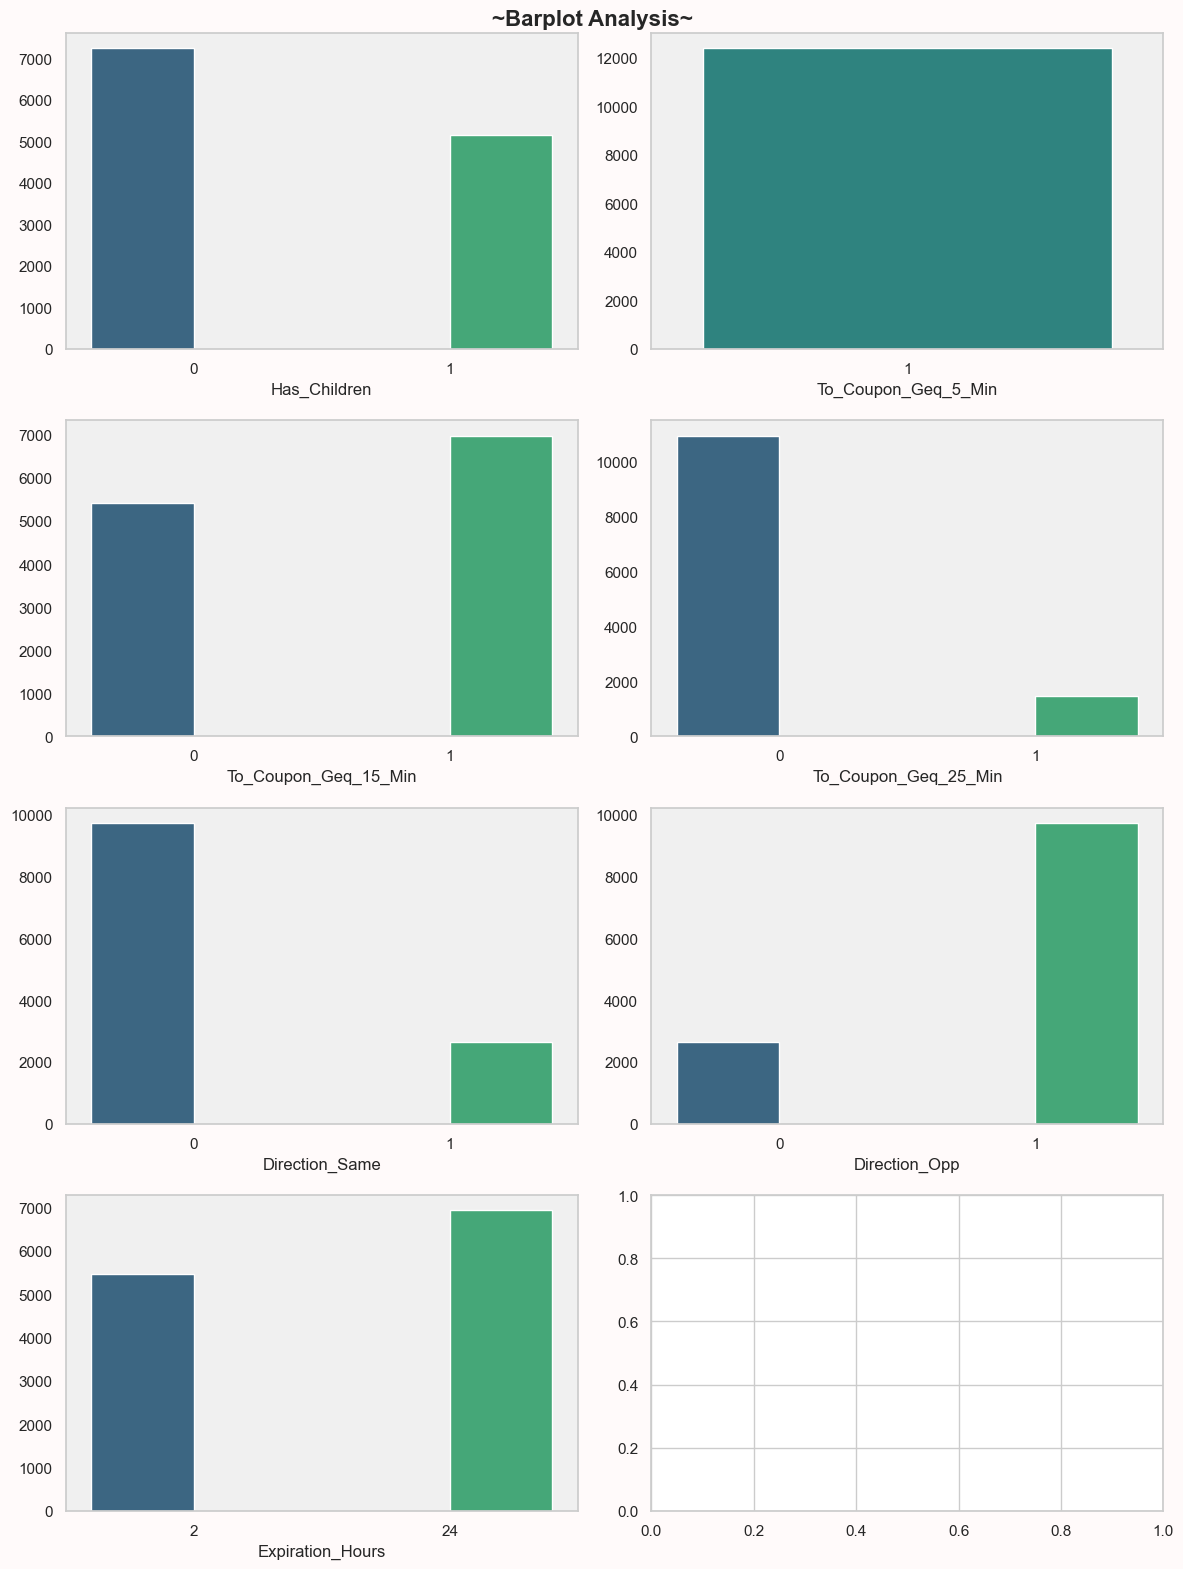

In [91]:
## bar plot.

fig, axes = plt.subplots(4, 2, figsize = (12, 16), facecolor = 'snow')
axes = axes.flatten()

for ax, i in zip(axes, numerical_cols):
    sns.barplot(x = df[i].value_counts().index,\
                y = df[i].value_counts().values,\
                palette = 'viridis',\
                dodge = True,\
                ax = ax
                )
    ax.grid(False)
    ax.set_facecolor('#f0f0f0')

plt.suptitle('~Barplot Analysis~',\
             fontweight = 'bold',\
             fontsize = 16)
plt.tight_layout()
plt.show()

#### Has_Children (7,243 without children, 5,150 with children) → Indicates whether
having children influences coupon engagement, with slightl more  customers without childre 
in the datat.ssonable time frame.

#### To_Coupon_Geq_5_Min (12,393 eligible) → All customers are within 5 minutes of the coupon location, meaning short travel time is not a barrier.


#### To_Coupon_Geq_15_Min (6,985 eligible, 5,408 not) → Almost half the customers are unwilling to travel beyond 15 minutes, suggesting coupon effectiveness decreases with distance.


#### To_Coupon_Geq_25_Min (10,930 not eligible, 1,463 eligible) → Very few customers (1,463) are willing to travel more than 25 minutes, reinforcing that coupon redemption likelihood drops significantly with increased travel time.


#### Direction_Same (9,744 not in the same direction, 2,649 in the same direction)


#### Most customers are not heading in the same direction as the coupon location, potentially reducing redemption rates.


#### Direction_Opp (9,744 opposite, 2,649 not opposite) → The same numbers indicate that a large portion of customers must deviate from their intended route to use the coupon, possibly impacting redemption decisions.



#### Expiration_Hours (6,938 expire in 24 hours, 5,455 expire in 2 hours) → Coupons with a longer expiration (24 hours) are more common, but a significant portion expires in just 2 hours, indicating urgency-driven offers that may impact redemption behavior.



#### Key Insight: Coupon redemption is highly influenced by travel time and direction —more people redeem coupons when they require minimal deviation from their route and expire within a reasonable time frame. 

## Categorical Columns              

In [95]:
df.columns

Index(['Destination', 'Passanger', 'Weather', 'Coupon', 'Gender',
       'Marital_Status', 'Has_Children', 'Education', 'Occupation', 'Bar',
       'Coffee_House', 'Carry_Away', 'Restaurant_Less_Than_20',
       'Restaurant_20_To_50', 'To_Coupon_Geq_5_Min', 'To_Coupon_Geq_15_Min',
       'To_Coupon_Geq_25_Min', 'Direction_Same', 'Direction_Opp', 'Accept_Y_N',
       'Temperature_Bin', 'Income_Bin', 'Expiration_Hours', 'Age_Group'],
      dtype='object')

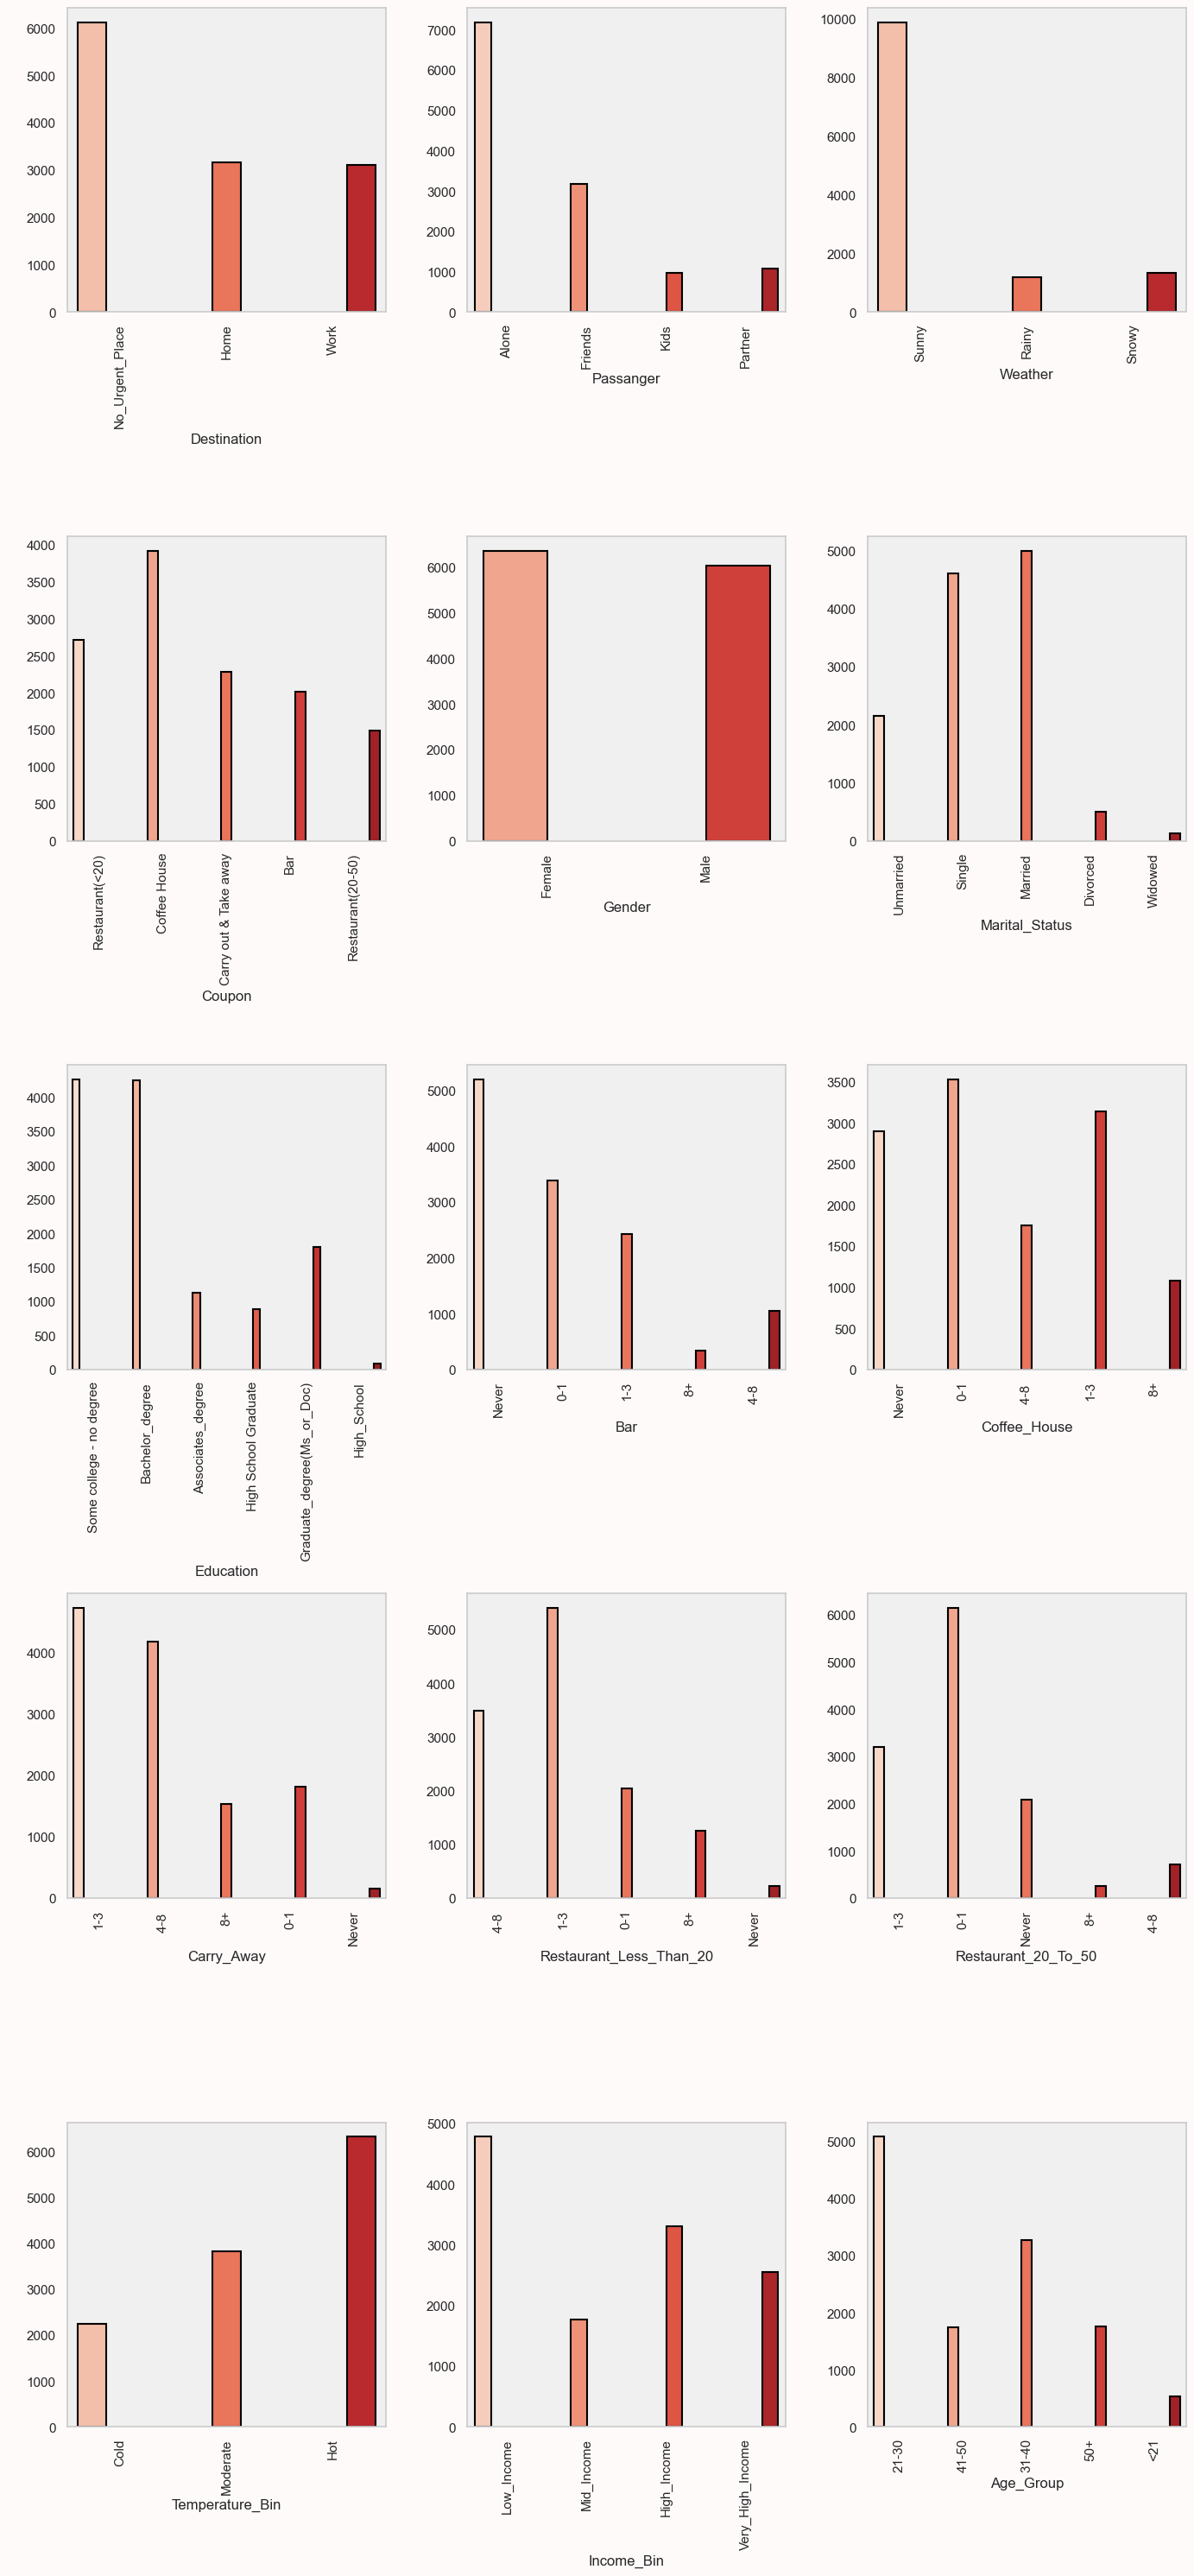

In [97]:
## count plot.

temp = categorical_cols.drop('Occupation', axis = 1)

fig, axes = plt.subplots(5, 3, figsize = (14, 30), facecolor = 'snow')

axes = axes.flatten()

for ax, i in zip(axes, temp):
    sns.countplot(data = df,\
                  x = i,\
                  palette = 'Reds',\
                  dodge = True,\
                  edgecolor = 'black',\
                  linewidth = 1.5,\
                  saturation = 0.8,\
                  ax = ax
)
    ax.grid(False)
    ax.set_facecolor('#f0f0f0')
    ax.set_ylabel(' ')
    for i in ax.get_xticklabels():
        i.set_rotation(90)

plt.tight_layout()
plt.show()

• Destination → Most customers travel to non-urgent places (6,118), followed by home (3,161)
and work (3,114), indicating that coupons may be more effective when targeting casual or
leisure activities.
• Passenger → A majority travel alone (7,178), followed by those with friends (3,166), partners
(1,068), and kids (981), suggesting that coupons for solo-friendly activities (e.g., coffee shops)
may have higher engagement.
• Weather → Most trips occur in sunny weather (9,862), with fewer in snowy (1,329) and rainy
(1,202) conditions, implying that weather may impact coupon usage, with lower engagement
in bad weather.
• Coupon Type → Customers prefer coffee house coupons (3,913) the most, followed by restaurants under $20 (2,708), carry-out & take-away (2,275), bars (2,010), and restaurants $20-$50
(1,487), highlighting a preference for casual and low-cost dining.
• Gender → The customer base is fairly balanced, with females (6,355) slightly outnumbering
males (6,038), indicating no strong gender bias in coupon engagement.
• Marital Status → Married individuals (4,994) form the largest group, followed by singles
(4,610), unmarried (2,155), divorced (505), and widowed (129), suggesting that marital status
could influence preferences in coupon types.
• Education → A significant portion holds a Bachelor’s Degree (4,247) or no degree (4,260),
followed by Graduate Degree holders (1,793) and those with Associate’s Degrees (1,126),
implying that higher education levels may impact purchasing power and coupon choices.
• Occupation → The top professions include unemployed (1,828), students (1,550), computer & mathematical professionals (1,360), and sales & related jobs (1,066), suggesting
that coupons may appeal more to those with flexible schedules.
• Bar Visits → Never (5,195) is the most common response, followed by 0-1 times (3,383)
and 1-3 times (2,432), showing that bar coupons might have limited reach.
• Coffee House Visits → 0-1 times (3,525) and 1-3 times (3,138) are most common, with
2,895 people never visiting, indicating moderate engagement with coffee shop coupons.
• Carry-Away Frequency → Most people purchase carry-out 1-3 times (4,719) and 4-8 times
(4,171), reinforcing the popularity of takeout coupons.
• Restaurant (<$20) Visits → 1-3 times (5,397) and 4-8 times (3,493) dominate, showing
that affordable restaurant coupons have a strong potential reach.
• Restaurant ($20-$50) Visits → Most visit 0-1 times (6,134), with 1-3 times (3,204) being
the next common, suggesting that higher-end restaurant coupons may appeal to a smaller
audience.
• Temperature Bin → Most trips occur in hot (6,328) and moderate (3,828) conditions, with
fewer in cold (2,237) weather, affecting how seasonality influences coupon redemption.
• Age Group → The majority fall within 21-30 years (5,084) and 31-40 years (3,277), followed
by 50+ (1,756) and 41-50 (1,739), suggesting that cou
demographics.
• Income Bin → The largest group is low-income (4,780), followed by high-income (3,300),
very high-income (2,553), and mid-income (1,760), indicating that budget-friendly coupons
may appeal to a broader audience.
Key Takeaway: Coupon effectiveness is influenced by destination, passenger type, weather, and
income level—targeting younger, low-to-mid-income customers who frequently visit casual dining
and coffee places in good weather may yield higher redemption rates.pon marketing should target younger

# Target Variable

       Accept_Y_N
count   12393.000
mean        0.566
std         0.496
min         0.000
25%         0.000
50%         1.000
75%         1.000
max         1.000


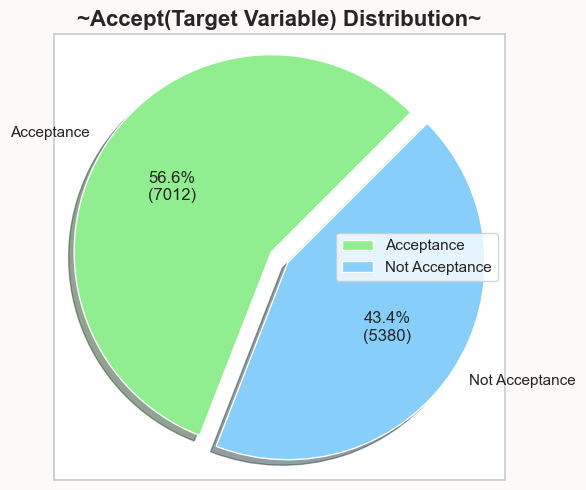

In [101]:
## stats & distribution of target variable.

print(target_col.describe().round(3))

counts = target_col.value_counts()
total = counts.sum()

plt.figure(figsize = (6, 6),\
           facecolor = 'snow')

plt.pie(x = counts,\
        colors = ['lightgreen', 'lightskyblue'],\
        labels = ['Acceptance', 'Not Acceptance'],\
        explode = (0, 0.1),\
        shadow = True,\
        autopct = lambda x: f'{x:.1f}%\n({int(x * total / 100)})',\
        startangle = 45,\
        frame = True
       )

plt.title('~Accept(Target Variable) Distribution~',\
          fontweight = 'bold',\
          fontsize = 16)
plt.legend()
plt.grid(visible = False)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

# Bivariate Analysis

### Customer Demographics & Acceptance Behavior

In [105]:
df.columns

Index(['Destination', 'Passanger', 'Weather', 'Coupon', 'Gender',
       'Marital_Status', 'Has_Children', 'Education', 'Occupation', 'Bar',
       'Coffee_House', 'Carry_Away', 'Restaurant_Less_Than_20',
       'Restaurant_20_To_50', 'To_Coupon_Geq_5_Min', 'To_Coupon_Geq_15_Min',
       'To_Coupon_Geq_25_Min', 'Direction_Same', 'Direction_Opp', 'Accept_Y_N',
       'Temperature_Bin', 'Income_Bin', 'Expiration_Hours', 'Age_Group'],
      dtype='object')

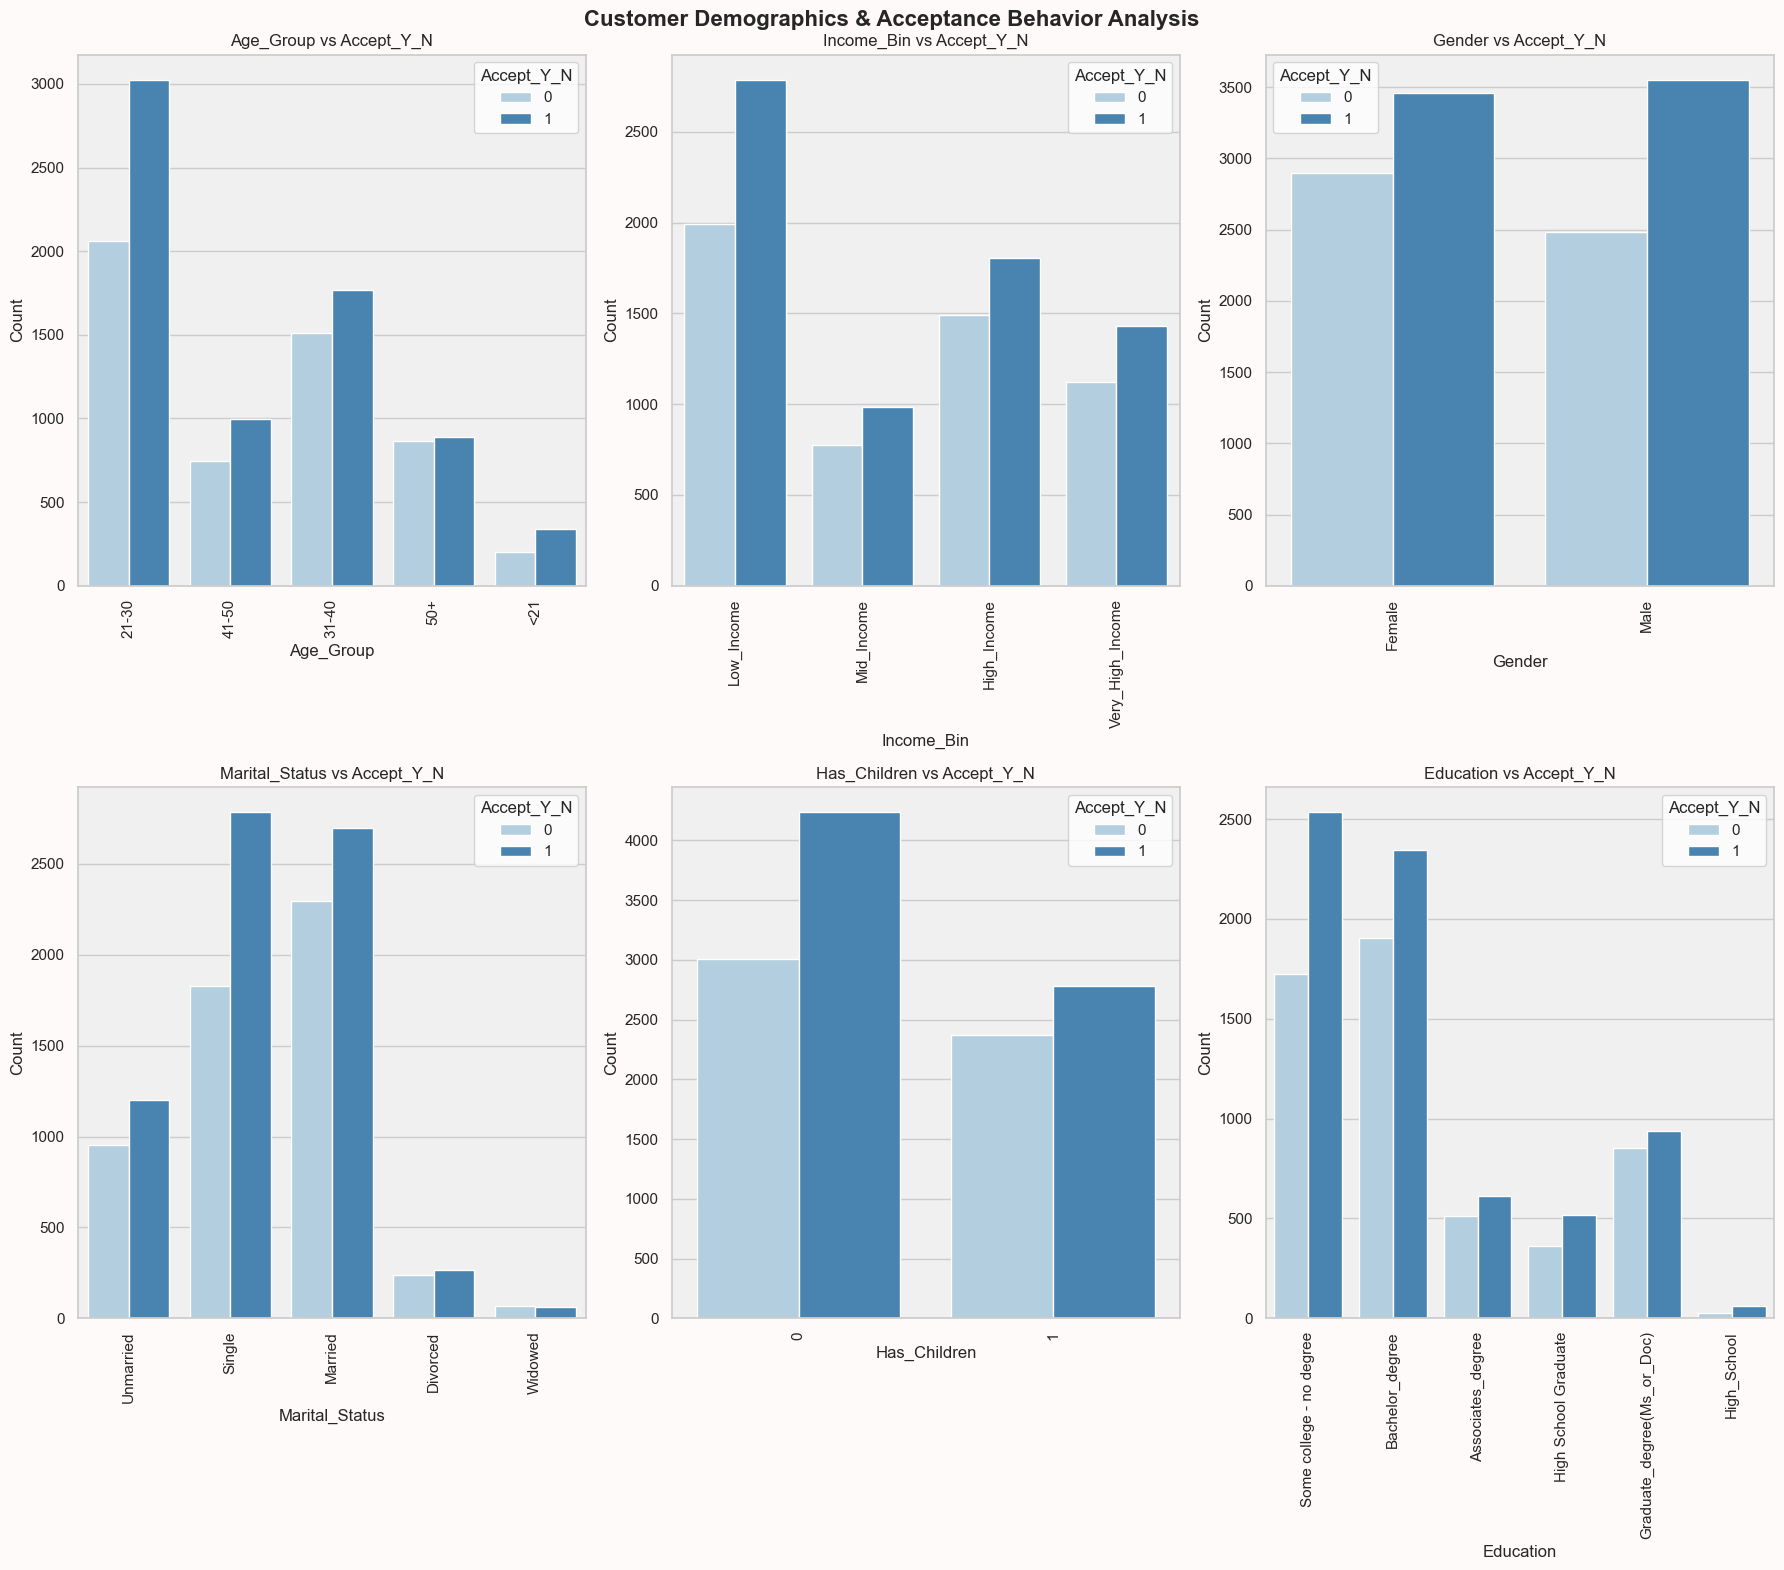

In [107]:
## plot.

fig, axs = plt.subplots(2, 3, figsize=(18, 16), facecolor = 'snow')

df1 = ['Age_Group', 'Income_Bin', 'Gender', 'Marital_Status', 'Has_Children', 'Education']

for i, feature in enumerate(df1):
    ax = axs[i//3, i%3]
    sns.countplot(data = df, x = feature, hue = 'Accept_Y_N', ax = ax, palette = "Blues")
    ax.set_title(f'{feature} vs Accept_Y_N')
    ax.set_ylabel('Count')
    ax.set_xlabel(feature)
    ax.tick_params(axis = 'x', rotation = 90)
    ax.set_facecolor('#f0f0f0')

plt.suptitle('Customer Demographics & Acceptance Behavior Analysis', fontweight = 'bold', fontsize = 16)
plt.tight_layout()
plt.show()

Key Insights:
1. Age Group:

• Younger people (21-30) seem to have a higher acceptance rate compared to older age groups.
• This suggests that younger demographics might be more engaged with coupon offers.
2. Income Bin:
• Low-Income individuals have the highest acceptance rate. This could indicate that coupons
are a strong incentive for individuals with limited purchasing power.
• High-Income individuals show lower acceptance, which may suggest that they are less reliant
on discounts or more selective with offers.
3. Gender:
• Females appear to have a higher acceptance rate than males, which might suggest that females
are more responsive to coupon offers or promotions.
4. Marital Status:
• Singles show a higher acceptance rate than married individuals. This could imply that single
individuals might be more flexible in terms of purchasing decisions, or they might be more
likely to use coupons as a way to save money.
5 Has Children: - Individuals with children tend to accept more coupons than those without.
This might indicate that parents are more inclined to seek out discounts and deals, possibly for
family-related purchases.
6.Education: - People with a Bachelors Degree or Graduate Degree show slightly lower acceptance
rates compared to those with no degree or associates degree. This could reflect a preference among
highly educated individuals for higher-value purchases rather than discount-driven choices

# Travel Behavior & Coupon Accessibility

In [112]:
df.columns

Index(['Destination', 'Passanger', 'Weather', 'Coupon', 'Gender',
       'Marital_Status', 'Has_Children', 'Education', 'Occupation', 'Bar',
       'Coffee_House', 'Carry_Away', 'Restaurant_Less_Than_20',
       'Restaurant_20_To_50', 'To_Coupon_Geq_5_Min', 'To_Coupon_Geq_15_Min',
       'To_Coupon_Geq_25_Min', 'Direction_Same', 'Direction_Opp', 'Accept_Y_N',
       'Temperature_Bin', 'Income_Bin', 'Expiration_Hours', 'Age_Group'],
      dtype='object')

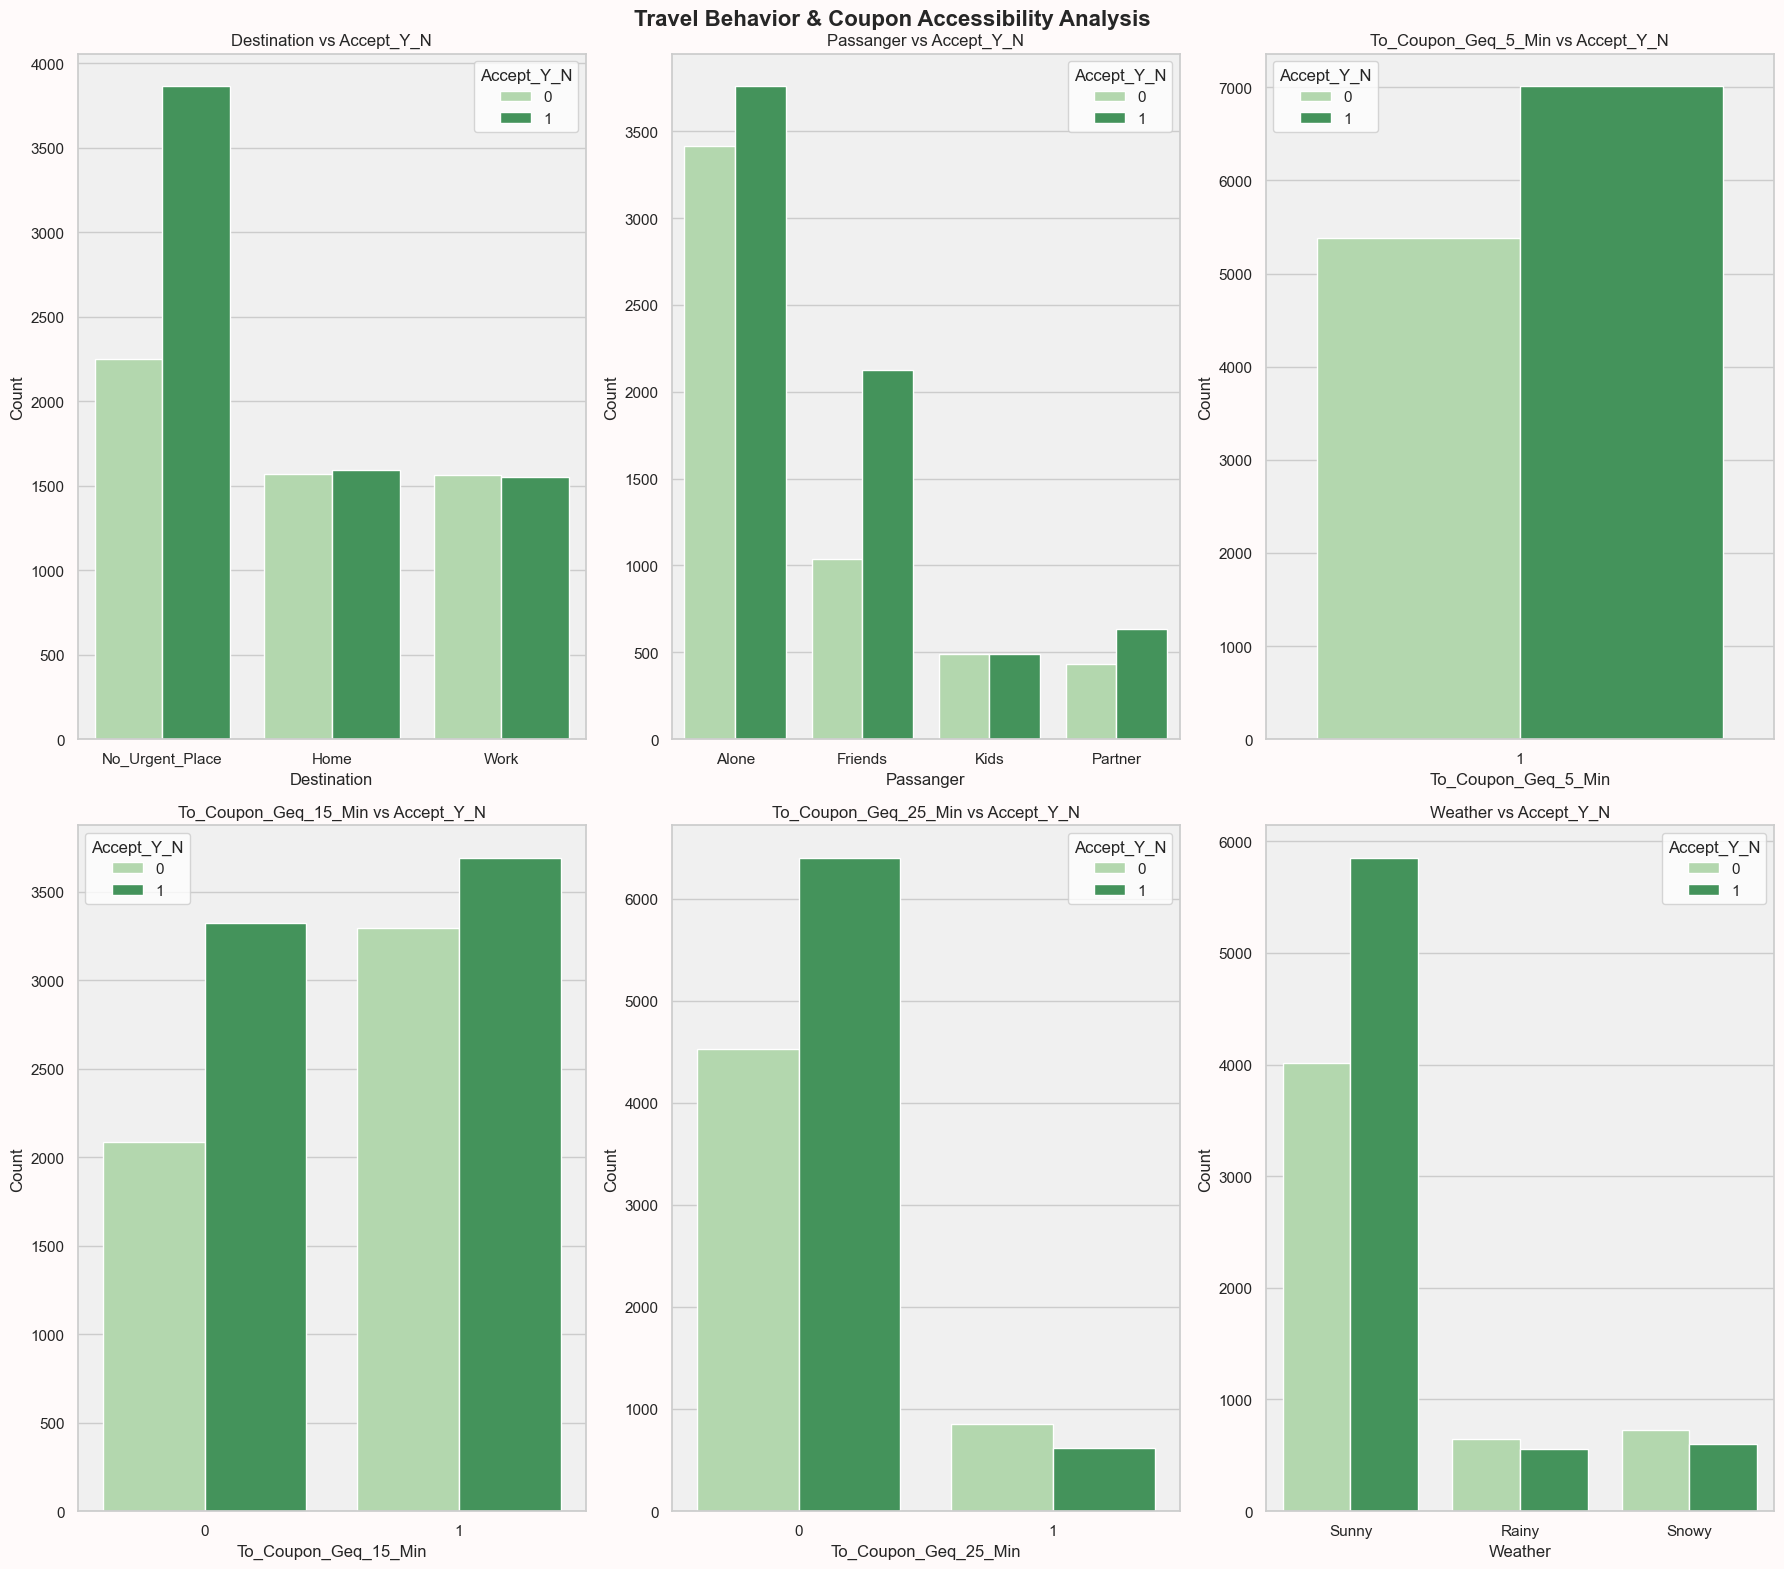

In [114]:
## plot.


fig, axs = plt.subplots(2, 3, figsize = (18, 16), facecolor = 'snow')
df2 = ['Destination', 'Passanger', 'To_Coupon_Geq_5_Min','To_Coupon_Geq_15_Min', 'To_Coupon_Geq_25_Min', 'Weather']

for i, feature in enumerate(df2):
    ax = axs[i // 3, i % 3]
    sns.countplot(data = df, x = feature, hue = 'Accept_Y_N', ax = ax,palette = "Greens")
    ax.set_title(f'{feature} vs Accept_Y_N')
    ax.set_ylabel('Count')
    ax.set_xlabel(feature)
    ax.set_facecolor('#f0f0f0')
    
plt.suptitle('Travel Behavior & Coupon Accessibility Analysis', fontweight ='bold', fontsize = 16)
plt.tight_layout()
plt.show()

Key Insights:
1. Destination:
• Coupons seem to be more accepted for trips that are related to ‘Work’ or ‘No Urgent Place’
rather than ‘Home.’
• This could indicate that customers are more inclined to accept coupons when traveling for
work or non-urgent purposes.
2. Passanger:
• Solo travelers (‘Alone’) appear to have a higher acceptance rate compared to those traveling
with others (Friends, Partner, or Kids).
• This could suggest that solo travelers are more likely to make individual purchasing decisions,
making them more likely to use coupons.
3.To_Coupon_Geq_5_Min / 15_Min / 25_Min: - Shorter distances (To_Coupon_Geq_5_Min)
seem to have a higher acceptance rate. - Longer distances (>25 min) show lower acceptance,
suggesting that people traveling shorter distances might be more responsive to c
4.Direction_Same / Direction_Opp: - Acceptance rates appear to be higher when the travel direction is the same (Direction_Same). - This might suggest that individuals heading in the same
direction as the coupon offer (e.g., location-based promotions) are more likely to accept.
5.Weather: - Sunny weather seems to have a higher acceptance rate compared to rainy or snowy
weather. - Bad weather (Rainy/Snowy) could discourage coupon acceptance, possibly because
people are less likely to go out and use them.
6.Temperature_Bin: - Hot temperatures seem to correlate with higher coupon acceptance, while
cold temperatures have a lower acceptance rate. - Extreme temperatures (either hot or cold)
might influence people’s willingness to use coupons, as they might be less willing to go out during
uncomfortable weather conditions.
• These insights can be leveraged to better target coupon offers based on travel behavior, such
as focusing on solo travelers or promoting coupons for work-related trips.oupon offers.

## Coupon Type & Past Purchase Behavior

In [118]:
df.columns

Index(['Destination', 'Passanger', 'Weather', 'Coupon', 'Gender',
       'Marital_Status', 'Has_Children', 'Education', 'Occupation', 'Bar',
       'Coffee_House', 'Carry_Away', 'Restaurant_Less_Than_20',
       'Restaurant_20_To_50', 'To_Coupon_Geq_5_Min', 'To_Coupon_Geq_15_Min',
       'To_Coupon_Geq_25_Min', 'Direction_Same', 'Direction_Opp', 'Accept_Y_N',
       'Temperature_Bin', 'Income_Bin', 'Expiration_Hours', 'Age_Group'],
      dtype='object')

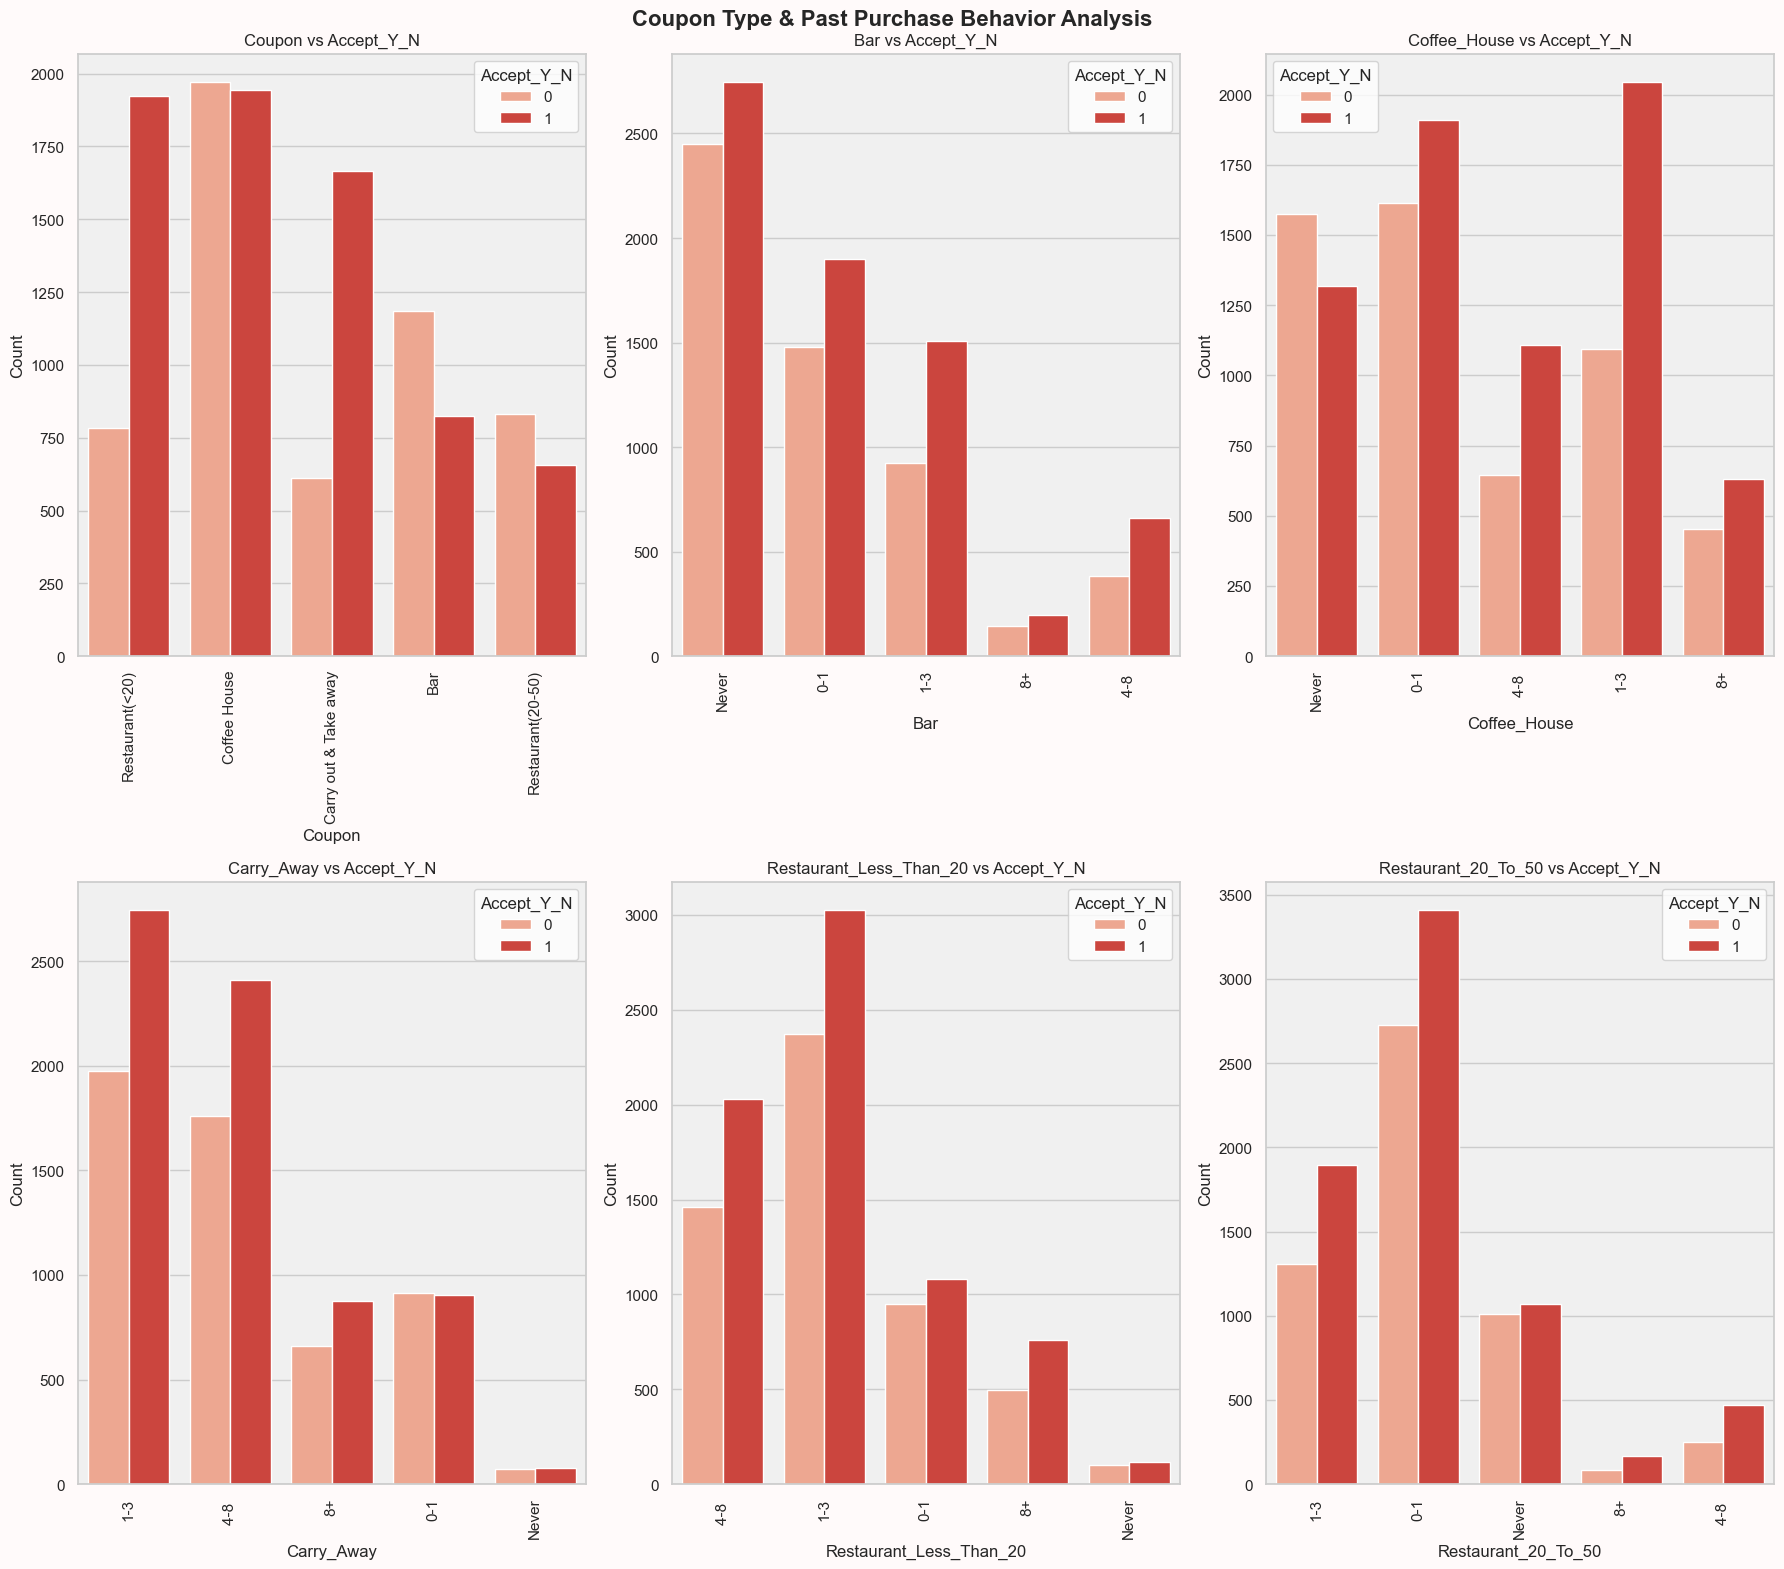

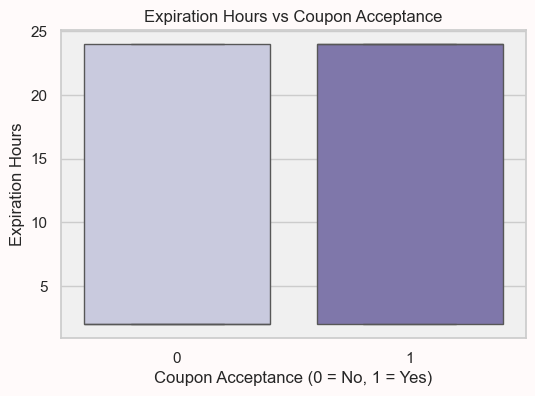

In [120]:
## plot.

fig, axs = plt.subplots(2, 3, figsize = (18, 16), facecolor = 'snow')
df3 = ['Coupon', 'Bar', 'Coffee_House', 'Carry_Away', 'Restaurant_Less_Than_20', 'Restaurant_20_To_50']

for i, feature in enumerate(df3):
    ax = axs[i // 3, i % 3]
    sns.countplot(data = df, x = feature, hue = 'Accept_Y_N', ax = ax, palette = "Reds")
    ax.set_title(f'{feature} vs Accept_Y_N')
    ax.set_ylabel('Count')
    ax.set_xlabel(feature)
    ax.tick_params(axis = 'x', rotation = 90)
    ax.set_facecolor('#f0f0f0')

plt.suptitle('Coupon Type & Past Purchase Behavior Analysis', fontweight = 'bold', fontsize = 16)
plt.tight_layout()
plt.show()

plt.figure(figsize = (6, 4), facecolor = 'snow')

sns.boxplot(data = df, x = 'Accept_Y_N', y = 'Expiration_Hours', palette = "Purples")

plt.title('Expiration Hours vs Coupon Acceptance')
plt.xlabel('Coupon Acceptance (0 = No, 1 = Yes)')
plt.ylabel('Expiration Hours')
plt.gca().set_facecolor('#f0f0f0')
plt.show()

Key Insights:
1. Coupon:
• ‘Coffee House’ and ‘Restaurant(<20)’ are the most frequently accepted coupons.
• This could suggest that customers are more inclined to visit casual dining options or places
they visit regularly.
2.Bar / Coffee_House / Carry_Away / Restaurant_Less_Than_20 / Restaurant_20_To_50: -
Frequent visits to bars and coffee houses (0-1 or 1-3 visits) correlate with higher coupon acceptance.
- It suggests that customers who frequently visit these places are more likely to accept offers from
them. - For restaurants, lower visit frequencies (0-1) seem to correlate with a higher acceptance
rate. - Customers may be more likely to accept coupons for restaurants they visit less frequently,
possibly to entice them to visit more.
3.Expiration_Hours: - Coupons with shorter expiration times (1-3 hours) appear to have a higher
acceptance rate. - This could suggest that urgency influences coupon acceptance—customers are
more likely to accept a coupon if they feel they have limited time to use it. - Longer expiration
times (8-12 hours) may result in lower acceptance, as customers might not feel as pressured to use
the coupon immediately.
• These insights could guide how coupons are structured—considering urgency for time-sensitive
offers and focusing on coupons for frequent venues (like coffee houses) to increase acceptance.

 Summary of Key Insights from the Bivariate Analysis:
1. Customer Demographics & Acceptance Behavior:
• Younger age groups, particularly 21-30, have a higher acceptance rate, which can inform
targeting of youth-centric promotions.
• Low-income individuals show the highest acceptance rate, so offering coupons to this group
could be more effective.
• Females are more likely to accept coupons than males, indicating that coupon campaigns
could be tailored with more emphasis on female consumers.
• Singles accept coupons more than married individuals, which suggests flexibility in purchasing
behavior.
• Parents (Has Children) tend to accept more coupons, which could be a strategy for targeting
family-oriented offers.
• Individuals with no degree or associates degree are more likely to accept coupons, which could
guide messaging towards less educated consumers.
2. Travel Behavior & Coupon Accessibility:
• People traveling to “No Urgent Place” seem more inclined to accept coupons, suggesting
flexibility in travel-related spending.
• Solo travelers are more likely to accept coupons, indicating a potential audience for offers
targeting individual consumption.
• Shorter travel distances (To_Coupon_Geq_5_Min) tend to correlate with higher acceptance,
suggesting that proximity to locations or convenience plays a role in decision-making.
• Driving direction also influences acceptance, with different acceptance patterns for same direction versus opposite direction.
• Weather and Temperature Bin appear to have an influence, with Sunny days leading to higher
coupon acceptance. This could help in planning time-sensitive offers during favorable weather
conditions.
3. Coupon Type & Past Purchase Behavior:
• Coffee House and Restaurant(<20) are the most frequently accepted coupons, with lowfrequency visitors showing more willingness to accept offers from restaurants.
• Frequent visits (0-1 or 1-3 times) to bars and coffee houses result in higher acceptance,
implying habitual customers respond well to loyalty incentives.
• Coupons with shorter expiration times are accepted more frequently, implying urgency is a
motivating factor.

# Multivariate Analysis

### Demographics

In [126]:
df.columns

Index(['Destination', 'Passanger', 'Weather', 'Coupon', 'Gender',
       'Marital_Status', 'Has_Children', 'Education', 'Occupation', 'Bar',
       'Coffee_House', 'Carry_Away', 'Restaurant_Less_Than_20',
       'Restaurant_20_To_50', 'To_Coupon_Geq_5_Min', 'To_Coupon_Geq_15_Min',
       'To_Coupon_Geq_25_Min', 'Direction_Same', 'Direction_Opp', 'Accept_Y_N',
       'Temperature_Bin', 'Income_Bin', 'Expiration_Hours', 'Age_Group'],
      dtype='object')

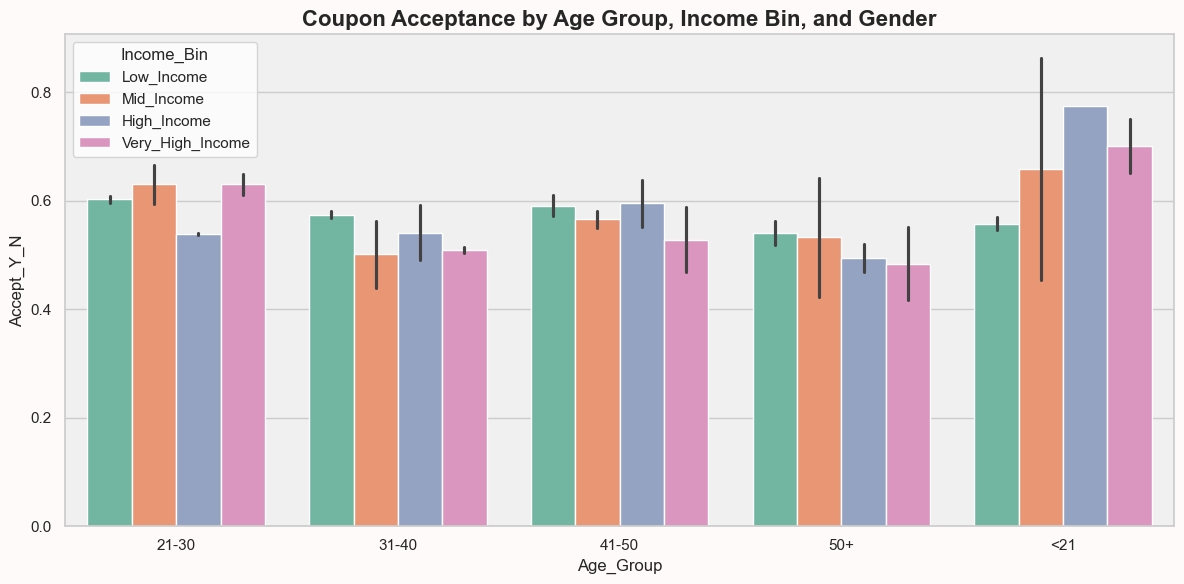

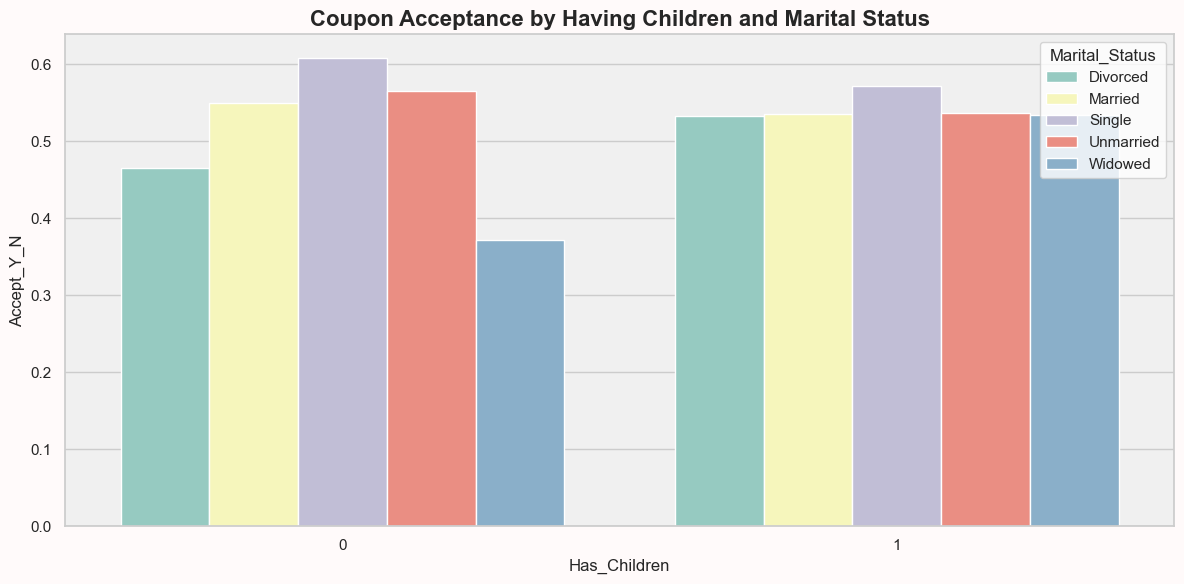

In [128]:
## age, income, gender & children, marital status..

age_income_gender = df.groupby(['Age_Group', 'Income_Bin', 'Gender'])['Accept_Y_N'].mean().reset_index()
children_marital = df.groupby(['Has_Children', 'Marital_Status'])['Accept_Y_N'].mean().reset_index()

plt.figure(figsize = (12, 6),\
           facecolor = 'snow')

sns.barplot(x = 'Age_Group', y = 'Accept_Y_N', hue = 'Income_Bin', data = age_income_gender, palette = 'Set2')
plt.title('Coupon Acceptance by Age Group, Income Bin, and Gender', fontweight = 'bold', fontsize = 16)
plt.gca().set_facecolor('#f0f0f0')
plt.tight_layout()
plt.show()

plt.figure(figsize = (12, 6),\
           facecolor = 'snow')

sns.barplot(x = 'Has_Children', y = 'Accept_Y_N', hue = 'Marital_Status', data = children_marital, palette = 'Set3')
plt.title('Coupon Acceptance by Having Children and Marital Status', fontweight = 'bold', fontsize = 16)
plt.gca().set_facecolor('#f0f0f0')
plt.tight_layout()
plt.show()

Insights:
1. Age_Group, Income_Bin, and Gender:
• Younger individuals (particularly those aged 21-30) may show higher coupon acceptance rates.
• Low-income individuals tend to accept coupons more, while high-income individuals show
lower acceptance.
• Gender differences in coupon acceptance, such as females accepting more coupons than males,
could be observed.
2. Has_Children and Marital_Status:
• Parents may be more inclined to accept coupons than non-parents, as coupons often target
family-oriented products or services.
• Single individuals may show higher coupon acceptance than married individuals, possibly due
to differences in spending behavior and flexibility

### Travel Behavior

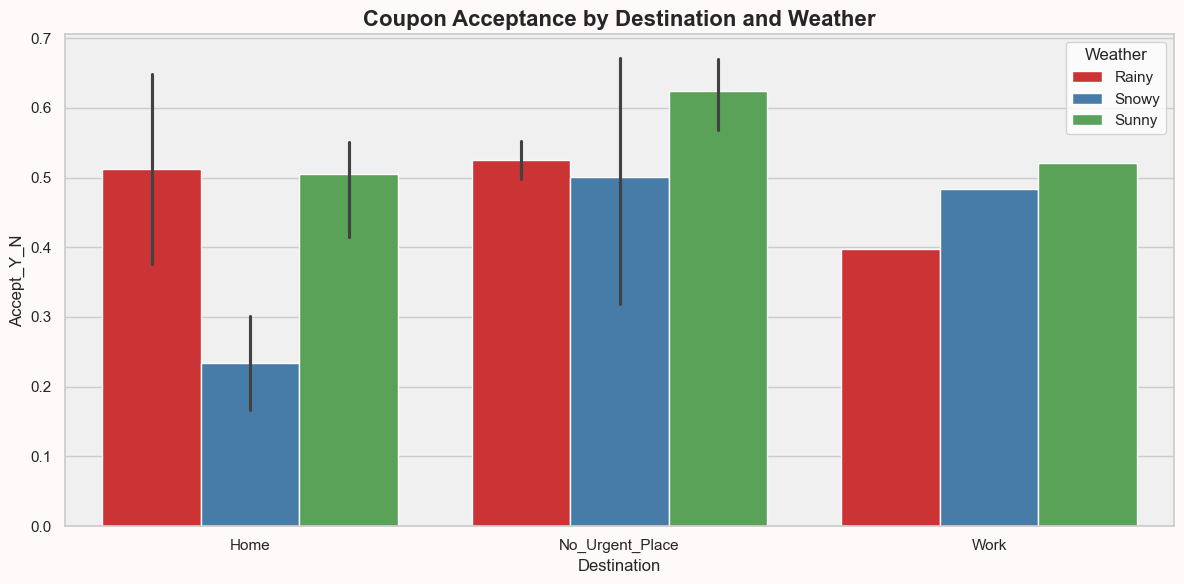

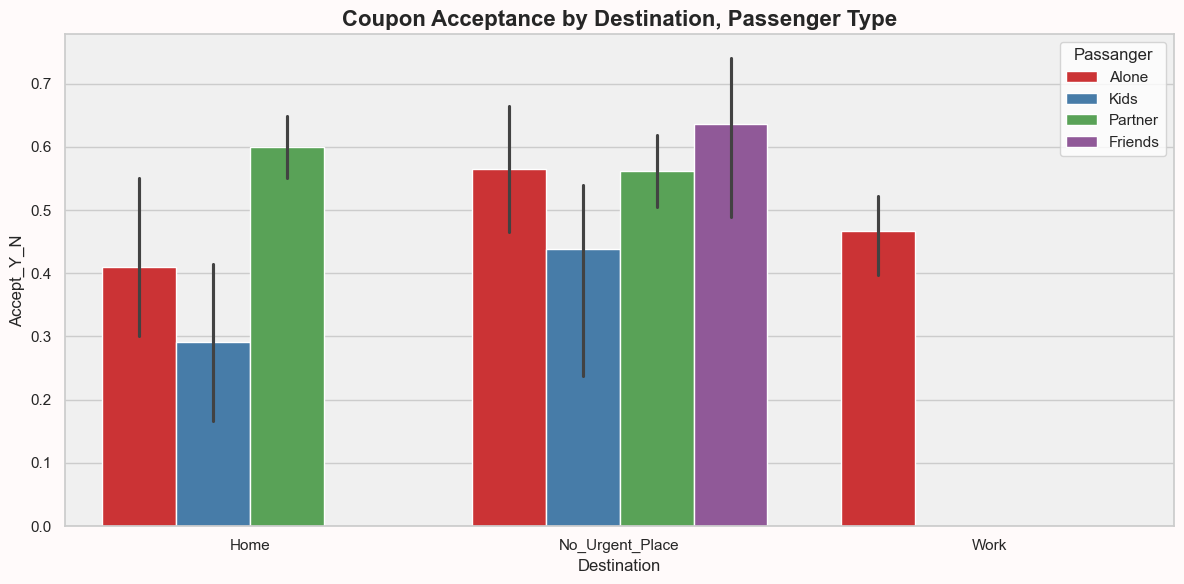

In [132]:
## destination, weather, passanger.

travel_weather = df.groupby(['Destination', 'Passanger','Weather'])['Accept_Y_N'].mean().reset_index()

plt.figure(figsize = (12, 6),\
           facecolor = 'snow')

sns.barplot(x = 'Destination', y = 'Accept_Y_N', hue = 'Weather', data =travel_weather, palette = 'Set1')

plt.title('Coupon Acceptance by Destination and Weather', fontweight = 'bold',fontsize = 16)
plt.gca().set_facecolor('#f0f0f0')
plt.tight_layout()
plt.show()

plt.figure(figsize = (12, 6),\
           facecolor = 'snow')

sns.barplot(x = 'Destination', y = 'Accept_Y_N', hue = 'Passanger', data =travel_weather, palette = 'Set1')
plt.title('Coupon Acceptance by Destination, Passenger Type', fontweight ='bold', fontsize = 16)
plt.gca().set_facecolor('#f0f0f0')
plt.tight_layout()
plt.show()

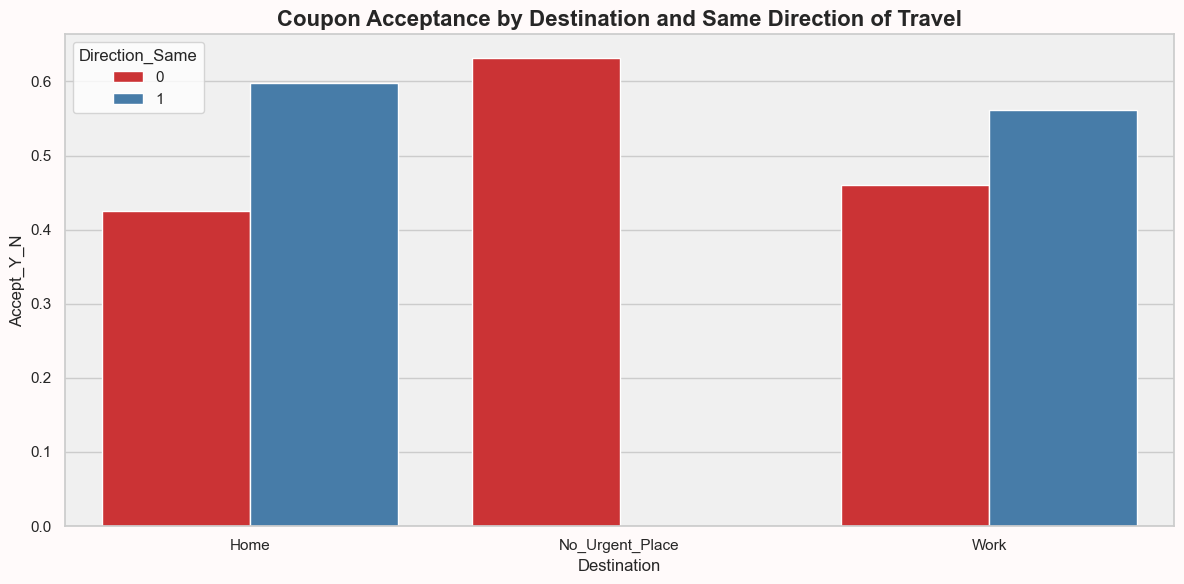

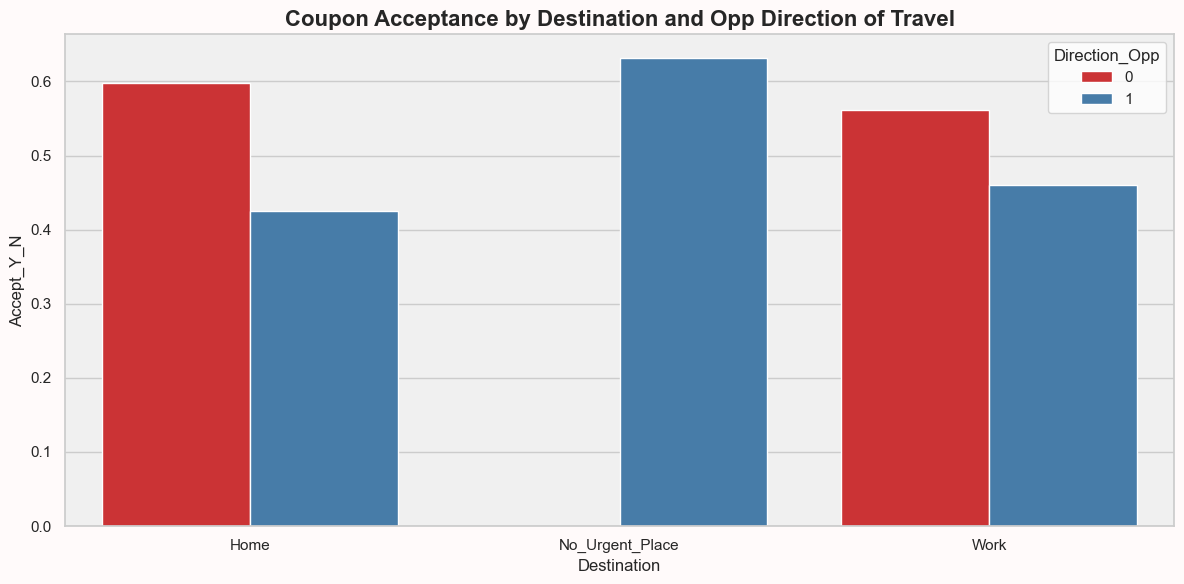

In [134]:
## destination, directions.

direction_destination = df.groupby(['Destination', 'Direction_Same','Direction_Opp'])['Accept_Y_N'].mean().reset_index()

plt.figure(figsize = (12, 6),\
           facecolor = 'snow')

sns.barplot(x = 'Destination', y = 'Accept_Y_N', hue = 'Direction_Same', data =direction_destination, palette = 'Set1')
plt.title('Coupon Acceptance by Destination and Same Direction of Travel',fontweight = 'bold', fontsize = 16)
plt.gca().set_facecolor('#f0f0f0')
plt.tight_layout()
plt.show()

plt.figure(figsize = (12, 6),\
           facecolor = 'snow')

sns.barplot(x = 'Destination', y = 'Accept_Y_N', hue = 'Direction_Opp', data =direction_destination, palette = 'Set1')
plt.title('Coupon Acceptance by Destination and Opp Direction of Travel',fontweight = 'bold', fontsize = 16)
plt.gca().set_facecolor('#f0f0f0')
plt.tight_layout()
plt.show()

Insights:
1. Destination, Passenger, and Weather:
• Coupon acceptance might vary based on the travel destination. For example, individuals
traveling to work or home might accept coupons more than those traveling to places with no
urgent purpose.
• Solo travelers may show different coupon acceptance behavior than those traveling with friends
or family.
• Weather conditions (e.g., rainy or snowy days) could impact coupon acceptance, with bad
weather possibly leading to more coupon usage for indoor or convenience purchases.
36
2. Destination, Direction_Same, Direction_Opp:
• Direction of travel may have an influence on coupon acceptance. For example, those traveling
in the same direction (e.g., on their way to work) might be more likely to accept coupons
related to their destination, while those traveling in the opposite direction may not feel as
engaged with the coupon offers.

### Coupon Usage

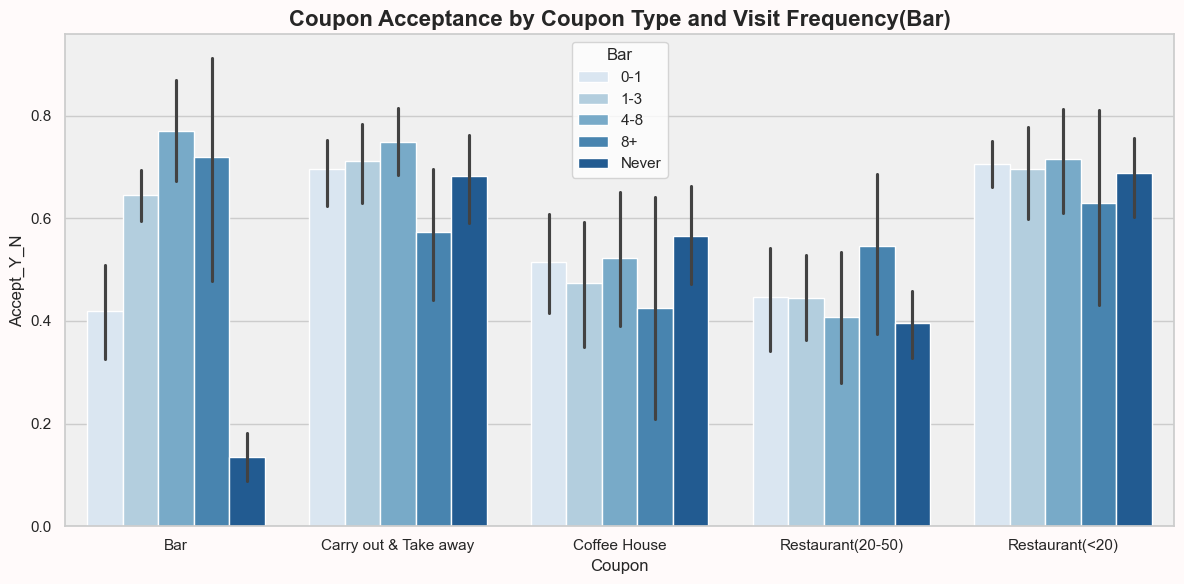

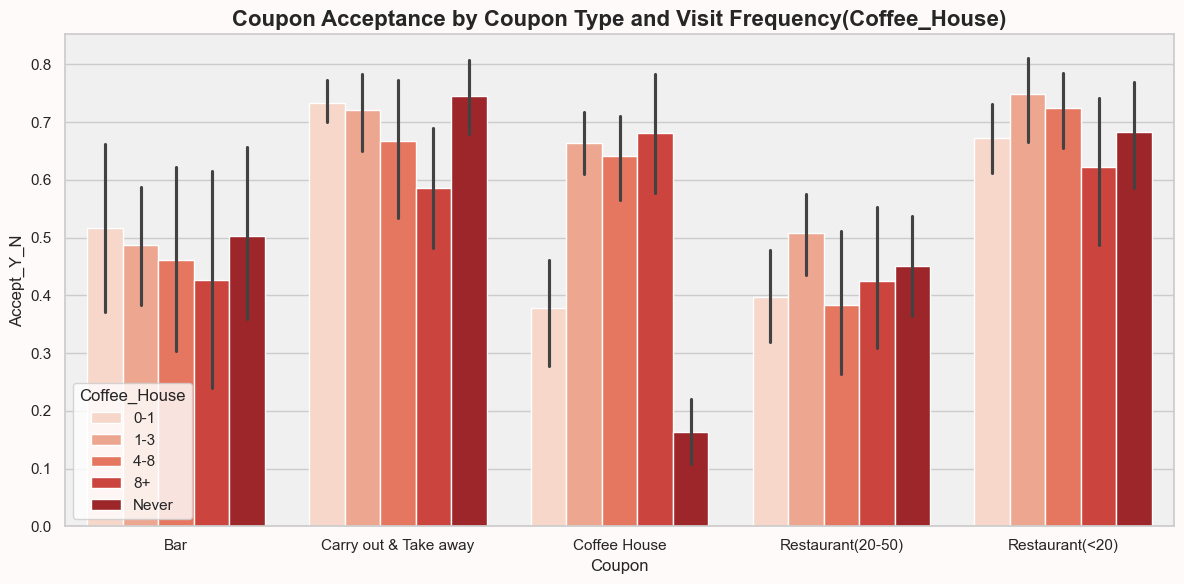

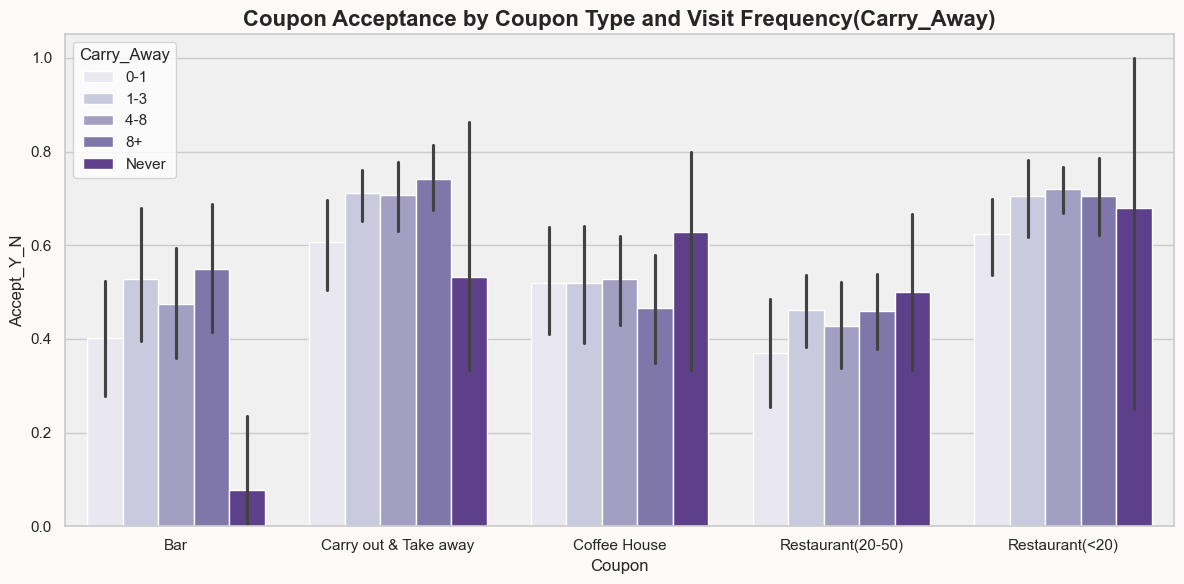

In [139]:
## coupon usage.

coupon_visit_group = df.groupby(['Coupon', 'Bar', 'Coffee_House', 'Carry_Away'])['Accept_Y_N'].mean().reset_index()
expiration_group = df.groupby(['Expiration_Hours', 'Coupon'])['Accept_Y_N'].mean().reset_index()

plt.figure(figsize = (12, 6),\
           facecolor = 'snow')

sns.barplot(x = 'Coupon', y = 'Accept_Y_N', hue = 'Bar', data = coupon_visit_group, palette = 'Blues')
plt.title('Coupon Acceptance by Coupon Type and Visit Frequency(Bar)', fontweight = 'bold', fontsize = 16)
plt.gca().set_facecolor('#f0f0f0')
plt.tight_layout()
plt.show()

plt.figure(figsize = (12, 6),\
           facecolor = 'snow')

sns.barplot(x = 'Coupon', y = 'Accept_Y_N', hue = 'Coffee_House', data = coupon_visit_group, palette = 'Reds')
plt.title('Coupon Acceptance by Coupon Type and Visit Frequency(Coffee_House)', fontweight = 'bold', fontsize = 16)
plt.gca().set_facecolor('#f0f0f0')
plt.tight_layout()
plt.show()

plt.figure(figsize = (12, 6),\
           facecolor = 'snow')

sns.barplot(x = 'Coupon', y = 'Accept_Y_N', hue = 'Carry_Away', data = coupon_visit_group, palette = 'Purples')
plt.title('Coupon Acceptance by Coupon Type and Visit Frequency(Carry_Away)', fontweight = 'bold', fontsize = 16)
plt.gca().set_facecolor('#f0f0f0')
plt.tight_layout()
plt.show()

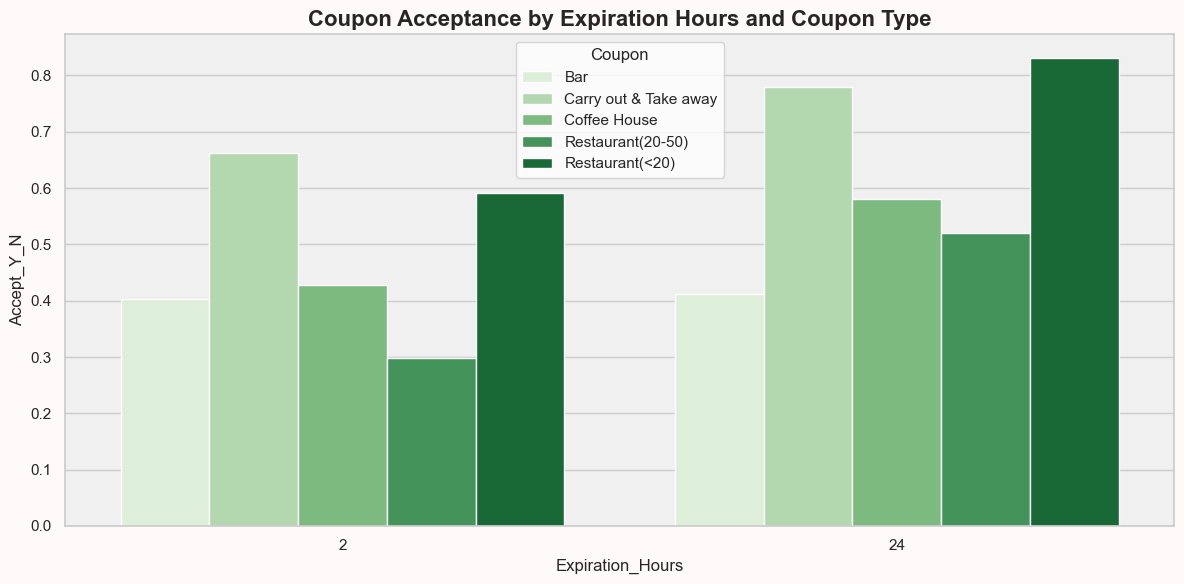

In [140]:
## expiration_hours.

expiration = df.groupby(['Expiration_Hours', 'Coupon'])['Accept_Y_N'].mean().reset_index()

plt.figure(figsize = (12, 6),\
           facecolor = 'snow')

sns.barplot(x = 'Expiration_Hours', y = 'Accept_Y_N', hue = 'Coupon', data = expiration, palette = 'Greens')
plt.title('Coupon Acceptance by Expiration Hours and Coupon Type', fontweight = 'bold', fontsize = 16)
plt.gca().set_facecolor('#f0f0f0')
plt.tight_layout()
plt.show()

Insights:
1. Coupon, Bar, Coffee_House, Carry_Away:
• People who frequently visit specific places like Coffee House may be more likely to accept
Coffee House coupons. Similar patterns may be found for other places like Bars or Restaurants. -This can suggest that habitual customers (those who visit more frequently) are more
likely to engage with offers related to the places they visit.
2. Expiration_Hours, Coupon:
• Shorter Expiration_Hours might correlate with higher coupon acceptance, especially if the
coupon is perceived as time-sensitive.
• Coupons with shorter expiration might create a sense of urgency, encouraging quicker decisionmaking and potentially higher acceptance rates.
• Coupons with longer expiration times may have lower immediate acceptance but could be
more suitable for customers who like to plan their purchases.

### corr_matrix

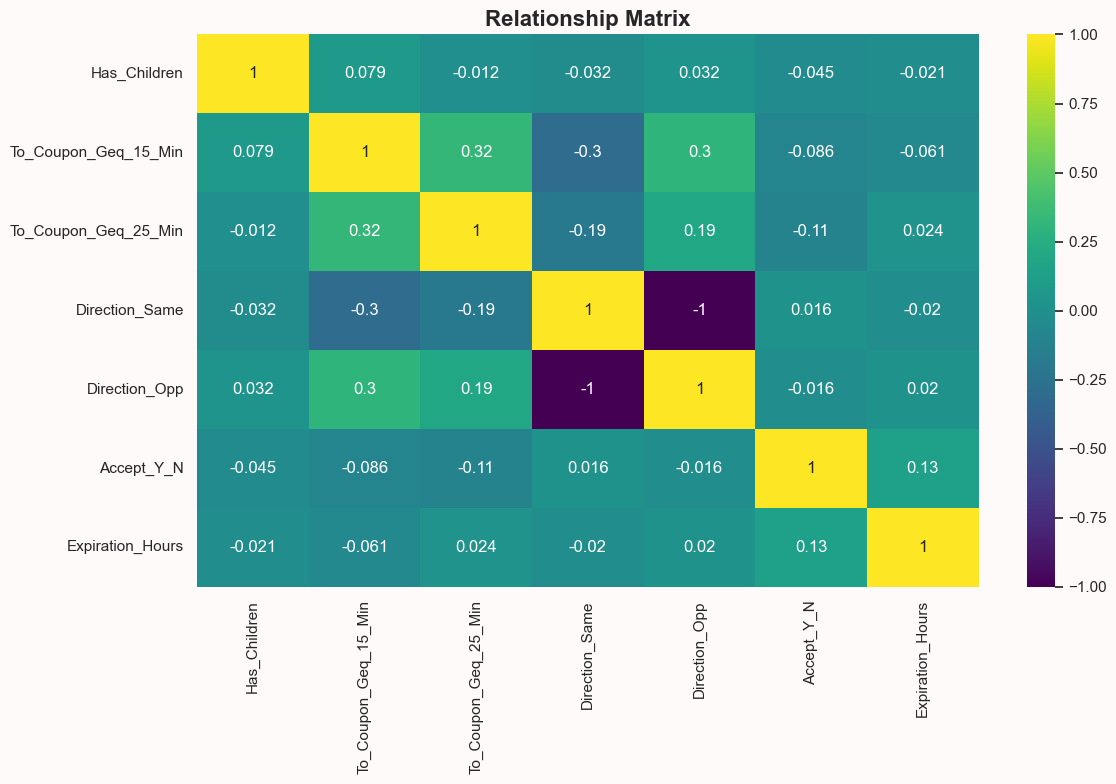

In [145]:
## relationship.

matrix = df.select_dtypes(include = np.number).drop('To_Coupon_Geq_5_Min',axis = 1)
corrm = matrix.corr()

plt.figure(figsize = (12, 8),\
           facecolor = 'snow')

sns.heatmap(corrm,\
            annot = True,\
            cbar = True,\
            cmap = 'viridis',\
           )

plt.title('Relationship Matrix', fontsize = 16, fontweight = 'bold')
plt.tight_layout()
plt.show()

### Observations:

• The correlations with Accept_Y_N are relatively weak, meaning that the target variable
does not have a strong linear relationship with the individual featuresnce.

• The strongest correlation is with Expiration_Hours (0.128379), suggesting a mild positive
relationship where longer expiration times may increase the likelihood of coupon acceptance.

<Figure size 1000x1400 with 0 Axes>

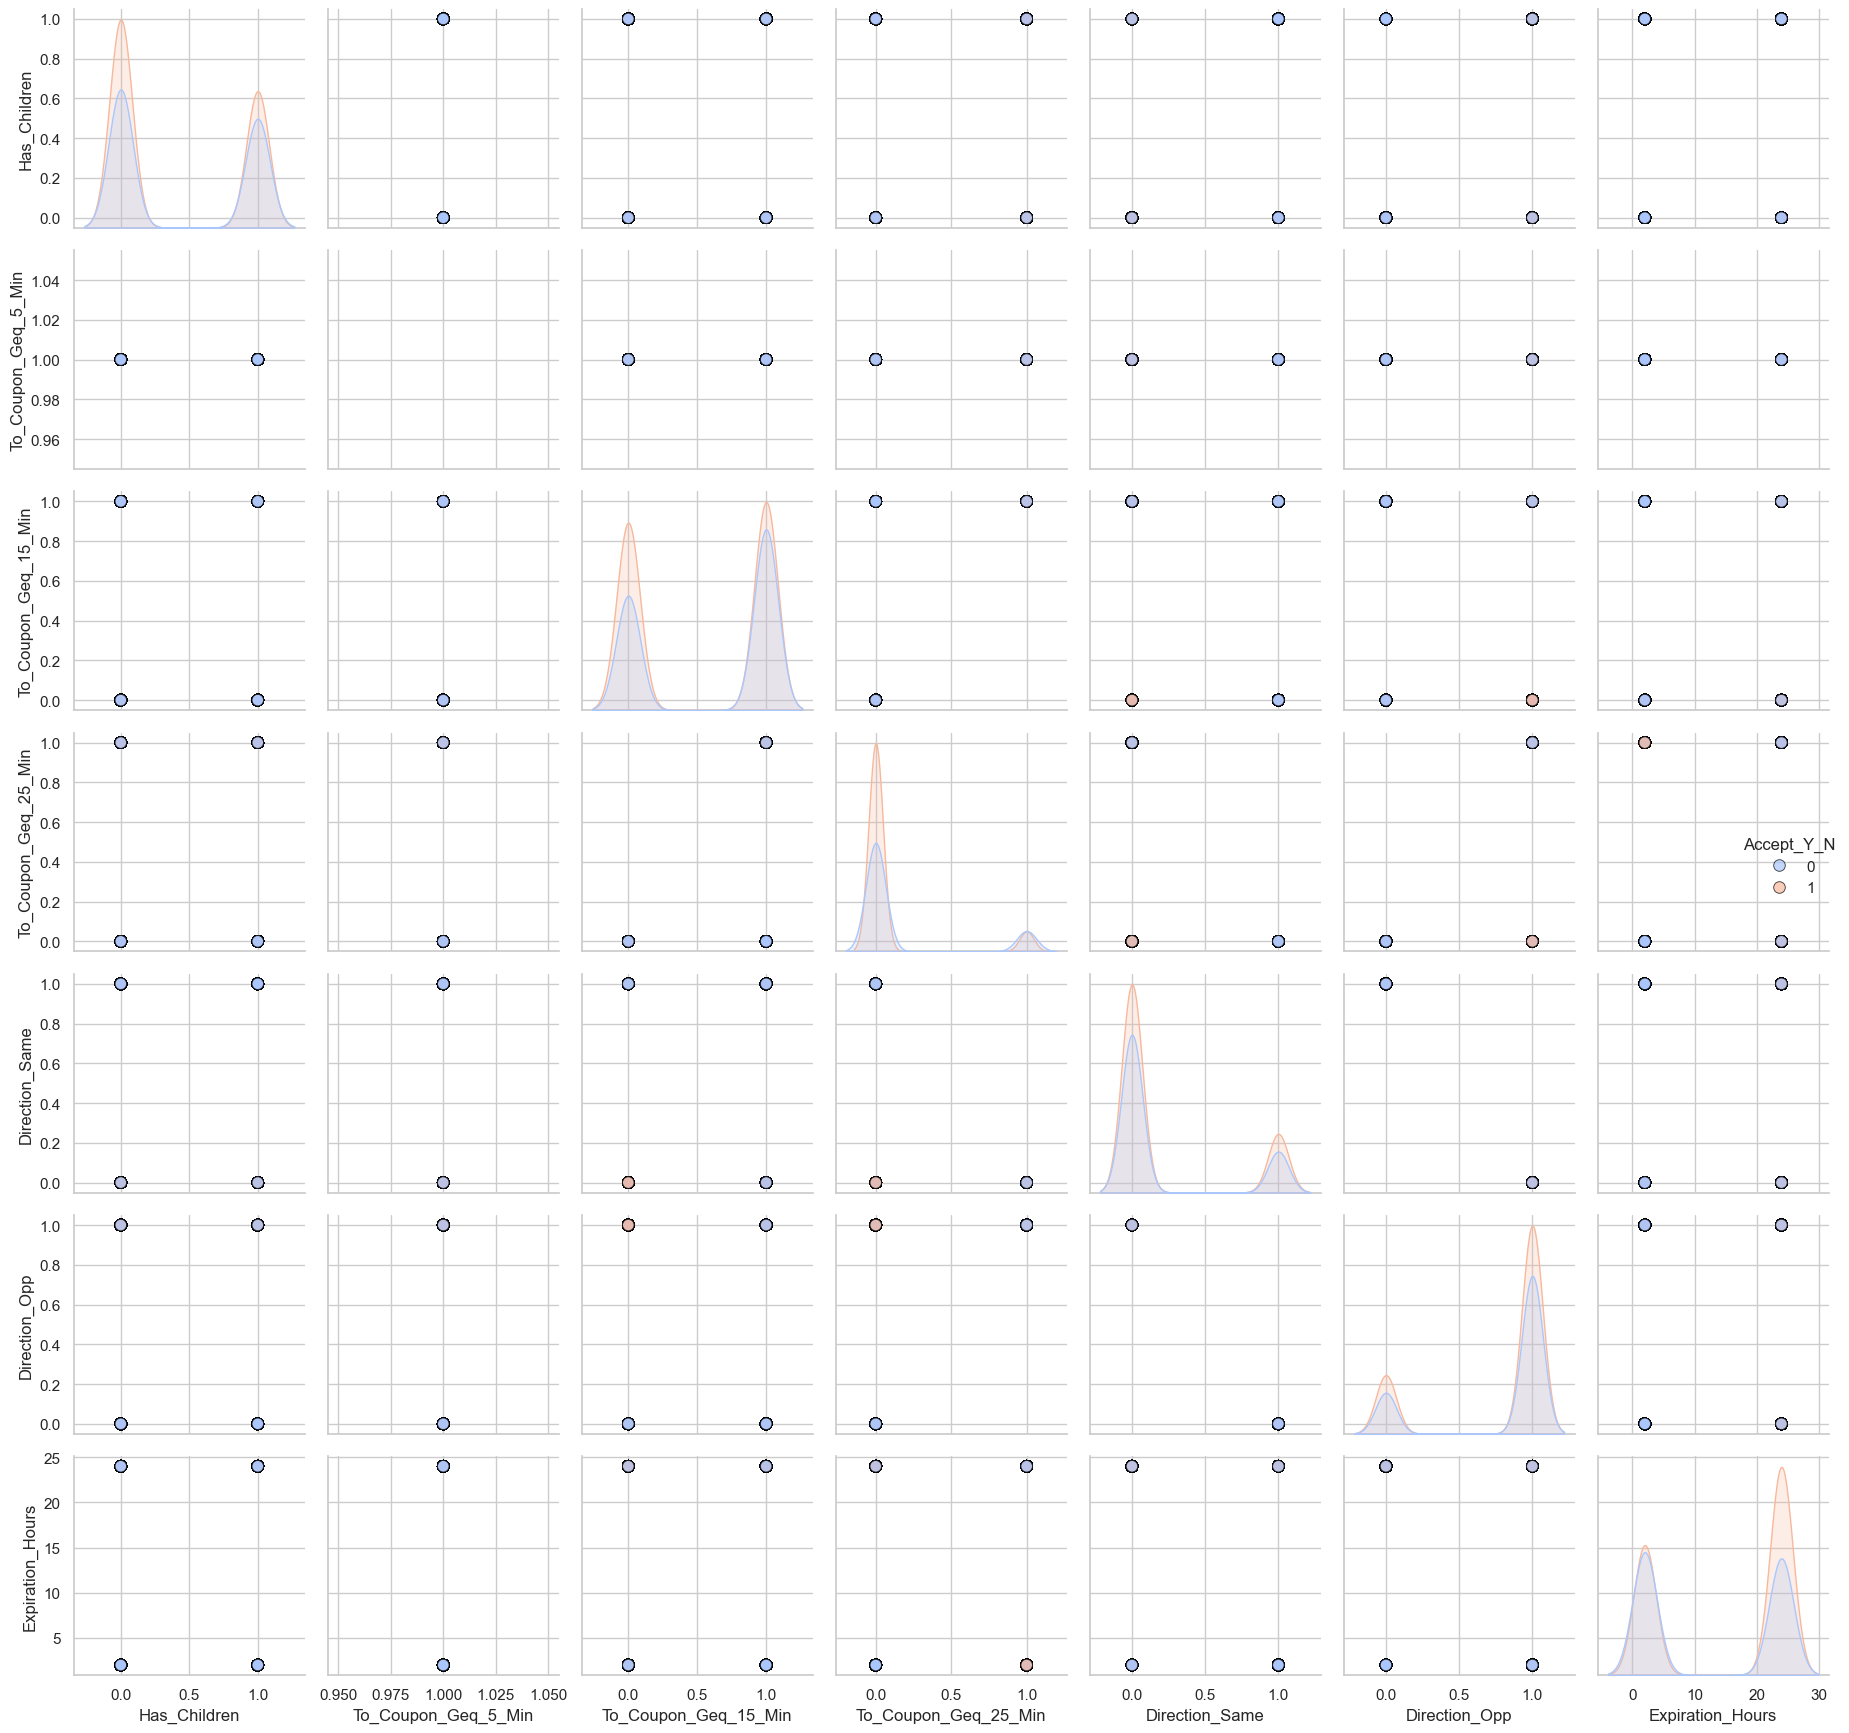

In [149]:
## plot.

pair_cols = df.select_dtypes(include = np.number)

plt.figure(figsize = (10, 14), facecolor = 'snow')
pairplot = sns.pairplot(pair_cols,\
                        height = 2.5,\
                        plot_kws = {'alpha': 0.7, 's': 70, 'edgecolor':'black'},\
                        kind = "scatter",\
                        diag_kind = "kde",\
                        markers = 'o',\
                        hue = 'Accept_Y_N',\
                        palette = 'coolwarm'
)
plt.tight_layout()
plt.show()

# Feature Engineering

## Feature Encoding

In [153]:
ordinal_features = ['Bar', 'Coffee_House', 'Carry_Away', 'Restaurant_Less_Than_20', 'Restaurant_20_To_50',
                    'Temperature_Bin', 'Age_Group', 'Income_Bin']
onehot_features = ['Destination', 'Passanger', 'Weather', 'Coupon', 'Gender', 'Marital_Status', 'Education', 'Occupation']

oe = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1)
df[ordinal_features] = oe.fit_transform(df[ordinal_features])

oh = OneHotEncoder(handle_unknown = 'ignore', drop = 'first')
encoded_array = oh.fit_transform(df[onehot_features]).toarray()

encoded_df = pd.DataFrame(encoded_array, columns = oh.get_feature_names_out(onehot_features))
df = pd.concat([df.drop(columns = onehot_features), encoded_df], axis = 1)
df.head()

Has_Children  Bar  Coffee_House  Carry_Away  Restaurant_Less_Than_20  \
0             1  4.0           4.0         1.0                      2.0   
1             1  4.0           4.0         1.0                      2.0   
2             1  4.0           4.0         1.0                      2.0   
3             1  4.0           4.0         1.0                      2.0   
4             1  4.0           4.0         1.0                      2.0   

   Restaurant_20_To_50  To_Coupon_Geq_5_Min  To_Coupon_Geq_15_Min  \
0                  1.0                    1                     0   
1                  1.0                    1                     0   
2                  1.0                    1                     1   
3                  1.0                    1                     1   
4                  1.0                    1                     1   

   To_Coupon_Geq_25_Min  Direction_Same  Direction_Opp  Accept_Y_N  \
0                     0               0              1           1   
1                     0               0              1           0   
2                     0               0              1           1   
3                     0               0              1           0   
4                     0               0              1           0   

   Temperature_Bin  Income_Bin  Expiration_Hours  Age_Group  \
0              2.0         2.0                24        0.0   
1              1.0         2.0                 2        0.0   
2              1.0         2.0                 2        0.0   
3              1.0         2.0                 2        0.0   
4              1.0         2.0                24        0.0   

   Destination_No_Urgent_Place  Destination_Work  Passanger_Friends  \
0                          1.0               0.0                0.0   
1                          1.0               0.0                1.0   
2                          1.0               0.0                1.0   
3                          1.0               0.0                1.0   
4                          1.0               0.0                1.0   

   Passanger_Kids  Passanger_Partner  Weather_Snowy  Weather_Sunny  \
0             0.0                0.0            0.0            1.0   
1             0.0                0.0            0.0            1.0   
2             0.0                0.0            0.0            1.0   
3             0.0                0.0            0.0            1.0   
4             0.0                0.0            0.0            1.0   

   Coupon_Carry out & Take away  Coupon_Coffee House  \
0                           0.0                  0.0   
1                           0.0                  1.0   
2                           1.0                  0.0   
3                           0.0                  1.0   
4                           0.0                  1.0   

   Coupon_Restaurant(20-50)  Coupon_Restaurant(<20)  Gender_Male  \
0                       0.0                     1.0          0.0   
1                       0.0                     0.0          0.0   
2                       0.0                     0.0          0.0   
3                       0.0                     0.0          0.0   
4                       0.0                     0.0          0.0   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Unmarried  \
0                     0.0                    0.0                       1.0   
1                     0.0                    0.0                       1.0   
2                     0.0                    0.0                       1.0   
3                     0.0                    0.0                       1.0   
4                     0.0                    0.0                       1.0   

   Marital_Status_Widowed  Education_Bachelor_degree  \
0                     0.0                        0.0   
1                     0.0                        0.0   
2                     0.0                        0.0   
3                     0.0                        0

## Data Imbalanced

In [155]:
## smote.

pred = df.drop('Accept_Y_N', axis = 1)
res = df['Accept_Y_N']

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(pred, res)
df = pd.concat([x_smote, y_smote], axis = 1)
df['Accept_Y_N'].value_counts(), df.shape

(Accept_Y_N
 1    7012
 0    7012
 Name: count, dtype: int64,
 (14024, 61))

## Correlation Matrix

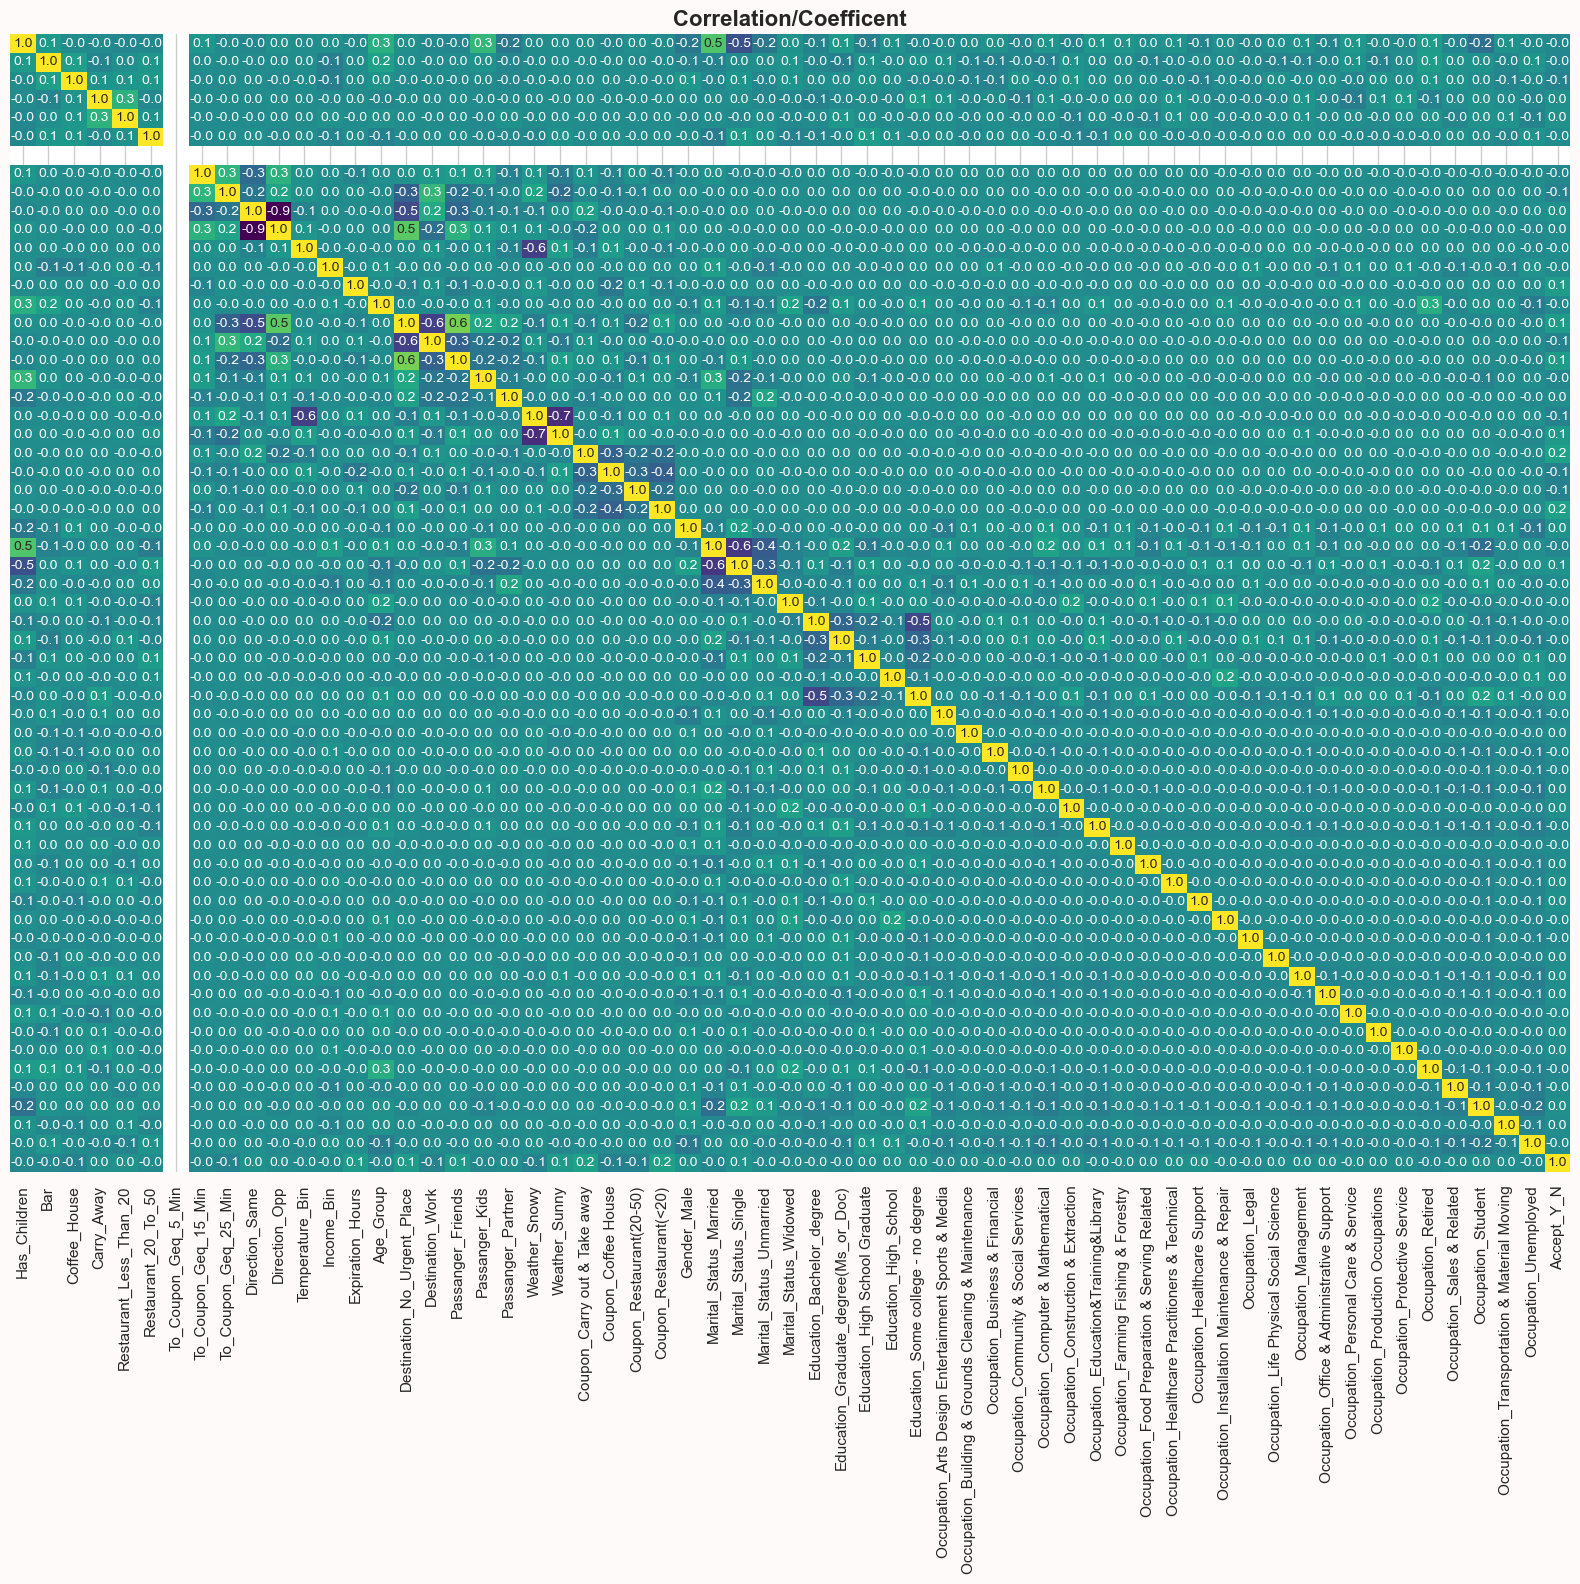

In [161]:
## corr matrix.

plt.figure(figsize = (16, 16),\
           facecolor = 'snow')

sns.heatmap(df.corr(),\
            annot = True,
            cbar = False,\
            cmap = 'viridis',\
            fmt = '.1f',\
            annot_kws = {'size': 10})

plt.yticks([])
plt.title('Correlation/Coefficent', fontweight = 'bold', fontsize = 16)
plt.tight_layout()
plt.show()

## MultiCollinearity

In [164]:
## mulitcolinearity.

X = df.select_dtypes(include = np.number)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(tb(vif_data, headers = 'keys', tablefmt = 'grid'))

+----+------------------------------------------------------+-----------+
|    | Feature                                              |       VIF |
+====+======================================================+===========+
|  0 | Has_Children                                         |   1.95622 |
+----+------------------------------------------------------+-----------+
|  1 | Bar                                                  |   1.19566 |
+----+------------------------------------------------------+-----------+
|  2 | Coffee_House                                         |   1.14425 |
+----+------------------------------------------------------+-----------+
|  3 | Carry_Away                                           |   1.25087 |
+----+------------------------------------------------------+-----------+
|  4 | Restaurant_Less_Than_20                              |   1.19901 |
+----+------------------------------------------------------+-----------+
|  5 | Restaurant_20_To_50            

In [166]:
df.columns

Index(['Has_Children', 'Bar', 'Coffee_House', 'Carry_Away',
       'Restaurant_Less_Than_20', 'Restaurant_20_To_50', 'To_Coupon_Geq_5_Min',
       'To_Coupon_Geq_15_Min', 'To_Coupon_Geq_25_Min', 'Direction_Same',
       'Direction_Opp', 'Temperature_Bin', 'Income_Bin', 'Expiration_Hours',
       'Age_Group', 'Destination_No_Urgent_Place', 'Destination_Work',
       'Passanger_Friends', 'Passanger_Kids', 'Passanger_Partner',
       'Weather_Snowy', 'Weather_Sunny', 'Coupon_Carry out & Take away',
       'Coupon_Coffee House', 'Coupon_Restaurant(20-50)',
       'Coupon_Restaurant(<20)', 'Gender_Male', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unmarried',
       'Marital_Status_Widowed', 'Education_Bachelor_degree',
       'Education_Graduate_degree(Ms_or_Doc)',
       'Education_High School Graduate', 'Education_High_School',
       'Education_Some college - no degree',
       'Occupation_Arts Design Entertainment Sports & Media',
       'Occupation_Buildi

In [168]:
## dropping some columns.

v_data = df.drop(['To_Coupon_Geq_5_Min', 'Direction_Opp', 'Occupation_Student', 'Occupation_Unemployed',\
                    'Destination_No_Urgent_Place', 'Weather_Sunny', 'Marital_Status_Married', 'Temperature_Bin',\
                    'Education_Bachelor_degree'], axis = 1)

In [170]:
## mulitcolinearity after dropping highly correlated features.

X = v_data.select_dtypes(include = np.number)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(tb(vif_data, headers = 'keys', tablefmt = 'grid'))

+----+------------------------------------------------------+---------+
|    | Feature                                              |     VIF |
+====+======================================================+=========+
|  0 | Has_Children                                         | 3.04115 |
+----+------------------------------------------------------+---------+
|  1 | Bar                                                  | 2.8826  |
+----+------------------------------------------------------+---------+
|  2 | Coffee_House                                         | 2.5675  |
+----+------------------------------------------------------+---------+
|  3 | Carry_Away                                           | 4.15026 |
+----+------------------------------------------------------+---------+
|  4 | Restaurant_Less_Than_20                              | 3.67758 |
+----+------------------------------------------------------+---------+
|  5 | Restaurant_20_To_50                                  | 1.

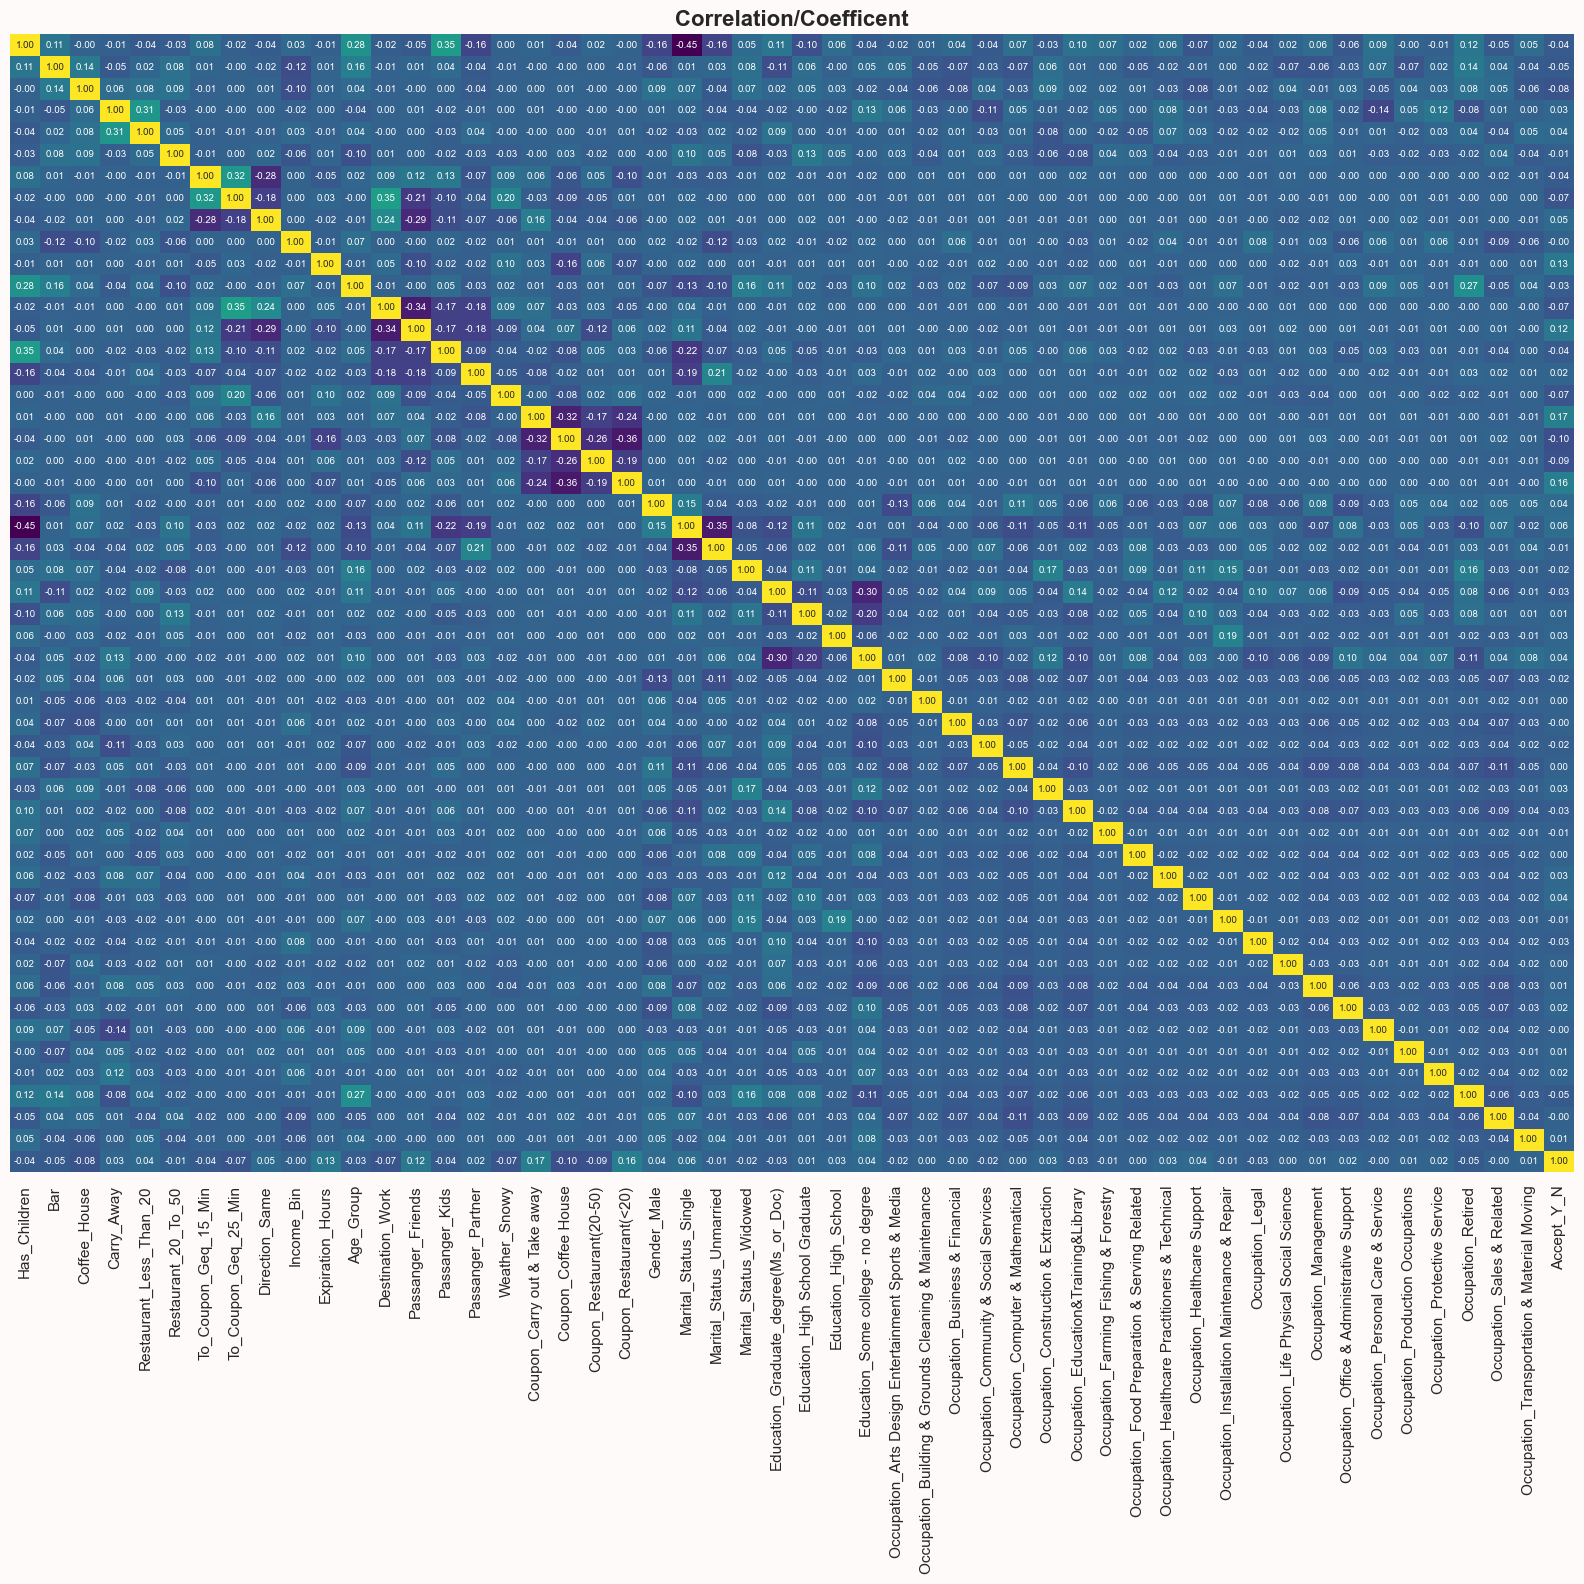

In [172]:
## corr matrix after VIF.

plt.figure(figsize = (16, 16),\
           facecolor = 'snow')

sns.heatmap(v_data.corr(),\
            annot = True,
            cbar = False,\
            cmap = 'viridis',\
            fmt = '.2f',\
            annot_kws = {'size': 7})

plt.yticks([])
plt.title('Correlation/Coefficent', fontweight = 'bold', fontsize = 16)
plt.tight_layout()
plt.show()

## Feature Importance

In [175]:
## mutual info classif.

X = v_data.drop('Accept_Y_N', axis = 1)
y = v_data['Accept_Y_N']

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, index = X.columns).sort_values(ascending = False)
print("Mutual Information Scores")

Mutual Information Scores


In [177]:
mi_scores.head(10)

Passanger_Friends               0.030011
Coupon_Restaurant(20-50)        0.029467
Coupon_Carry out & Take away    0.028576
Coupon_Restaurant(<20)          0.022253
Destination_Work                0.020436
Coupon_Coffee House             0.019180
Coffee_House                    0.016792
Gender_Male                     0.012717
Weather_Snowy                   0.011667
Age_Group                       0.011114
dtype: float64

Feature Scaling

In [180]:
## scaling.

scaling_features = ['Bar', 'Coffee_House', 'Carry_Away', 'Restaurant_Less_Than_20', 'Restaurant_20_To_50',
                    'Age_Group', 'Income_Bin', 'Expiration_Hours']

scaler = StandardScaler()
v_data[scaling_features] = scaler.fit_transform(v_data[scaling_features].values)
v_data.head()

Has_Children       Bar  Coffee_House  Carry_Away  Restaurant_Less_Than_20  \
0             1  1.080623      1.456302   -0.505774                 0.681024   
1             1  1.080623      1.456302   -0.505774                 0.681024   
2             1  1.080623      1.456302   -0.505774                 0.681024   
3             1  1.080623      1.456302   -0.505774                 0.681024   
4             1  1.080623      1.456302   -0.505774                 0.681024   

   Restaurant_20_To_50  To_Coupon_Geq_15_Min  To_Coupon_Geq_25_Min  \
0            -0.071785                     0                     0   
1            -0.071785                     0                     0   
2            -0.071785                     1                     0   
3            -0.071785                     1                     0   
4            -0.071785                     1                     0   

   Direction_Same  Income_Bin  Expiration_Hours  Age_Group  Destination_Work  \
0               0    0.658582          0.903388  -0.940214               0.0   
1               0    0.658582         -1.106944  -0.940214               0.0   
2               0    0.658582         -1.106944  -0.940214               0.0   
3               0    0.658582         -1.106944  -0.940214               0.0   
4               0    0.658582          0.903388  -0.940214               0.0   

   Passanger_Friends  Passanger_Kids  Passanger_Partner  Weather_Snowy  \
0                0.0             0.0                0.0            0.0   
1                1.0             0.0                0.0            0.0   
2                1.0             0.0                0.0            0.0   
3                1.0             0.0                0.0            0.0   
4                1.0             0.0                0.0            0.0   

   Coupon_Carry out & Take away  Coupon_Coffee House  \
0                           0.0                  0.0   
1                           0.0                  1.0   
2                           1.0                  0.0   
3                           0.0                  1.0   
4                           0.0                  1.0   

   Coupon_Restaurant(20-50)  Coupon_Restaurant(<20)  Gender_Male  \
0                       0.0                     1.0          0.0   
1                       0.0                     0.0          0.0   
2                       0.0                     0.0          0.0   
3                       0.0                     0.0          0.0   
4                       0.0                     0.0          0.0   

   Marital_Status_Single  Marital_Status_Unmarried  Marital_Status_Widowed  \
0                    0.0                       1.0                     0.0   
1                    0.0                       1.0                     0.0   
2                    0.0                       1.0                     0.0   
3                    0.0                       1.0                     0.0   
4                    0.0                       1.0                     0.0   

   Education_Graduate_degree(Ms_or_Doc)  Education_High School Graduate  \
0                                   0.0                             0.0   
1                                   0.0                             0.0   
2                                   0.0                             0.0   
3                                   0.0                             0.0   
4                                   0.0                             0.0   

   Education_High_School  Education_Some college - no degree  \
0                    0.0                                 1.0   
1                    0.0                                 1.0   
2                    0.0                                 1.0   
3                    0.0                                 1.0   
4                    0.0                                 1.0   

   Occupation_Arts Design Entertainment Sports & Media  \
0                                                0.0     
1       

## Models

In [183]:
## splitting.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11219, 51), (2805, 51), (11219,), (2805,))

In [185]:
## function for roc_auc.

def plot_roc_auc_with_accuracy(model, X_train, y_train, X_test, y_test, sf):
    y_prob_train = model.predict_proba(X_train[sf])[:, 1]
    y_prob_test = model.predict_proba(X_test[sf])[:, 1]
    fpr_train, tpr_train, _ = roc_curve(y_train, y_prob_train)
    roc_auc_train = auc(fpr_train, tpr_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_prob_test)
    roc_auc_test = auc(fpr_test, tpr_test)

    plt.figure(figsize = (8, 6))
    plt.plot(fpr_train, tpr_train, color = 'blue', label = f'Train ROC curve(AUC = {roc_auc_train:.2f})')
    plt.plot(fpr_test, tpr_test, color = 'green', label = f'Test ROC curve (AUC={roc_auc_test:.2f})')

    plt.plot([0, 1], [0, 1], color = 'gray', linestyle = '--')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Train and Test - {model.__class__.__name__}')
    plt.legend(loc="lower right")
    plt.show()

## Baseline Models(Logistic Regression, KNearestNeighbors)

Logistic Regression

Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Hyperparameters CV_Scores: 0.6589714644014295
Best Hyperparameters Estimator: LogisticRegression(C=1, max_iter=1000, solver='liblinear')
Train Accuracy: 0.6620019609590873
Test Accuracy: 0.6737967914438503
Precision: 0.6803519061583577
Recall: 0.6595593461265103
F1-Score: 0.669794298087333
----------------------------------------------------------------------------------------------------


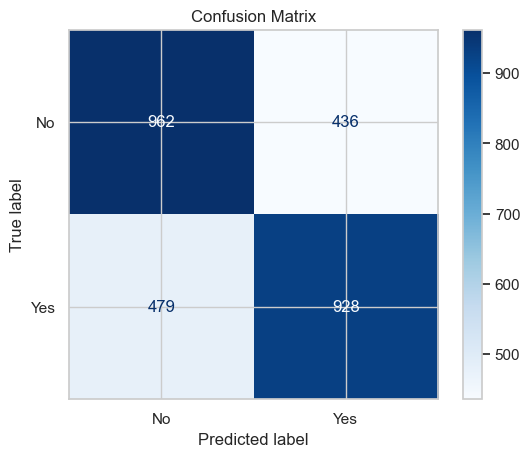

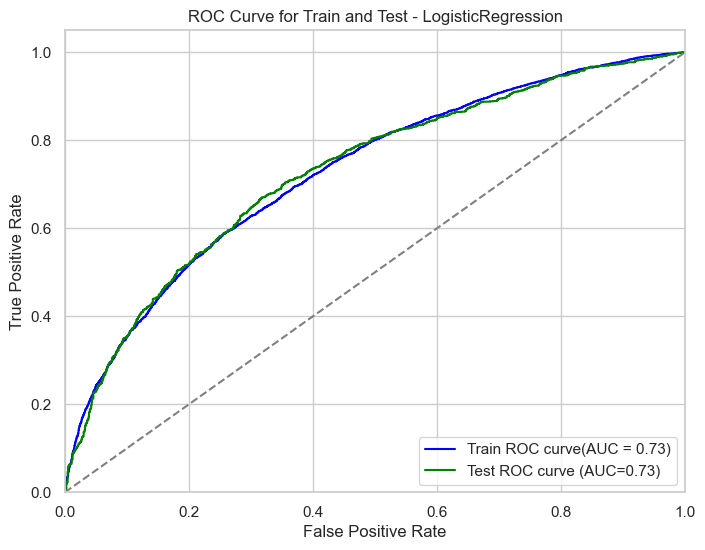

In [188]:
## logistic regression.

# model & RFE
lr_model = LogisticRegression(max_iter = 1000)
selector1 = RFE(estimator = lr_model, n_features_to_select = 50, step = 1)

# model train
selector1.fit(X_train, y_train)

# RFE features selection
selected_features = X_train.columns[selector1.support_]
rfe_feature_importance1 = X_train[selected_features].corrwith(pd.Series(y_train)).to_dict()

# hyperparameter tune using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']}

# Kfold technique for tune
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)

# GridSearchCV with Logistic Regression
grid_search = GridSearchCV(estimator = LogisticRegression(max_iter = 1000),param_grid = param_grid, \
                           scoring = 'accuracy', cv = kf, n_jobs = -1)
grid_search.fit(X_train[selected_features], y_train)

# best estimator
best_model1 = grid_search.best_estimator_

# prediction
pred_train = best_model1.predict(X_train[selected_features])
pred_test = best_model1.predict(X_test[selected_features])

# evaluation metrics
train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)
precision = precision_score(y_test, pred_test)
recall = recall_score(y_test, pred_test)
f1 = f1_score(y_test, pred_test)
conf_matrix = confusion_matrix(y_test, pred_test)

# store accuracy scores in a list
accuracy_scores1 = {
    "Train Accuracy": train_accuracy,
    "Test Accuracy": test_accuracy}

# print results
print('Logistic Regression\n')
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Hyperparameters CV_Scores:", grid_search.best_score_)
print('Best Hyperparameters Estimator:', best_model1)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print('-' * 100)

# Display Confusion Matrix
cm = confusion_matrix(y_test, pred_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels =['No', 'Yes'])
cm_display.plot(cmap = 'Blues')
plt.title('Confusion Matrix')
plt.show()

# roc auc plot
plot_roc_auc_with_accuracy(best_model1, X_train, y_train, X_test, y_test,selected_features)



In [190]:
print("Selected Features with RFE Ranking:", rfe_feature_importance1)

Selected Features with RFE Ranking: {'Has_Children': -0.03692107778225098, 'Bar': -0.04328876811735857, 'Coffee_House': -0.07728784163146302, 'Restaurant_Less_Than_20': 0.03276785958250199, 'Restaurant_20_To_50': -0.010090244952673112, 'To_Coupon_Geq_15_Min': -0.04102634583579755, 'To_Coupon_Geq_25_Min': -0.07166260982379298, 'Direction_Same': 0.03976200632537115, 'Income_Bin': -0.004054581991210686, 'Expiration_Hours': 0.1336059063928635, 'Age_Group': -0.02393217975668114, 'Destination_Work': -0.07153004344552825, 'Passanger_Friends': 0.12230182710444731, 'Passanger_Kids': -0.035833478626878044, 'Passanger_Partner': 0.014210807792534268, 'Weather_Snowy': -0.07498890803863362, 'Coupon_Carry out & Take away': 0.17068471189451648, 'Coupon_Coffee House': -0.10048803332861812, 'Coupon_Restaurant(20-50)': -0.09517960685477322, 'Coupon_Restaurant(<20)': 0.16573749355699716, 'Gender_Male': 0.04293520624167595, 'Marital_Status_Single': 0.06575051796859804, 'Marital_Status_Unmarried': -0.013252

## KNearestNeighbors

KNeighborsClassifier

Best Hyperparameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}
Best Hyperparameters CV_Scores: 0.6947985103132163
Train Accuracy: 0.7487298333184775
Test Accuracy: 0.6912655971479501
Precision: 0.6879777623349548
Recall: 0.7036247334754797
F1-Score: 0.6957132817990161
----------------------------------------------------------------------------------------------------


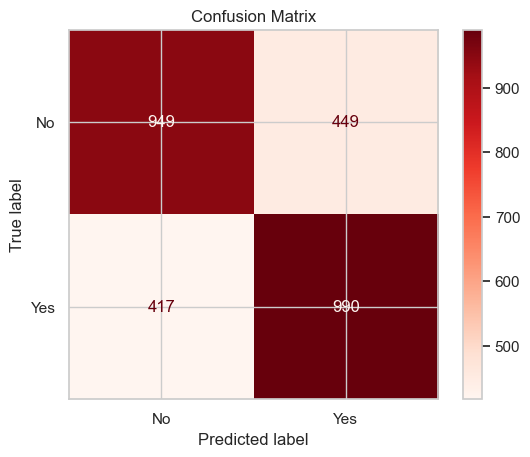

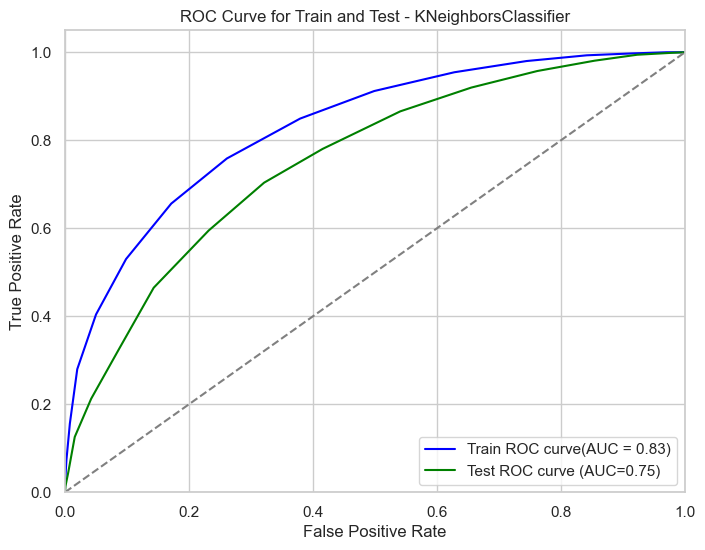

In [194]:
## knn.

# model & mic
selector2 = SelectKBest(score_func = mutual_info_classif, k = 17)
X_train_selected = selector2.fit_transform(X_train, y_train)
X_test_selected = selector2.transform(X_test)

# Store best features into a dictionary
selected_features = X_train.columns[selector2.get_support()]
mic_feature_importance2 = {feature: selector2.scores_[i] for i, feature in enumerate(selected_features)}

# hyperparameter tune using GridSearchCV
param_grid = {
    'n_neighbors': [15, 17, 19, 21],
    'weights': ['uniform'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan']}

# Kfold technique for tune
v = StratifiedKFold(n_splits = 20, shuffle = True, random_state = 42)

# GridSearchCV with KNN
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid =param_grid,\
                           scoring = 'accuracy', cv = v, n_jobs = -1)
grid_search.fit(X_train[selected_features], y_train)

# best estimator
best_model2 = grid_search.best_estimator_

# prediction
pred_train = best_model2.predict(X_train[selected_features])
pred_test = best_model2.predict(X_test[selected_features])

# evaluation metrics
train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)
precision = precision_score(y_test, pred_test)
recall = recall_score(y_test, pred_test)
f1 = f1_score(y_test, pred_test)
conf_matrix = confusion_matrix(y_test, pred_test)

# store accuracy scores in a list
accuracy_scores2 = {
    "Train Accuracy": train_accuracy,
    "Test Accuracy": test_accuracy}

# print results
print('KNeighborsClassifier\n')
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Hyperparameters CV_Scores:", grid_search.best_score_)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print('-' * 100)

# Display Confusion Matrix
cm = confusion_matrix(y_test, pred_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels =['No', 'Yes'])
cm_display.plot(cmap = 'Reds')
plt.title('Confusion Matrix')
plt.show()

# roc auc plot
plot_roc_auc_with_accuracy(best_model2, X_train, y_train, X_test, y_test,selected_features)    

In [196]:
mic_feature_importance2

{'Coffee_House': 0.003956657672979924,
 'Carry_Away': 0.0006479759069935032,
 'Restaurant_Less_Than_20': 0.015492789115717498,
 'Direction_Same': 0.016460253852467854,
 'Income_Bin': 0.014246692499614966,
 'Expiration_Hours': 0.00028887204869154637,
 'Destination_Work': 0.0,
 'Passanger_Friends': 0.0019834230193567226,
 'Passanger_Kids': 0.009251174666825568,
 'Weather_Snowy': 0.011692867871251567,
 'Coupon_Carry out & Take away': 0.010818952479188404,
 'Coupon_Coffee House': 0.0017976526466745302,
 'Coupon_Restaurant(20-50)': 0.025418806271993333,
 'Coupon_Restaurant(<20)': 0.029422278205743835,
 'Education_Some college - no degree': 0.01267815717032783,
 'Occupation_Life Physical Social Science': 0.006533688047505315,
 'Occupation_Management': 0.015599316944627573}


## Tree Based Models(Decision Tree,Random Forest,Adaboost,Gradient Boosting)

Decision Tree

Best Hyperparameters: {'ccp_alpha': 0.01, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Hyperparameters CV_Scores: 0.6795624414399164
Best Hyperparameters Estimator: DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced',
                       criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=5, random_state=42)
Train Accuracy: 0.6796505927444514
Test Accuracy: 0.669162210338681
Precision: 0.650534255185418
Recall: 0.7356076759061834
F1-Score: 0.6904603068712475
----------------------------------------------------------------------------------------------------


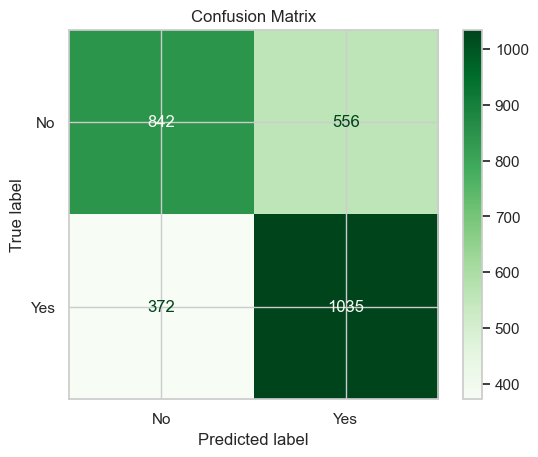

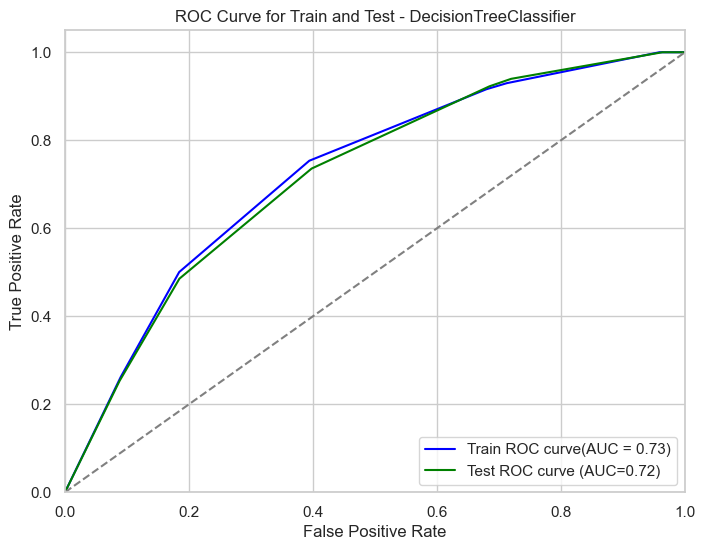

In [199]:
## decision tree.

# model & RFE
dt_model = DecisionTreeClassifier(random_state = 42, class_weight = 'balanced')
selector3 = RFE(estimator = dt_model, n_features_to_select = 40, step = 1)

# model train
selector3.fit(X_train, y_train)

# RFE features selection
selected_features = X_train.columns[selector3.support_]
rfe_feature_importance3 = X_train[selected_features].corrwith(pd.Series(y_train)).to_dict()

# hyperparameter tune using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, None], # Adding depth values to avoid over-shallow trees
    'min_samples_split': [5, 10, 15], # More flexibility for splits
    'min_samples_leaf': [2, 3, 4], # Adjusting leaf size to balance
    'max_features': [None, 'sqrt', 'log2'], # Adding some feature randomness
    'ccp_alpha': [0.01, 0.05, 0.1], # Slight pruning, but not too aggressive
    'class_weight': ['balanced', None] # Adjust class weights if dealing with class imbalance
}

# Kfold technique for tune
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)    

# GridSearchCV with Decision Tree
grid_search = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 42, class_weight = 'balanced'), param_grid = param_grid,\
                           scoring = 'accuracy', cv = kf, n_jobs = -1)
grid_search.fit(X_train[selected_features], y_train)

# best estimator
best_model3 = grid_search.best_estimator_

# prediction
pred_train = best_model3.predict(X_train[selected_features])
pred_test = best_model3.predict(X_test[selected_features])

# evaluation metrics
train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)
precision = precision_score(y_test, pred_test)
recall = recall_score(y_test, pred_test)
f1 = f1_score(y_test, pred_test)
conf_matrix = confusion_matrix(y_test, pred_test)

# store accuracy scores in a list
accuracy_scores3 = {
    "Train Accuracy": train_accuracy,
    "Test Accuracy": test_accuracy}

# print results
print('Decision Tree\n')
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Hyperparameters CV_Scores:", grid_search.best_score_)
print('Best Hyperparameters Estimator:', best_model3)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print('-' * 100)

# Display Confusion Matrix
cm = confusion_matrix(y_test, pred_test)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No', 'Yes'])
cm_display.plot(cmap = 'Greens')
plt.title('Confusion Matrix')
plt.show()

# roc auc plot
plot_roc_auc_with_accuracy(best_model3, X_train, y_train, X_test, y_test, selected_features)

In [201]:
rfe_feature_importance3

{'Has_Children': -0.03692107778225098,
 'Bar': -0.04328876811735857,
 'Coffee_House': -0.07728784163146302,
 'Carry_Away': 0.027681403787156385,
 'Restaurant_Less_Than_20': 0.03276785958250199,
 'Restaurant_20_To_50': -0.010090244952673112,
 'To_Coupon_Geq_15_Min': -0.04102634583579755,
 'To_Coupon_Geq_25_Min': -0.07166260982379298,
 'Direction_Same': 0.03976200632537115,
 'Income_Bin': -0.004054581991210686,
 'Expiration_Hours': 0.1336059063928635,
 'Age_Group': -0.02393217975668114,
 'Destination_Work': -0.07153004344552825,
 'Passanger_Friends': 0.12230182710444731,
 'Passanger_Kids': -0.035833478626878044,
 'Passanger_Partner': 0.014210807792534268,
 'Weather_Snowy': -0.07498890803863362,
 'Coupon_Carry out & Take away': 0.17068471189451648,
 'Coupon_Coffee House': -0.10048803332861812,
 'Coupon_Restaurant(20-50)': -0.09517960685477322,
 'Coupon_Restaurant(<20)': 0.16573749355699716,
 'Gender_Male': 0.04293520624167595,
 'Marital_Status_Single': 0.06575051796859804,
 'Marital_Statu

## Random Forest

Random Forest

Best Hyperparameters: {'warm_start': True, 'random_state': 42, 'n_estimators': 150, 'min_samples_split': 12, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini', 'class_weight': 'balanced_subsample', 'bootstrap': True}
Best Hyperparameters CV_Scores: 0.73651899166933
Best Hyperparameters Estimator: RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       max_features='log2', min_samples_leaf=8,
                       min_samples_split=12, n_estimators=150, random_state=42,
                       warm_start=True)
Train Accuracy: 0.7670024066316071
Test Accuracy: 0.7269162210338681
Precision: 0.7239692522711391
Recall: 0.736318407960199
F1-Score: 0.7300916138125441
----------------------------------------------------------------------------------------------------


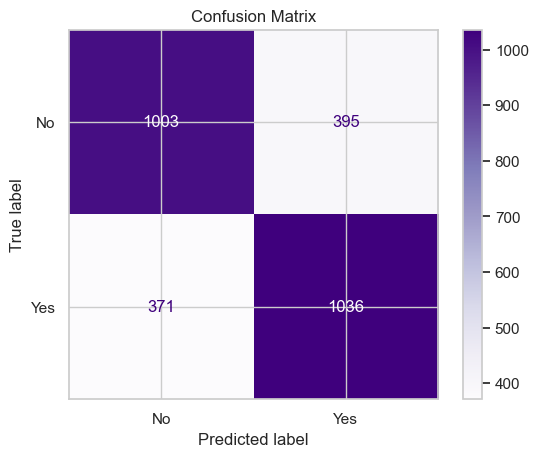

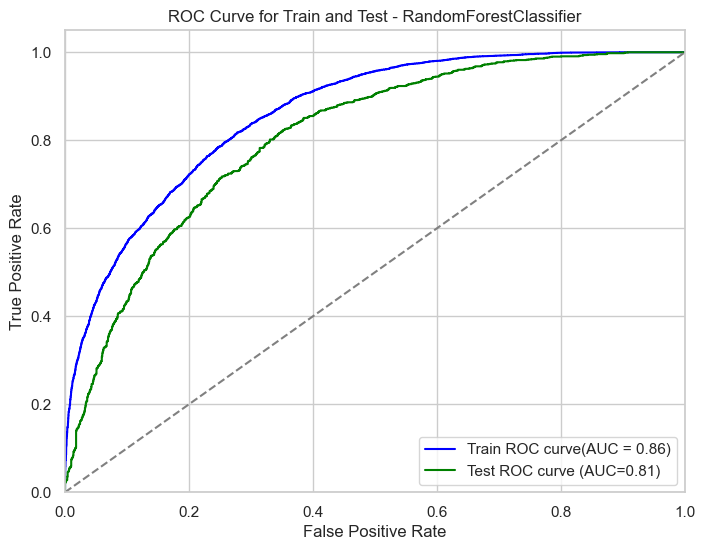

In [204]:
## random forest.

# model & RFE
rf_model = RandomForestClassifier(random_state = 42)
selector4 = RFE(estimator = rf_model, n_features_to_select = 30, step = 10)

# model train
selector4.fit(X_train, y_train)

# RFE features selection
selected_features = X_train.columns[selector4.support_]
rfe_feature_importance4 = X_train[selected_features].corrwith(pd.Series(y_train)).to_dict()

# hyperparameter tune using RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [8, 10],
    'min_samples_split': [12, 15, 20],
    'min_samples_leaf': [8, 10, 12],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True],
    'class_weight': ['balanced', 'balanced_subsample'],
    'warm_start': [True],
    'random_state': [42]
}

# Kfold technique for tune
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)

# GridSearchCV with Random Forest
random_search = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 42), param_distributions = param_dist,\
n_iter = 50, scoring = 'accuracy', cv = kf, n_jobs = -1, random_state = 42)
random_search.fit(X_train[selected_features], y_train)

# best Estimator
best_model4 = random_search.best_estimator_

# prediction
pred_train = best_model4.predict(X_train[selected_features])
pred_test = best_model4.predict(X_test[selected_features])

# evaluation metrics
train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)
precision = precision_score(y_test, pred_test)
recall = recall_score(y_test, pred_test)
f1 = f1_score(y_test, pred_test)
conf_matrix = confusion_matrix(y_test, pred_test)

# store accuracy scores in a list
accuracy_scores4 = {
    "Train Accuracy": train_accuracy,
    "Test Accuracy": test_accuracy
}

# print results
print('Random Forest\n')
print("Best Hyperparameters:", random_search.best_params_)
print("Best Hyperparameters CV_Scores:", random_search.best_score_)
print('Best Hyperparameters Estimator:', best_model4)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print('-' * 100)

# Display Confusion Matrix
cm = confusion_matrix(y_test, pred_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No', 'Yes'])
cm_display.plot(cmap = 'Purples')
plt.title('Confusion Matrix')
plt.show()

# roc auc plot
plot_roc_auc_with_accuracy(best_model4, X_train, y_train, X_test, y_test, selected_features)

## Gradient Boosting

Gradient Boosting

Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_depth': 4, 'learning_rate': 0.1, 'criterion': 'friedman_mse'}
Best Hyperparameters CV_Scores: 0.7476601593539934
Best Hyperparameters Estimator: GradientBoostingClassifier(max_depth=4, max_features='log2', min_samples_leaf=7,
                           min_samples_split=10, n_estimators=200,
                           random_state=42, subsample=0.8)
Train Accuracy: 0.7752027809965237
Test Accuracy: 0.7440285204991087
Precision: 0.7326130992572586
Recall: 0.7711442786069652
F1-Score: 0.7513850415512465
----------------------------------------------------------------------------------------------------


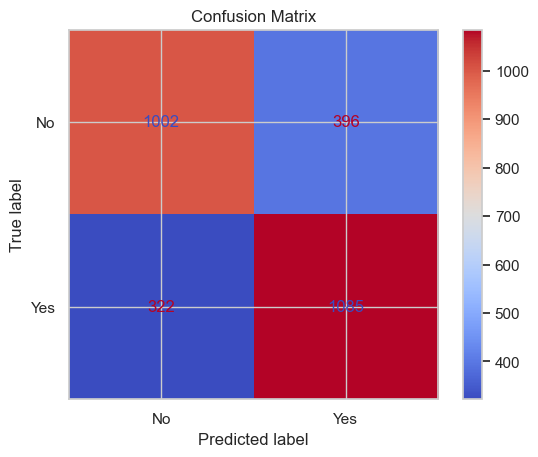

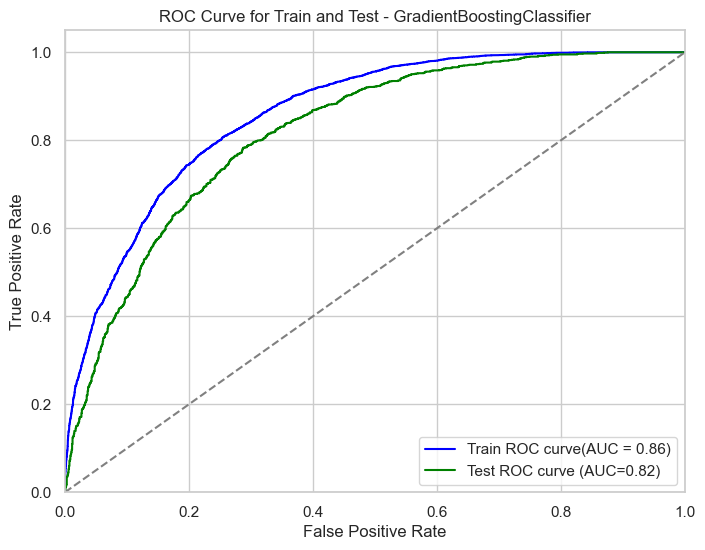

In [207]:
## gradient boosting.

# model & RFE
gb_model = GradientBoostingClassifier(random_state = 42)
selector5 = RFE(estimator = gb_model, n_features_to_select = 45, step = 10)

# model train
selector5.fit(X_train, y_train)

# RFE features selection
selected_features = X_train.columns[selector5.support_]
rfe_feature_importance5 = X_train[selected_features].corrwith(pd.Series(y_train)).to_dict()

# hyperparameter tune using RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200],
     'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [5, 6, 7],
    'subsample': [0.7, 0.8],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['friedman_mse']
}   

# Kfold technique for tune
kf = KFold(n_splits = 15, shuffle = True, random_state = 42)

# RandomizedSearchCV with Gradient Boosting
random_search = RandomizedSearchCV(estimator = GradientBoostingClassifier(random_state = 42), param_distributions = param_dist,\
                                   n_iter = 50, scoring = 'accuracy', cv = kf, n_jobs = -1, random_state = 42)
random_search.fit(X_train[selected_features], y_train)

# best Estimator
best_model5 = random_search.best_estimator_

# prediction
pred_train = best_model5.predict(X_train[selected_features])
pred_test = best_model5.predict(X_test[selected_features])

# evaluation metrics
train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)
precision = precision_score(y_test, pred_test)
recall = recall_score(y_test, pred_test)
f1 = f1_score(y_test, pred_test)
conf_matrix = confusion_matrix(y_test, pred_test)

# store accuracy scores in a list
accuracy_scores5 = {
    "Train Accuracy": train_accuracy,
    "Test Accuracy": test_accuracy
}

# print results
print('Gradient Boosting\n')
print("Best Hyperparameters:", random_search.best_params_)
print("Best Hyperparameters CV_Scores:", random_search.best_score_)
print('Best Hyperparameters Estimator:', best_model5)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print('-' * 100)

# Display Confusion Matrix
cm = confusion_matrix(y_test, pred_test)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No', 'Yes'])
cm_display.plot(cmap = 'coolwarm')
plt.title('Confusion Matrix')
plt.show()

# roc auc plot
plot_roc_auc_with_accuracy(best_model5, X_train, y_train, X_test, y_test, selected_features)

## Adaboost

Adaptive Boost

Best Hyperparameters: {'random_state': 42, 'n_estimators': 300, 'learning_rate': 0.2, 'algorithm': 'SAMME.R'}
Best Hyperparameters CV_Scores: 0.6990818612742314
Best Hyperparameters Estimator: AdaBoostClassifier(learning_rate=0.2, n_estimators=300, random_state=42)
Train Accuracy: 0.7017559497281398
Test Accuracy: 0.7026737967914438
Precision: 0.7089715536105032
Recall: 0.6908315565031983
F1-Score: 0.6997840172786177
----------------------------------------------------------------------------------------------------


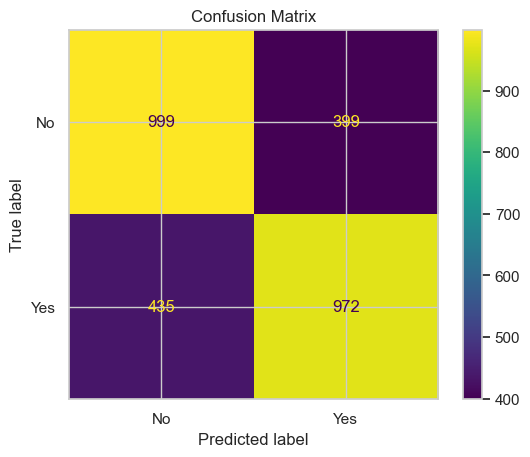

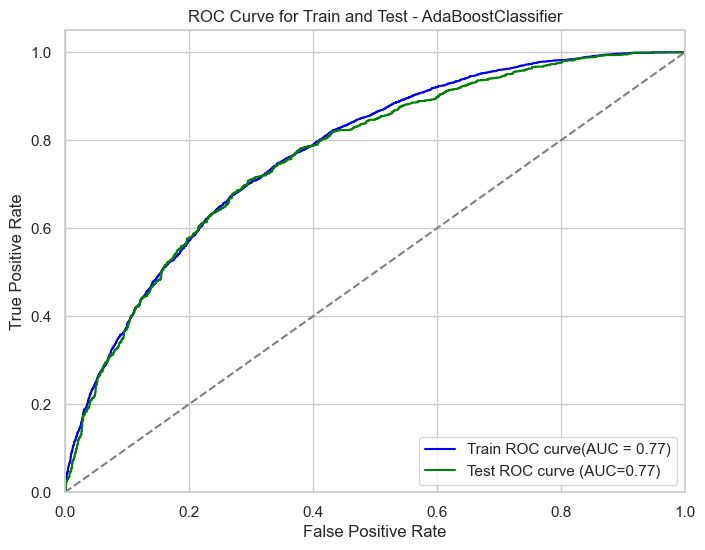

In [210]:
## adaboost.

# model & RFE
ab_model = AdaBoostClassifier(random_state = 42)
selector6 = RFE(estimator = ab_model, n_features_to_select = 45, step = 10)

# model train
selector6.fit(X_train, y_train)

# RFE features selection
selected_features = X_train.columns[selector6.support_]
rfe_feature_importance6 = X_train[selected_features].corrwith(pd.Series(y_train)).to_dict()

# hyperparameter tune using RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'algorithm': ['SAMME', 'SAMME.R'],
    'random_state': [42],
}

# Kfold technique for tune
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)

# RandomizedSearchCV with Adaptive Boost
random_search = RandomizedSearchCV(estimator = AdaBoostClassifier(random_state = 42), param_distributions = param_dist,\
                                   n_iter = 50, scoring = 'accuracy', cv = kf, n_jobs = -1, random_state = 42)
random_search.fit(X_train[selected_features], y_train)

# best Estimator
best_model6 = random_search.best_estimator_

# prediction
pred_train = best_model6.predict(X_train[selected_features])
pred_test = best_model6.predict(X_test[selected_features])

# evaluation metrics
train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)
precision = precision_score(y_test, pred_test)
recall = recall_score(y_test, pred_test)
f1 = f1_score(y_test, pred_test)
conf_matrix = confusion_matrix(y_test, pred_test)

# store accuracy scores in a list
accuracy_scores6 = {
    "Train Accuracy": train_accuracy,
    "Test Accuracy": test_accuracy
}

# print results
print('Adaptive Boost\n')
print("Best Hyperparameters:", random_search.best_params_)
print("Best Hyperparameters CV_Scores:", random_search.best_score_)
print('Best Hyperparameters Estimator:', best_model6)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print('-' * 100)

# Display Confusion Matrix
cm = confusion_matrix(y_test, pred_test)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No', 'Yes'])
cm_display.plot(cmap = 'viridis')
plt.title('Confusion Matrix')
plt.show()

# roc auc plot
plot_roc_auc_with_accuracy(best_model6, X_train, y_train, X_test, y_test, selected_features)

## Support Vector Machine.

Support Vector Machine

Best Hyperparameters: {'random_state': 42, 'kernel': 'poly', 'gamma': 'auto', 'C': 10}
Best Hyperparameters CV_Scores: 0.712096326650034
Best Hyperparameters Estimator: SVC(C=10, gamma='auto', kernel='poly', random_state=42)
Train Accuracy: 0.7669132721276406
Test Accuracy: 0.7062388591800357
Precision: 0.721336370539104
Recall: 0.6751954513148543
F1-Score: 0.697503671071953
----------------------------------------------------------------------------------------------------


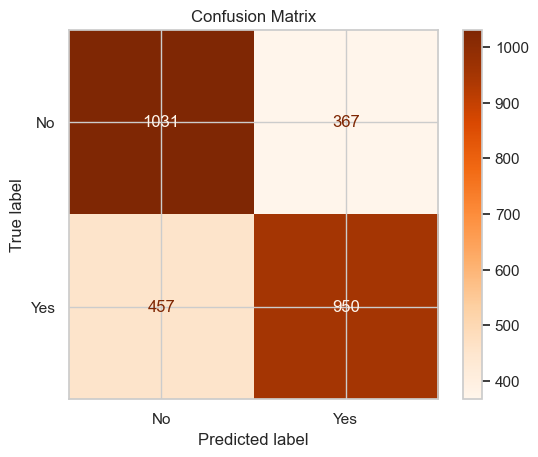

In [213]:
## Support Vector Machine.

# model & RFE
svc_model = SVC(kernel = 'linear', random_state = 42)
selector7 = RFE(estimator = svc_model, n_features_to_select = 45, step = 10)

# model train
selector7.fit(X_train, y_train)

# RFE features selection
selected_features = X_train.columns[selector7.support_]
rfe_feature_importance7 = X_train[selected_features].corrwith(pd.Series(y_train)).to_dict()

# hyperparameter tune using RandomizedSearchCV
param_dist = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto'],
    'random_state': [42]
}

# Kfold technique for tune
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)

# RandomizedSearchCV with SVC
random_search = RandomizedSearchCV(estimator = SVC(random_state = 42), param_distributions = param_dist,\
                                   n_iter = 10, scoring = 'accuracy', cv = kf, n_jobs = -1, random_state = 42)
random_search.fit(X_train[selected_features], y_train)

# best Estimator
best_model7 = random_search.best_estimator_

# prediction
pred_train = best_model7.predict(X_train[selected_features])
pred_test = best_model7.predict(X_test[selected_features])

# evaluation metrics
train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)
precision = precision_score(y_test, pred_test)
recall = recall_score(y_test, pred_test)
f1 = f1_score(y_test, pred_test)
conf_matrix = confusion_matrix(y_test, pred_test)

# store accuracy scores in a list
accuracy_scores7 = {
    "Train Accuracy": train_accuracy,
    "Test Accuracy": test_accuracy
}

# print results
print('Support Vector Machine\n')
print("Best Hyperparameters:", random_search.best_params_)
print("Best Hyperparameters CV_Scores:", random_search.best_score_)
print('Best Hyperparameters Estimator:', best_model7)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print('-' * 100)

# Display Confusion Matrix
cm = confusion_matrix(y_test, pred_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No', 'Yes'])
cm_display.plot(cmap = 'Oranges')
plt.title('Confusion Matrix')
plt.show()

## XG Boost

In [395]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)
selected_features = selected_features.astype(str)  # Ensure selected feature names are strings


In [397]:
print([col for col in selected_features if "[" in col or "]" in col or "<" in col])


['Coupon_Restaurant(<20)']


In [401]:
X_train = X_train.rename(columns=lambda x: x.replace("[", "_").replace("]", "_").replace("<", "_"))
X_test = X_test.rename(columns=lambda x: x.replace("[", "_").replace("]", "_").replace("<", "_"))
selected_features = [col.replace("[", "_").replace("]", "_").replace("<", "_") for col in selected_features]


In [403]:
print(selected_features)


['Has_Children', 'Bar', 'Coffee_House', 'Carry_Away', 'Restaurant_Less_Than_20', 'Restaurant_20_To_50', 'To_Coupon_Geq_15_Min', 'To_Coupon_Geq_25_Min', 'Direction_Same', 'Income_Bin', 'Expiration_Hours', 'Age_Group', 'Destination_Work', 'Passanger_Friends', 'Passanger_Kids', 'Passanger_Partner', 'Weather_Snowy', 'Coupon_Carry out & Take away', 'Coupon_Coffee House', 'Coupon_Restaurant(20-50)', 'Coupon_Restaurant(_20)', 'Gender_Male', 'Marital_Status_Single', 'Marital_Status_Unmarried', 'Education_Graduate_degree(Ms_or_Doc)', 'Education_High School Graduate', 'Education_High_School', 'Education_Some college - no degree', 'Occupation_Arts Design Entertainment Sports & Media', 'Occupation_Business & Financial', 'Occupation_Community & Social Services', 'Occupation_Computer & Mathematical', 'Occupation_Construction & Extraction', 'Occupation_Education&Training&Library', 'Occupation_Food Preparation & Serving Related', 'Occupation_Healthcare Practitioners & Technical', 'Occupation_Healthcar

In [405]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in X_train[selected_features].select_dtypes(include=['object']).columns:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])


XGBoost

Best Hyperparameters: {'subsample': 0.75, 'reg_lambda': 1.5, 'reg_alpha': 1, 'n_estimators': 300, 'min_child_weight': 20, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0.1, 'eval_metric': 'logloss', 'colsample_bytree': 0.8, 'booster': 'gbtree'}
Train Accuracy: 0.7742223014528924
Test Accuracy: 0.738680926916221
Precision: 0.7305061559507524
Recall: 0.7590618336886994
----------------------------------------------------------------------------------------------------


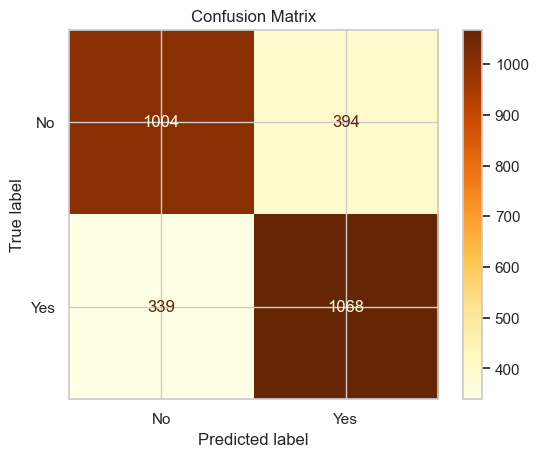

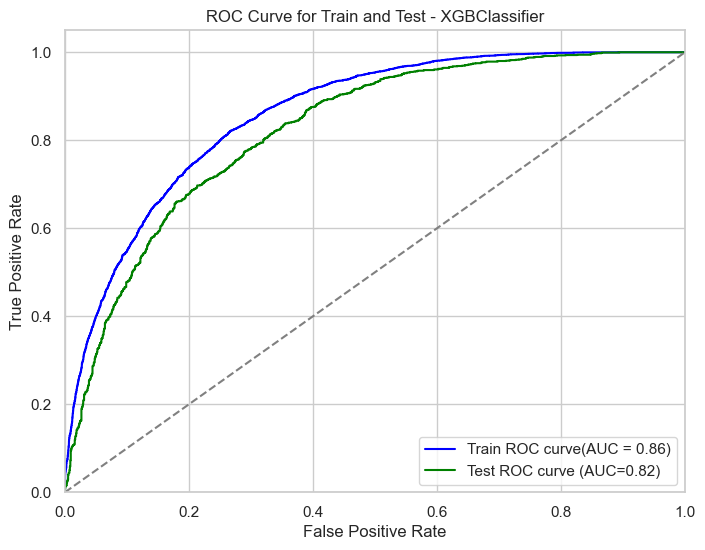

In [428]:
## xgboost.

# model & RFE
xgb_model = XGBClassifier(random_state = 42)
selector8 = RFE(estimator = xgb_model, n_features_to_select = 45, step = 10)

# model train
selector8.fit(X_train, y_train)

# RFE features selection
selected_features = X_train.columns[selector8.support_]
rfe_feature_importance8 = X_train[selected_features].corrwith(pd.Series(y_train)).to_dict()

# hyperparameter tune using RandomizedSearchCV
param_dist = {
    'n_estimators': [200, 300],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 4],
    'subsample': [0.7, 0.75],
    'colsample_bytree': [0.7, 0.8],
    'gamma': [0.1, 0.2],
    'reg_alpha': [0.5, 1],
    'reg_lambda': [1.5, 2],
    'min_child_weight': [20, 30],
    'eval_metric': ['logloss', 'auc'],
    'booster': ['gbtree'],
}

# Kfold technique for tune
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)

# RandomizedSearchCV with XGBoost
random_search = RandomizedSearchCV(estimator = XGBClassifier(random_state = 42), param_distributions = param_dist,\
                                   n_iter = 40, scoring = 'accuracy', cv = kf,n_jobs = -1, random_state = 42)

# Fit RandomizedSearchCV 
random_search. fit(X_train[selected_features], y_train)

# Best Estimator from RandomizedSearchCV
best_model8 = random_search.best_estimator_

# Predictions (incomplete)
pred_train = best_model8.predict(X_train[selected_features])
pred_test = best_model8.predict(X_test[selected_features])

# Evaluation metrics (incomplete)
train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)
precision = precision_score(y_test, pred_test, pos_label=1)
recall = recall_score(y_test, pred_test, pos_label=1)
f1 = f1_score(y_test, pred_test, pos_label=1)


print('XGBoost\n')
print("Best Hyperparameters:", random_search.best_params_)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print('-' * 100)

# Display Confusion Matrix (incomplete)
cm = confusion_matrix(y_test, pred_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
cm_display.plot(cmap='YlOrBr')
plt.title('Confusion Matrix')
plt.show()

# ROC AUC Plot (incomplete)
plot_roc_auc_with_accuracy(best_model8, X_train, y_train, X_test, y_test, selected_features)

In [422]:
rfe_feature_importance8

{'Has_Children': -0.03692107778225098,
 'Bar': -0.04328876811735857,
 'Coffee_House': -0.07728784163146302,
 'Carry_Away': 0.027681403787156385,
 'Restaurant_Less_Than_20': 0.03276785958250199,
 'Restaurant_20_To_50': -0.010090244952673112,
 'To_Coupon_Geq_15_Min': -0.04102634583579755,
 'To_Coupon_Geq_25_Min': -0.07166260982379298,
 'Direction_Same': 0.03976200632537115,
 'Income_Bin': -0.004054581991210686,
 'Expiration_Hours': 0.1336059063928635,
 'Age_Group': -0.02393217975668114,
 'Destination_Work': -0.07153004344552825,
 'Passanger_Friends': 0.12230182710444731,
 'Passanger_Kids': -0.035833478626878044,
 'Passanger_Partner': 0.014210807792534268,
 'Weather_Snowy': -0.07498890803863362,
 'Coupon_Carry out & Take away': 0.17068471189451648,
 'Coupon_Coffee House': -0.10048803332861812,
 'Coupon_Restaurant(20-50)': -0.09517960685477322,
 'Coupon_Restaurant(_20)': 0.16573749355699716,
 'Gender_Male': 0.04293520624167595,
 'Marital_Status_Single': 0.06575051796859804,
 'Marital_Statu

## Feature Importance From Each Model

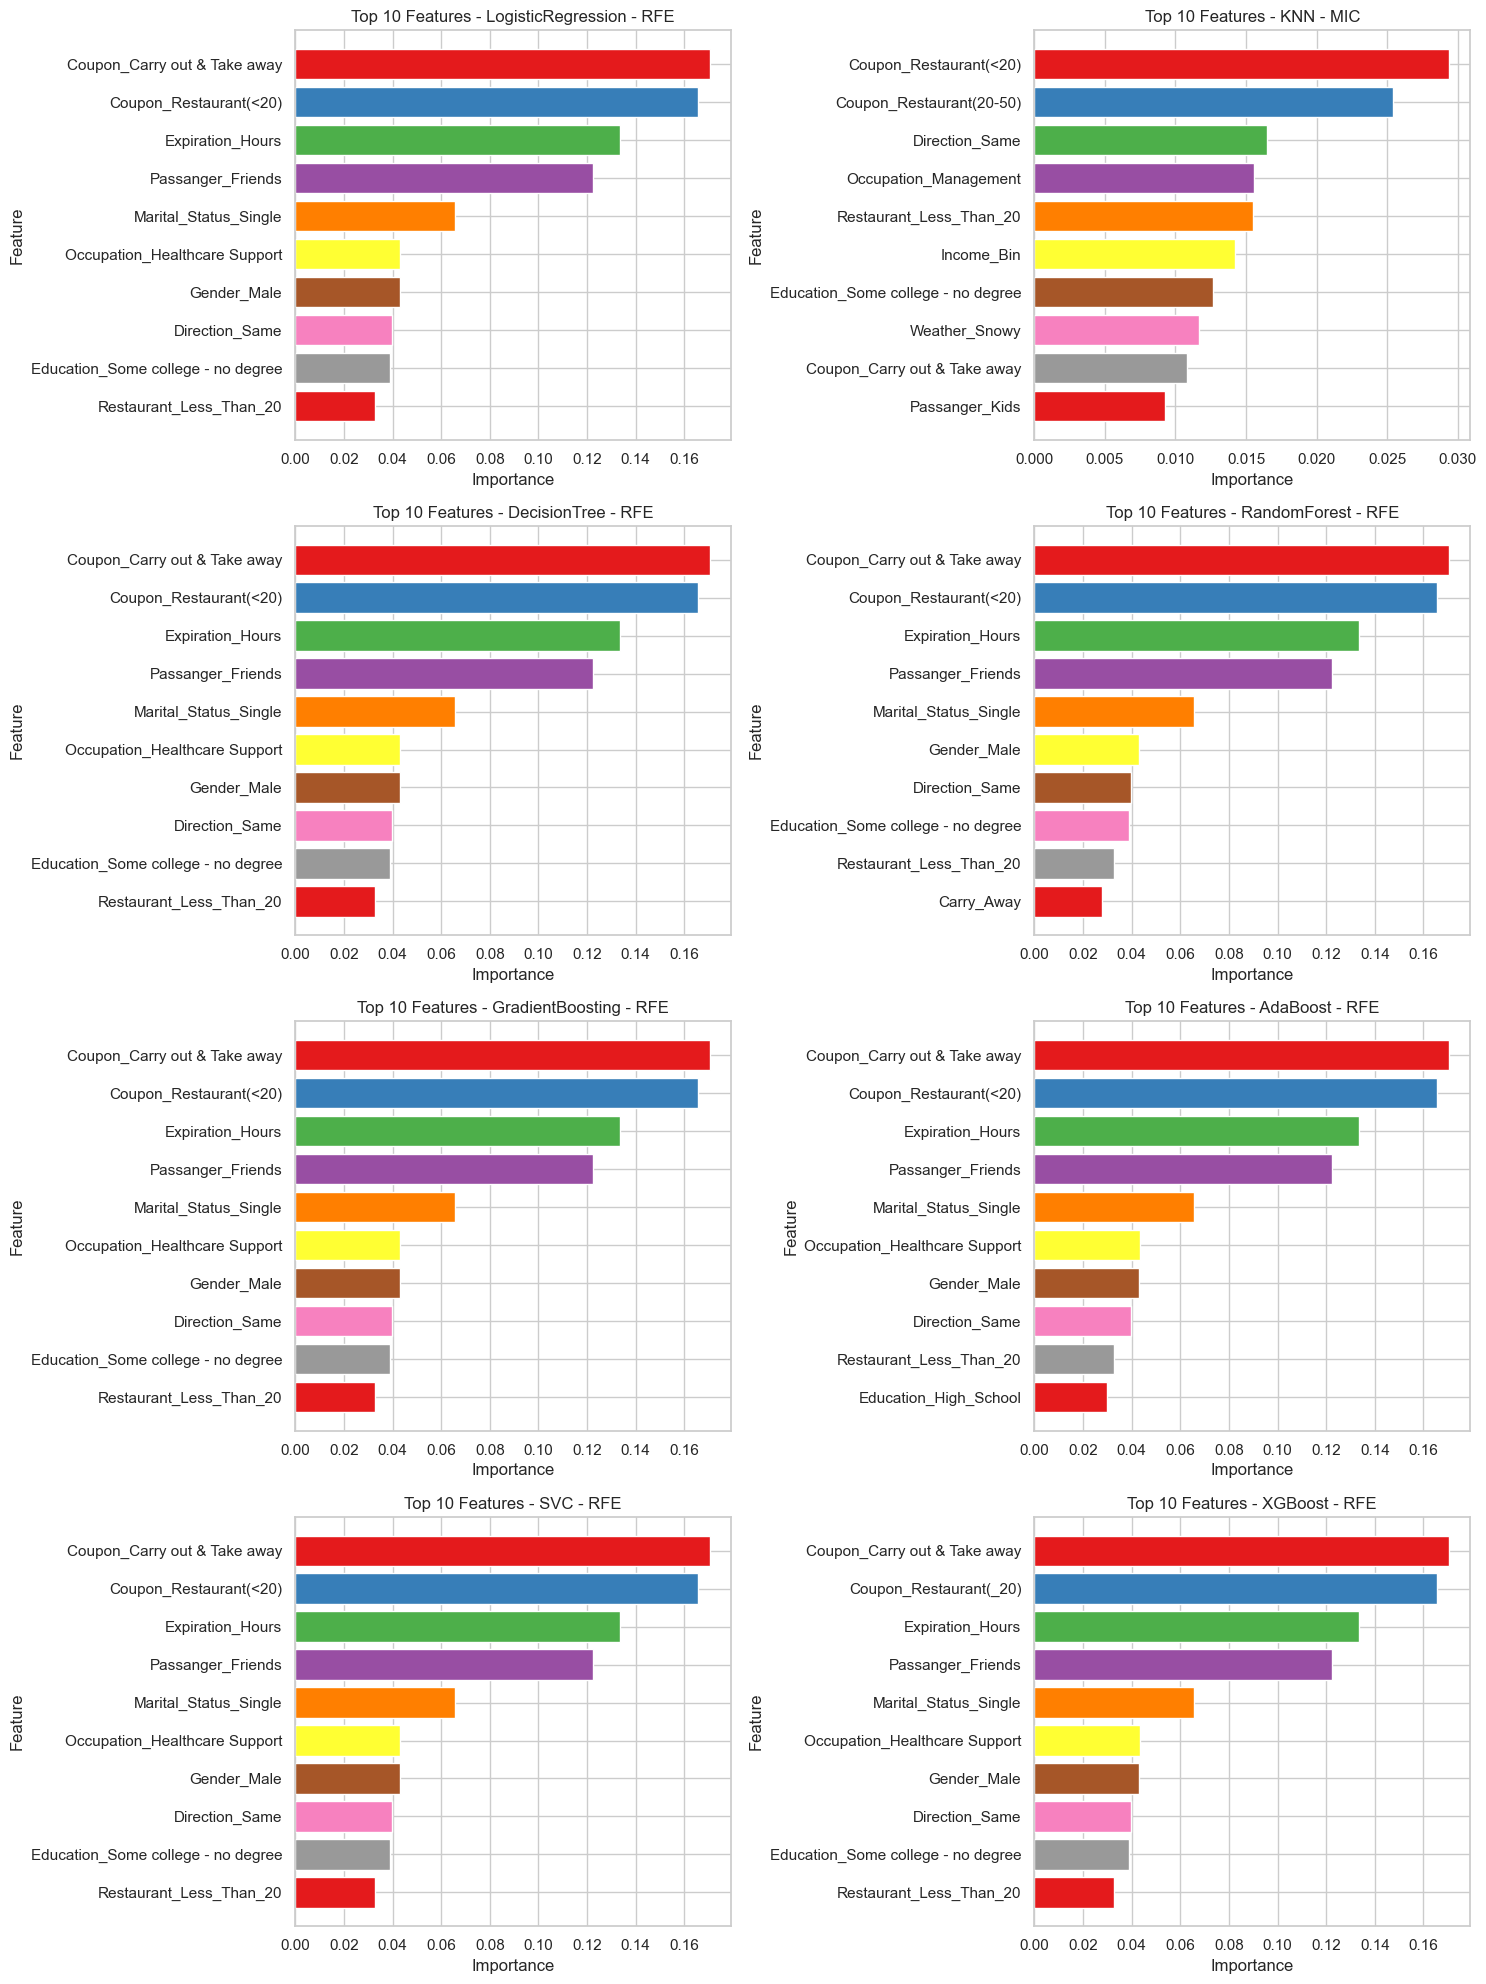

In [413]:
## plot.
file1 = [rfe_feature_importance1, mic_feature_importance2, rfe_feature_importance3, rfe_feature_importance4,\
rfe_feature_importance5, rfe_feature_importance6, rfe_feature_importance7, rfe_feature_importance8]

file2 = ['LogisticRegression - RFE', 'KNN - MIC', 'DecisionTree - RFE', 'RandomForest - RFE',\
         'GradientBoosting - RFE', 'AdaBoost - RFE', 'SVC - RFE', 'XGBoost - RFE']

fig, axes = plt.subplots(4, 2, figsize = (15, 20))
axes = axes.ravel()
palette = sns.color_palette('Set1', 10)

for idx, features_imp in enumerate(file1):
    sorted_features = sorted(features_imp.items(), key = lambda x: x[1], reverse = True)
    top_10_features = sorted_features[:10]

    features, importances = zip(*top_10_features)

    axes[idx].barh(features, importances, color = palette)
    axes[idx].set_xlabel('Importance')
    axes[idx].set_ylabel('Feature')
    axes[idx].set_title(f'Top 10 Features - {file2[idx]}')
    axes[idx].invert_yaxis()

plt.tight_layout()
plt.show()

## Train/Test Accuracy Plot

In [424]:
accuracy_scores8 = {
    "Train Accuracy": train_accuracy,
    "Test Accuracy": test_accuracy
}


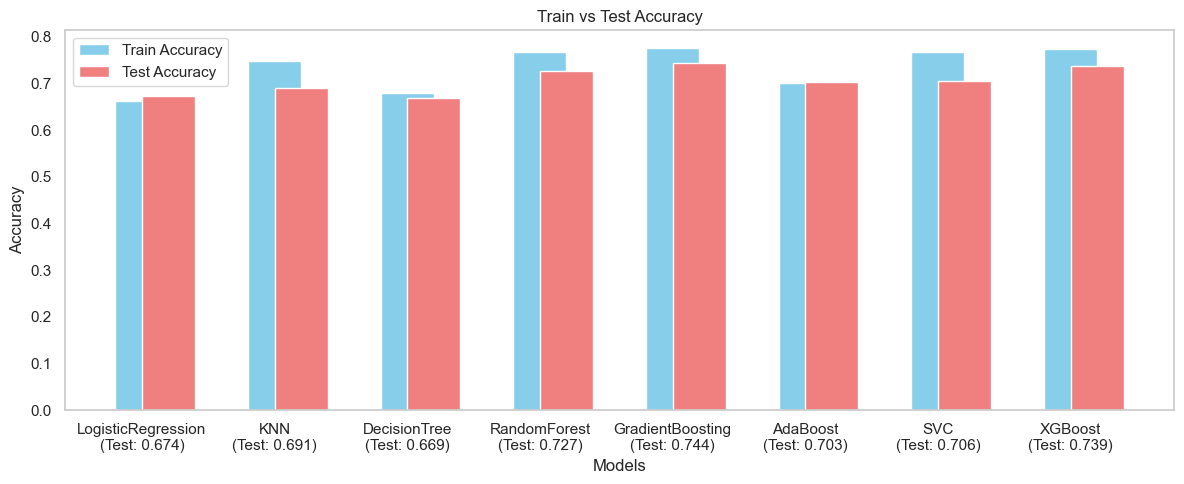

In [426]:
## barplot

file3 = [accuracy_scores1, accuracy_scores2, accuracy_scores3, accuracy_scores4, accuracy_scores5, accuracy_scores6, accuracy_scores7, accuracy_scores8]
file4 = ['LogisticRegression', 'KNN', 'DecisionTree', 'RandomForest', 'GradientBoosting', 'AdaBoost', 'SVC', 'XGBoost']

train_accuracies = [model['Train Accuracy'] for model in file3]
test_accuracies = [model['Test Accuracy'] for model in file3]

plt.figure(figsize = (12, 5))

plt.bar(range(len(file3)), train_accuracies, width = 0.4, label = 'Train Accuracy', align = 'center', color = 'skyblue')
plt.bar(range(len(file3)), test_accuracies, width = 0.4, label = 'Test Accuracy', align = 'edge', color = 'lightcoral')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
xticks_labels = [f'{model_name}\n(Test: {test:.3f})' for model_name, test in zip(file4, test_accuracies)]
plt.xticks(range(len(file3)), xticks_labels)
plt.legend()
plt.grid(visible = False)
plt.tight_layout()
plt.show()



## Load the models to (Deployment)

In [417]:
## pickle.
models = [best_model1, best_model2, best_model3, best_model4, best_model5, best_model6, best_model7, best_model8]
model_names = ['LogisticRegression', 'KNN', 'DecisionTree', 'RandomForest', 'GradientBoosting', 'AdaBoost', 'SVC', 'XGBoost']

# Loop through each model and save them as .pkl files
for model, name in zip(models, model_names):
    with open(f'{name}_model.pkl', 'wb') as model_file:
        pickle.dump(model, model_file)
    print(f"{name} model saved successfully.")  

LogisticRegression model saved successfully.
KNN model saved successfully.
DecisionTree model saved successfully.
RandomForest model saved successfully.
GradientBoosting model saved successfully.
AdaBoost model saved successfully.
SVC model saved successfully.
XGBoost model saved successfully.


##### Note: Best model is XGBoost with accuracy of [0.745], Runnerup is GradientBoost with accuracy of [0.738], 3rd most model is RandomForest with accuracy


##### of [0.724] & Baseline models gives accuracy of [Lr - 0.675, Knn - 0.671].

##                                                —————————————— The End —————————
—————